# Imports

In [185]:
import pandas as pd
import json
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Data Loading

In [186]:
with open('prov_JSON/prov-worker-0912231.json', 'r') as json_file:
    prov_data = json.load(json_file)

In [187]:
prov_data[0]

{'annotations': {'gid': '1000',
  'euid': '1000',
  'children pid namespace': '-1',
  'pid': '4728',
  'seen time': '1702119793.080',
  'source': 'syscall',
  'net namespace': '-1',
  'ipc namespace': '-1',
  'ppid': '4186',
  'pid namespace': '-1',
  'cwd': '/data',
  'uid': '1000',
  'egid': '1000',
  'exe': '/usr/local/bin/redis-server',
  'mount namespace': '-1',
  'name': 'redis-server',
  'user namespace': '-1'},
 'id': 'bf568478eb1e54952760f72d50144a4e',
 'type': 'Process'}

In [188]:
# Separate edges and vertices data

edges_data = []
vertices_process = []
vertices_artifacts = []

for item in prov_data:
    if 'type' in item:
        # Separate vertices to dataframes according to their type - 'Process' or 'Artifact'
        if item['type'] == 'Process':
            vertices_process.append(item)
        elif item['type'] == 'Artifact':
            vertices_artifacts.append(item)
        else:
            edges_data.append(item)

In [189]:
# Get all unique types of edges
edge_types = set()
for item in edges_data:
    edge_types.add(item['type'])
print(edge_types)

# No AGENT vertices

{'WasGeneratedBy', 'Used', 'WasTriggeredBy'}


In [190]:
# Print lengths of data lists
print(f"number of edges: {len(edges_data)}")
print(f"number of vertices: {len(vertices_process) + len(vertices_artifacts)}")
print(f"number of processes: {len(vertices_process)}")
print(f"number of artifacts: {len(vertices_artifacts)}")

number of edges: 39087
number of vertices: 3405
number of processes: 643
number of artifacts: 2762


## Data Loading - Vertices

In [191]:
# Load process vertices data into a pandas dataframe
process_df = pd.DataFrame(vertices_process)
process_df.head()

annotations  \
0  {'gid': '1000', 'euid': '1000', 'children pid ...   
1  {'gid': '1000', 'euid': '1000', 'children pid ...   
2  {'gid': '116', 'euid': '112', 'children pid na...   
3  {'gid': '1000', 'euid': '1000', 'children pid ...   
4  {'gid': '1000', 'euid': '1000', 'children pid ...   

                                 id     type  
0  bf568478eb1e54952760f72d50144a4e  Process  
1  9db76e1f086a76a9e8dd1548f05d2fa8  Process  
2  46dea032f4342cafd765deaee9067628  Process  
3  413b8704b3209061ce63aaa13a274964  Process  
4  0ef366a12c22d68dcc35e410ab69719e  Process

In [192]:
# Load artifact vertices data into a pandas dataframe
artifact_df=pd.DataFrame(vertices_artifacts)
artifact_df.head()

annotations  \
0  {'path': '/proc/4728/stat', 'subtype': 'file',...   
1  {'path': '/proc/30850/mountinfo', 'subtype': '...   
2  {'path': '/run/mount/utab', 'subtype': 'file',...   
3  {'path': '/', 'subtype': 'directory', 'permiss...   
4  {'path': '/sys', 'subtype': 'directory', 'perm...   

                                 id      type  
0  81338e410c018f63993f6e06c077c34e  Artifact  
1  521d86a2612ed5d128b9cae6350c4ea6  Artifact  
2  7b65297e7853d3c2609c9699289a1337  Artifact  
3  2940488a0e3c1b3238183afaeb05a262  Artifact  
4  88cd5a7ee47fdc85dea662449c90e238  Artifact

In [193]:
# Convert the dictionary in annotations column into columns in process_df
annotations_process_df = pd.DataFrame(process_df['annotations'].tolist())

# Combine annotations_process_df with process_df instead of the 'annotations' column in process_df
process_df = pd.concat([process_df, annotations_process_df], axis=1).drop('annotations', axis=1)
process_df

id     type   gid  euid  \
0    bf568478eb1e54952760f72d50144a4e  Process  1000  1000   
1    9db76e1f086a76a9e8dd1548f05d2fa8  Process  1000  1000   
2    46dea032f4342cafd765deaee9067628  Process   116   112   
3    413b8704b3209061ce63aaa13a274964  Process  1000  1000   
4    0ef366a12c22d68dcc35e410ab69719e  Process  1000  1000   
..                                ...      ...   ...   ...   
638  09f4ab5b14d6f9f2af1ad6fcda6c7623  Process  1000  1000   
639  c31db7322a8b70395140d140667700d6  Process  1000  1000   
640  5ebe4fceb72860e7470d44db5eaa655a  Process  1000  1000   
641  29569b52a8ab611e1dfc28ccb0ecb21a  Process  1000  1000   
642  7f23d8b3b74310b68c740fc957ee8312  Process   106   102   

    children pid namespace    pid       seen time   source net namespace  \
0                       -1   4728  1702119793.080  syscall            -1   
1                       -1  30850  1702119793.148  syscall            -1   
2                       -1   1142  1702119793.508  syscall            -1   
3                       -1   1711  1702119793.592  syscall            -1   
4                       -1   1711             NaN  syscall            -1   
..                     ...    ...             ...      ...           ...   
638             4026532690   3666             NaN  syscall    4026532382   
639             4026532690   3667             NaN  syscall    4026532382   
640             4026532690   3668             NaN  syscall    4026532382   
641             4026532690   3669             NaN  syscall    4026532382   
642                     -1   1067  1702119826.452  syscall            -1   

    ipc namespace  ...            cwd   uid  egid  \
0              -1  ...          /data  1000  1000   
1              -1  ...              /  1000  1000   
2              -1  ...            NaN   112   116   
3              -1  ...            NaN  1000  1000   
4              -1  ...  /email_server  1000  1000   
..            ...  ...            ...   ...   ...   
638    4026532669  ...   /usr/src/app  1000  1000   
639    4026532669  ...   /usr/src/app  1000  1000   
640    4026532669  ...   /usr/src/app  1000  1000   
641    4026532669  ...   /usr/src/app  1000  1000   
642            -1  ...              /   102   106   

                             exe mount namespace             name  \
0    /usr/local/bin/redis-server              -1     redis-server   
1           /lib/systemd/systemd              -1          systemd   
2                            NaN              -1          chronyd   
3                              /              -1    runc:[2:INIT]   
4         /bin/grpc_health_probe              -1  grpc_health_pro   
..                           ...             ...              ...   
638       /bin/grpc_health_probe      4026532689  grpc_health_pro   
639       /bin/grpc_health_probe      4026532689  grpc_health_pro   
640       /bin/grpc_health_probe      4026532689  grpc_health_pro   
641       /bin/grpc_health_probe      4026532689  grpc_health_pro   
642           /usr/sbin/rsyslogd              -1    rs:main Q:Reg   

    user namespace      start time                         command line ns pid  
0               -1             NaN                                  NaN    NaN  
1               -1             NaN                                  NaN    NaN  
2               -1             NaN                                  NaN    NaN  
3               -1             NaN                                  NaN    NaN  
4               -1  1702119793.592   /bin/grpc_health_probe -addr=:8080    NaN  
..             ...             ...                                  ...    ...  
638     4026531837  1702119825.720  /bin/grpc_health_probe -addr=:50051   1376  
639     4026531837  1702119825.724  /bin/grpc_health_probe -addr=:50051   1377  
640     4026531837  1702119825.728  /bin/grpc_health_probe -addr=:50051   1378  
641     4026531837  1702119825.728  /bin/grpc_health_probe -addr=:50051   1379  
642             -1  

In [194]:
# Convert the dictionary in annotations column into columns in artifact_df
annotations_artifact_df = pd.DataFrame(artifact_df['annotations'].tolist())

# Combine annotations_artifact_df with artifact_df instead of the 'annotations' column in artifact_df
artifact_df = pd.concat([artifact_df, annotations_artifact_df], axis=1).drop('annotations', axis=1)
artifact_df

id      type                   path  \
0     81338e410c018f63993f6e06c077c34e  Artifact        /proc/4728/stat   
1     521d86a2612ed5d128b9cae6350c4ea6  Artifact  /proc/30850/mountinfo   
2     7b65297e7853d3c2609c9699289a1337  Artifact        /run/mount/utab   
3     2940488a0e3c1b3238183afaeb05a262  Artifact                      /   
4     88cd5a7ee47fdc85dea662449c90e238  Artifact                   /sys   
...                                ...       ...                    ...   
2757  3590db22532593fa2136e450a85658f3  Artifact                    NaN   
2758  c2d9426e2cdd5a172638ac72381b1048  Artifact                    NaN   
2759  58fec781896a518ed3adf046ed9e8548  Artifact                    NaN   
2760  cd9b49dcd834bd4771719cbffbf5370e  Artifact                    NaN   
2761  0ef5f6d816adb32da9ff11dcecab0e52  Artifact          /var/run/utmp   

             subtype permissions epoch   source version  \
0               file        0444     0  syscall       0   
1               file        0444     0  syscall       0   
2               file        0644     0  syscall       0   
3          directory        0755     0  syscall       0   
4          directory        0555     0  syscall       0   
...              ...         ...   ...      ...     ...   
2757          memory         NaN   NaN  syscall       0   
2758          memory         NaN   NaN  syscall       0   
2759  network socket         NaN     0  syscall       0   
2760  network socket         NaN     0  syscall       0   
2761            file        0664     0  syscall       0   

                                local address remote port protocol  \
0                                         NaN         NaN      NaN   
1                                         NaN         NaN      NaN   
2                                         NaN         NaN      NaN   
3                                         NaN         NaN      NaN   
4                                         NaN         NaN      NaN   
...                                       ...         ...      ...   
2757                                      NaN         NaN      NaN   
2758                                      NaN         NaN      NaN   
2759                                127.0.0.1       50051      tcp   
2760  0000:0000:0000:0000:0000:0000:0000:0000       37622      tcp   
2761                                      NaN         NaN      NaN   

                               remote address local port net namespace  \
0                                         NaN        NaN           NaN   
1                                         NaN        NaN           NaN   
2                                         NaN        NaN           NaN   
3                                         NaN        NaN           NaN   
4                                         NaN        NaN           NaN   
...                                       ...        ...           ...   
2757                                      NaN        NaN           NaN   
2758                                      NaN        NaN           NaN   
2759                                  0.0.0.0      37622    4026532382   
2760  0000:0000:0000:0000:0000:FFFF:7F00:0001      50051            -1   
2761                                      NaN        NaN           NaN   

     memory address   size  tgid read fd write fd  
0               NaN    NaN   NaN     NaN      NaN  
1               NaN    NaN   NaN     NaN      NaN  
2               NaN    NaN   NaN     NaN      NaN  
3               NaN    NaN   NaN     NaN      NaN  
4               NaN    NaN   NaN     NaN      NaN  
...             ...    ...   ...     ...      ...  
2757   7fe433ed9000  40000  3657     NaN      NaN  
2758   7fe433e99000  40000  3657     NaN      NaN  
2759            NaN    NaN   NaN     NaN      NaN  
2760            NaN    NaN   NaN     NaN      NaN  
2761            NaN    NaN   NaN     NaN      NaN  

[2762 rows x 19 columns]

In [195]:
# Count the number of rows for each subtype value in artifact_df
artifact_df['subtype'].value_counts()

subtype
memory            2293
network socket     203
directory          146
file                97
link                22
unnamed pipe         1
Name: count, dtype: int64

## Data Loading - Kubernetes Services

In [196]:
# Load kubectl_svc.json file
with open('kubectl_svc.json', 'r') as json_file:
    svc_data = json.load(json_file)

# Create a dataframe consisting of services names and ports from kubectl_svc.json file
svc_df = pd.DataFrame(columns=['service_name', 'port'])
for item in svc_data['items']:
    svc_name = item['metadata']['name']
    for p in item['spec']['ports']:
        # port_name = item['spec']['ports'][0]['name']
        port_num = item['spec']['ports'][0]['port']
        # Add all of the above variables to the dataframe using pd.concat
        # svc_df = pd.concat([svc_df, pd.DataFrame([[svc_name, port_name, port_num]], columns=['service_name', 'port_name', 'port'])])
        svc_df = pd.concat([svc_df, pd.DataFrame([[svc_name, port_num]], columns=['service_name', 'port'])], ignore_index=True)

svc_df

service_name   port
0               adservice   9555
1             cartservice   7070
2         checkoutservice   5050
3         currencyservice   7000
4            emailservice   5000
5                frontend     80
6       frontend-external     80
7              kubernetes    443
8          paymentservice  50051
9   productcatalogservice   3550
10  recommendationservice   8080
11             redis-cart   6379
12        shippingservice  50051

# Data Filtering

In [197]:
# Extract all values from 'svc_df' columns and convert them to a set for efficient lookup
svc_values = set()
for column in svc_df.columns:
    svc_values.update(svc_df[column].astype(str))

# Remove the substring "service" from values in svc_values and add it as another item instead
svc_values = set([value.replace('service', '') for value in svc_values])
svc_values.add('service')

svc_values

{'3550',
 '443',
 '5000',
 '50051',
 '5050',
 '6379',
 '7000',
 '7070',
 '80',
 '8080',
 '9555',
 'ad',
 'cart',
 'checkout',
 'currency',
 'email',
 'frontend',
 'frontend-external',
 'kubernetes',
 'payment',
 'productcatalog',
 'recommendation',
 'redis-cart',
 'service',
 'shipping'}

In [198]:
# Helper function for boolean mask to filter rows according to svc_values
def contains_substring(value, svc_values):
    for svc_value in svc_values:
        if svc_value in value:
            return True
    return False

## Filtering Vertices

In [199]:
# Create a boolean mask to filter 'process_df' rows, only by the following columns: 'exe', 'name', 'cwd', 'command line'
proc_filter_cols = ['exe', 'name', 'cwd', 'command line']
svc_proc_mask = process_df[proc_filter_cols].apply(lambda row: any(contains_substring(value, svc_values) for value in row.astype(str)), axis=1)

# Use the mask to create a new DataFrame with matching rows
app_process_df = process_df[svc_proc_mask].copy()  # Make a copy to avoid the warning

app_process_df

id     type   gid  euid  \
4    0ef366a12c22d68dcc35e410ab69719e  Process  1000  1000   
5    3f921fd1ce1cc790417d2071cc0a3c34  Process  1000  1000   
6    e6103611b0969dad371a1d6e665772e7  Process  1000  1000   
7    ff8a80868c60e4a5a1503a31124cd340  Process  1000  1000   
9    b6acb3e5c8618efc89e85cd9e2ee9823  Process  1000  1000   
..                                ...      ...   ...   ...   
637  124d026d2a64c4b2c67947a310bb3e68  Process  1000  1000   
638  09f4ab5b14d6f9f2af1ad6fcda6c7623  Process  1000  1000   
639  c31db7322a8b70395140d140667700d6  Process  1000  1000   
640  5ebe4fceb72860e7470d44db5eaa655a  Process  1000  1000   
641  29569b52a8ab611e1dfc28ccb0ecb21a  Process  1000  1000   

    children pid namespace   pid seen time   source net namespace  \
4                       -1  1711       NaN  syscall            -1   
5               4026532688  1723       NaN  syscall    4026532231   
6               4026532688  1724       NaN  syscall    4026532231   
7               4026532688  1725       NaN  syscall    4026532231   
9               4026532688  1726       NaN  syscall    4026532231   
..                     ...   ...       ...      ...           ...   
637             4026532690  3665       NaN  syscall    4026532382   
638             4026532690  3666       NaN  syscall    4026532382   
639             4026532690  3667       NaN  syscall    4026532382   
640             4026532690  3668       NaN  syscall    4026532382   
641             4026532690  3669       NaN  syscall    4026532382   

    ipc namespace  ...            cwd   uid  egid                     exe  \
4              -1  ...  /email_server  1000  1000  /bin/grpc_health_probe   
5      4026532657  ...  /email_server  1000  1000  /bin/grpc_health_probe   
6      4026532657  ...  /email_server  1000  1000  /bin/grpc_health_probe   
7      4026532657  ...  /email_server  1000  1000  /bin/grpc_health_probe   
9      4026532657  ...  /email_server  1000  1000  /bin/grpc_health_probe   
..            ...  ...            ...   ...   ...                     ...   
637    4026532669  ...   /usr/src/app  1000  1000  /bin/grpc_health_probe   
638    4026532669  ...   /usr/src/app  1000  1000  /bin/grpc_health_probe   
639    4026532669  ...   /usr/src/app  1000  1000  /bin/grpc_health_probe   
640    4026532669  ...   /usr/src/app  1000  1000  /bin/grpc_health_probe   
641    4026532669  ...   /usr/src/app  1000  1000  /bin/grpc_health_probe   

    mount namespace             name user namespace      start time  \
4                -1  grpc_health_pro             -1  1702119793.592   
5        4026532687  grpc_health_pro     4026531837  1702119793.596   
6        4026532687  grpc_health_pro     4026531837  1702119793.596   
7        4026532687  grpc_health_pro     4026531837  1702119793.596   
9        4026532687  grpc_health_pro     4026531837  1702119793.604   
..              ...              ...            ...             ...   
637      4026532689  grpc_health_pro     4026531837  1702119825.720   
638      4026532689  grpc_health_pro     4026531837  1702119825.720   
639      4026532689  grpc_health_pro     4026531837  1702119825.724   
640      4026532689  grpc_health_pro     4026531837  1702119825.728   
641      4026532689  grpc_health_pro     4026531837  1702119825.728   

                            command line ns pid  
4     /bin/grpc_health_probe -addr=:8080    NaN  
5     /bin/grpc_health_probe -addr=:8080   2489  
6     /bin/grpc_health_probe -addr=:8080   2490  
7     /bin/grpc_health_probe -addr=:8080   2491  
9     /bin/grpc_health_probe -addr=:8080   2492  
..                                   ...    ...  
637  /bin/grpc_health_probe -addr=:50051   1375  
638  /bin/grpc_health_probe -addr=:50051   1376  
639  /bin/grpc_health_probe -addr=:50051   1377  
640  /bin/grpc_health_probe -addr=:50051   1378  
641  /bin/grpc_health_probe -addr=:50051   1379  

[501 rows x 22 columns]

In [200]:
# Create a function to get the service_name for a given row
def get_service_name(row, svc_values, svc_df):
    for value in row.astype(str):
        if any(svc_value in value for svc_value in svc_values):
            # Get the service_name from svc_df based on the matched value
            for index, row in svc_df.iterrows():
                if any(svc_value in value for svc_value in row.astype(str)):
                    return row['service_name']
    return ".No app/k8s service found"

In [201]:
# Apply the function to add a new 'svc' column to app_process_df
app_process_df['svc'] = app_process_df[proc_filter_cols].apply(lambda row: get_service_name(row, svc_values, svc_df), axis=1)

# Now, 'app_process_df' contains the 'svc' column with the associated service_name
app_process_df

id     type   gid  euid  \
4    0ef366a12c22d68dcc35e410ab69719e  Process  1000  1000   
5    3f921fd1ce1cc790417d2071cc0a3c34  Process  1000  1000   
6    e6103611b0969dad371a1d6e665772e7  Process  1000  1000   
7    ff8a80868c60e4a5a1503a31124cd340  Process  1000  1000   
9    b6acb3e5c8618efc89e85cd9e2ee9823  Process  1000  1000   
..                                ...      ...   ...   ...   
637  124d026d2a64c4b2c67947a310bb3e68  Process  1000  1000   
638  09f4ab5b14d6f9f2af1ad6fcda6c7623  Process  1000  1000   
639  c31db7322a8b70395140d140667700d6  Process  1000  1000   
640  5ebe4fceb72860e7470d44db5eaa655a  Process  1000  1000   
641  29569b52a8ab611e1dfc28ccb0ecb21a  Process  1000  1000   

    children pid namespace   pid seen time   source net namespace  \
4                       -1  1711       NaN  syscall            -1   
5               4026532688  1723       NaN  syscall    4026532231   
6               4026532688  1724       NaN  syscall    4026532231   
7               4026532688  1725       NaN  syscall    4026532231   
9               4026532688  1726       NaN  syscall    4026532231   
..                     ...   ...       ...      ...           ...   
637             4026532690  3665       NaN  syscall    4026532382   
638             4026532690  3666       NaN  syscall    4026532382   
639             4026532690  3667       NaN  syscall    4026532382   
640             4026532690  3668       NaN  syscall    4026532382   
641             4026532690  3669       NaN  syscall    4026532382   

    ipc namespace  ...   uid  egid                     exe mount namespace  \
4              -1  ...  1000  1000  /bin/grpc_health_probe              -1   
5      4026532657  ...  1000  1000  /bin/grpc_health_probe      4026532687   
6      4026532657  ...  1000  1000  /bin/grpc_health_probe      4026532687   
7      4026532657  ...  1000  1000  /bin/grpc_health_probe      4026532687   
9      4026532657  ...  1000  1000  /bin/grpc_health_probe      4026532687   
..            ...  ...   ...   ...                     ...             ...   
637    4026532669  ...  1000  1000  /bin/grpc_health_probe      4026532689   
638    4026532669  ...  1000  1000  /bin/grpc_health_probe      4026532689   
639    4026532669  ...  1000  1000  /bin/grpc_health_probe      4026532689   
640    4026532669  ...  1000  1000  /bin/grpc_health_probe      4026532689   
641    4026532669  ...  1000  1000  /bin/grpc_health_probe      4026532689   

                name user namespace      start time  \
4    grpc_health_pro             -1  1702119793.592   
5    grpc_health_pro     4026531837  1702119793.596   
6    grpc_health_pro     4026531837  1702119793.596   
7    grpc_health_pro     4026531837  1702119793.596   
9    grpc_health_pro     4026531837  1702119793.604   
..               ...            ...             ...   
637  grpc_health_pro     4026531837  1702119825.720   
638  grpc_health_pro     4026531837  1702119825.720   
639  grpc_health_pro     4026531837  1702119825.724   
640  grpc_health_pro     4026531837  1702119825.728   
641  grpc_health_pro     4026531837  1702119825.728   

                            command line ns pid             svc  
4     /bin/grpc_health_probe -addr=:8080    NaN        frontend  
5     /bin/grpc_health_probe -addr=:8080   2489        frontend  
6     /bin/grpc_health_probe -addr=:8080   2490        frontend  
7     /bin/grpc_health_probe -addr=:8080   2491        frontend  
9     /bin/grpc_health_probe -addr=:8080   2492        frontend  
..                                   ...    ...             ...  
637  /bin/grpc_health_probe -addr=:50051   1375  paymentservice  
638  /bin/grpc_health_probe -addr=:50051   1376  paymentservice  
639  /bin/grpc_health_probe -addr=:50051   1377  paymentservice  
640  /bin/grpc_health_probe -addr=:50051   1378  paymentservice  
641  /bin/grpc_health_probe -addr=:50051   1379  paymentservice  

[501 rows x 23 columns]

In [202]:
# Count unique values in svc column in app_process_df
app_process_df['svc'].value_counts()

svc
paymentservice               105
recommendationservice         90
frontend                      88
cartservice                   54
currencyservice               52
checkoutservice               41
productcatalogservice         37
adservice                     26
.No app/k8s service found      5
shippingservice                3
Name: count, dtype: int64

In [203]:
# Create new dataframe without the rows with the value '.No app/k8s service found' in the 'svc' column in app_process_df
app_process_df = app_process_df[app_process_df['svc'] != '.No app/k8s service found']
app_process_df

id     type   gid  euid  \
4    0ef366a12c22d68dcc35e410ab69719e  Process  1000  1000   
5    3f921fd1ce1cc790417d2071cc0a3c34  Process  1000  1000   
6    e6103611b0969dad371a1d6e665772e7  Process  1000  1000   
7    ff8a80868c60e4a5a1503a31124cd340  Process  1000  1000   
9    b6acb3e5c8618efc89e85cd9e2ee9823  Process  1000  1000   
..                                ...      ...   ...   ...   
637  124d026d2a64c4b2c67947a310bb3e68  Process  1000  1000   
638  09f4ab5b14d6f9f2af1ad6fcda6c7623  Process  1000  1000   
639  c31db7322a8b70395140d140667700d6  Process  1000  1000   
640  5ebe4fceb72860e7470d44db5eaa655a  Process  1000  1000   
641  29569b52a8ab611e1dfc28ccb0ecb21a  Process  1000  1000   

    children pid namespace   pid seen time   source net namespace  \
4                       -1  1711       NaN  syscall            -1   
5               4026532688  1723       NaN  syscall    4026532231   
6               4026532688  1724       NaN  syscall    4026532231   
7               4026532688  1725       NaN  syscall    4026532231   
9               4026532688  1726       NaN  syscall    4026532231   
..                     ...   ...       ...      ...           ...   
637             4026532690  3665       NaN  syscall    4026532382   
638             4026532690  3666       NaN  syscall    4026532382   
639             4026532690  3667       NaN  syscall    4026532382   
640             4026532690  3668       NaN  syscall    4026532382   
641             4026532690  3669       NaN  syscall    4026532382   

    ipc namespace  ...   uid  egid                     exe mount namespace  \
4              -1  ...  1000  1000  /bin/grpc_health_probe              -1   
5      4026532657  ...  1000  1000  /bin/grpc_health_probe      4026532687   
6      4026532657  ...  1000  1000  /bin/grpc_health_probe      4026532687   
7      4026532657  ...  1000  1000  /bin/grpc_health_probe      4026532687   
9      4026532657  ...  1000  1000  /bin/grpc_health_probe      4026532687   
..            ...  ...   ...   ...                     ...             ...   
637    4026532669  ...  1000  1000  /bin/grpc_health_probe      4026532689   
638    4026532669  ...  1000  1000  /bin/grpc_health_probe      4026532689   
639    4026532669  ...  1000  1000  /bin/grpc_health_probe      4026532689   
640    4026532669  ...  1000  1000  /bin/grpc_health_probe      4026532689   
641    4026532669  ...  1000  1000  /bin/grpc_health_probe      4026532689   

                name user namespace      start time  \
4    grpc_health_pro             -1  1702119793.592   
5    grpc_health_pro     4026531837  1702119793.596   
6    grpc_health_pro     4026531837  1702119793.596   
7    grpc_health_pro     4026531837  1702119793.596   
9    grpc_health_pro     4026531837  1702119793.604   
..               ...            ...             ...   
637  grpc_health_pro     4026531837  1702119825.720   
638  grpc_health_pro     4026531837  1702119825.720   
639  grpc_health_pro     4026531837  1702119825.724   
640  grpc_health_pro     4026531837  1702119825.728   
641  grpc_health_pro     4026531837  1702119825.728   

                            command line ns pid             svc  
4     /bin/grpc_health_probe -addr=:8080    NaN        frontend  
5     /bin/grpc_health_probe -addr=:8080   2489        frontend  
6     /bin/grpc_health_probe -addr=:8080   2490        frontend  
7     /bin/grpc_health_probe -addr=:8080   2491        frontend  
9     /bin/grpc_health_probe -addr=:8080   2492        frontend  
..                                   ...    ...             ...  
637  /bin/grpc_health_probe -addr=:50051   1375  paymentservice  
638  /bin/grpc_health_probe -addr=:50051   1376  paymentservice  
639  /bin/grpc_health_probe -addr=:50051   1377  paymentservice  
640  /bin/grpc_health_probe -addr=:50051   1378  paymentservice  
641  /bin/grpc_health_probe -addr=:50051   1379  paymentservice  

[496 rows x 23 columns]

In [204]:
# Create a boolean mask to filter 'artifact_df' rows
art_filter_cols = ['path', 'local address', 'remote port', 'protocol', 'remote address', 'local port']
svc_art_mask = artifact_df[art_filter_cols].apply(lambda row: any(contains_substring(value, svc_values) for value in row.astype(str)), axis=1)

# Use the mask to create a new DataFrame with matching rows
app_artifact_df = artifact_df[svc_art_mask].copy()  # Make a copy to avoid the warning

app_artifact_df

id      type path         subtype  \
48    a41db92088a31a823a23ed48145dd661  Artifact  NaN  network socket   
49    a2f50c6b069415c603efdac935d00de4  Artifact  NaN  network socket   
96    be892937315bea0644510e695d37ac30  Artifact  NaN  network socket   
97    5a7a49b0a1c2096d4e6e896d35f9194d  Artifact  NaN  network socket   
98    80a3b6046c1aa2dda29b76dc32d1e4fa  Artifact  NaN  network socket   
...                                ...       ...  ...             ...   
2708  3998eceda38b8f5dae8cc3bae8bf54e0  Artifact  NaN  network socket   
2732  21b987534f7bbaa103be947ab2d950ad  Artifact  NaN  network socket   
2733  5238236d70966fe2bda3eb36fbe49df9  Artifact  NaN  network socket   
2759  58fec781896a518ed3adf046ed9e8548  Artifact  NaN  network socket   
2760  cd9b49dcd834bd4771719cbffbf5370e  Artifact  NaN  network socket   

     permissions epoch   source version  \
48           NaN     0  syscall       0   
49           NaN     0  syscall       0   
96           NaN     0  syscall       0   
97           NaN     0  syscall       0   
98           NaN     0  syscall       0   
...          ...   ...      ...     ...   
2708         NaN     0  syscall       0   
2732         NaN     0  syscall       0   
2733         NaN     0  syscall       0   
2759         NaN     0  syscall       0   
2760         NaN     0  syscall       0   

                                local address remote port protocol  \
48                                    0.0.0.0       39612      tcp   
49                                    0.0.0.0       39614      tcp   
96                                  127.0.0.1        8080      tcp   
97    0000:0000:0000:0000:0000:0000:0000:0000       46636      tcp   
98                                  127.0.0.1        8080      tcp   
...                                       ...         ...      ...   
2708                                127.0.0.1        7000      tcp   
2732  0000:0000:0000:0000:0000:0000:0000:0000       43390      tcp   
2733                                127.0.0.1        3550      tcp   
2759                                127.0.0.1       50051      tcp   
2760  0000:0000:0000:0000:0000:0000:0000:0000       37622      tcp   

                               remote address local port net namespace  \
48                              172.31.30.227       6379            -1   
49                              172.31.30.227       6379            -1   
96                                    0.0.0.0      46636    4026532231   
97    0000:0000:0000:0000:0000:FFFF:7F00:0001       8080            -1   
98                                    0.0.0.0      46642    4026532231   
...                                       ...        ...           ...   
2708                                  0.0.0.0      35042    4026532583   
2732  0000:0000:0000:0000:0000:FFFF:7F00:0001       3550            -1   
2733                                  0.0.0.0      43390            -1   
2759                                  0.0.0.0      37622    4026532382   
2760  0000:0000:0000:0000:0000:FFFF:7F00:0001      50051            -1   

     memory address size tgid read fd write fd  
48              NaN  NaN  NaN     NaN      NaN  
49              NaN  NaN  NaN     NaN      NaN  
96              NaN  NaN  NaN     NaN      NaN  
97              NaN  NaN  NaN     NaN      NaN  
98              NaN  NaN  NaN     NaN      NaN  
...             ...  ...  ...     ...      ...  
2708            NaN  NaN  NaN     NaN      NaN  
2732            NaN  NaN  NaN     NaN      NaN  
2733            NaN  NaN  NaN     NaN      NaN  
2759            NaN  NaN  NaN     NaN      NaN  
2760            NaN  NaN  NaN     NaN      NaN  

[168 rows x 19 columns]

In [205]:
# Apply the function to add a new 'svc' column to app_artifact_df
app_artifact_df['svc'] = app_artifact_df[art_filter_cols].apply(lambda row: get_service_name(row, svc_values, svc_df), axis=1)
app_artifact_df

id      type path         subtype  \
48    a41db92088a31a823a23ed48145dd661  Artifact  NaN  network socket   
49    a2f50c6b069415c603efdac935d00de4  Artifact  NaN  network socket   
96    be892937315bea0644510e695d37ac30  Artifact  NaN  network socket   
97    5a7a49b0a1c2096d4e6e896d35f9194d  Artifact  NaN  network socket   
98    80a3b6046c1aa2dda29b76dc32d1e4fa  Artifact  NaN  network socket   
...                                ...       ...  ...             ...   
2708  3998eceda38b8f5dae8cc3bae8bf54e0  Artifact  NaN  network socket   
2732  21b987534f7bbaa103be947ab2d950ad  Artifact  NaN  network socket   
2733  5238236d70966fe2bda3eb36fbe49df9  Artifact  NaN  network socket   
2759  58fec781896a518ed3adf046ed9e8548  Artifact  NaN  network socket   
2760  cd9b49dcd834bd4771719cbffbf5370e  Artifact  NaN  network socket   

     permissions epoch   source version  \
48           NaN     0  syscall       0   
49           NaN     0  syscall       0   
96           NaN     0  syscall       0   
97           NaN     0  syscall       0   
98           NaN     0  syscall       0   
...          ...   ...      ...     ...   
2708         NaN     0  syscall       0   
2732         NaN     0  syscall       0   
2733         NaN     0  syscall       0   
2759         NaN     0  syscall       0   
2760         NaN     0  syscall       0   

                                local address remote port protocol  \
48                                    0.0.0.0       39612      tcp   
49                                    0.0.0.0       39614      tcp   
96                                  127.0.0.1        8080      tcp   
97    0000:0000:0000:0000:0000:0000:0000:0000       46636      tcp   
98                                  127.0.0.1        8080      tcp   
...                                       ...         ...      ...   
2708                                127.0.0.1        7000      tcp   
2732  0000:0000:0000:0000:0000:0000:0000:0000       43390      tcp   
2733                                127.0.0.1        3550      tcp   
2759                                127.0.0.1       50051      tcp   
2760  0000:0000:0000:0000:0000:0000:0000:0000       37622      tcp   

                               remote address local port net namespace  \
48                              172.31.30.227       6379            -1   
49                              172.31.30.227       6379            -1   
96                                    0.0.0.0      46636    4026532231   
97    0000:0000:0000:0000:0000:FFFF:7F00:0001       8080            -1   
98                                    0.0.0.0      46642    4026532231   
...                                       ...        ...           ...   
2708                                  0.0.0.0      35042    4026532583   
2732  0000:0000:0000:0000:0000:FFFF:7F00:0001       3550            -1   
2733                                  0.0.0.0      43390            -1   
2759                                  0.0.0.0      37622    4026532382   
2760  0000:0000:0000:0000:0000:FFFF:7F00:0001      50051            -1   

     memory address size tgid read fd write fd                    svc  
48              NaN  NaN  NaN     NaN      NaN             redis-cart  
49              NaN  NaN  NaN     NaN      NaN             redis-cart  
96              NaN  NaN  NaN     NaN      NaN               frontend  
97              NaN  NaN  NaN     NaN      NaN               frontend  
98              NaN  NaN  NaN     NaN      NaN               frontend  
...             ...  ...  ...     ...      ...                    ...  
2708            NaN  NaN  NaN     NaN      NaN        currencyservice  
2732            NaN  NaN  NaN     NaN      NaN  productcatalogservice  
2733            NaN  NaN  NaN     NaN      NaN  productcatalogservice  
2759            NaN  NaN  NaN     NaN      NaN         paymentservice  
2760            NaN  NaN  NaN     NaN      NaN         paymentservice  

[168 rows x 20 columns]

In [206]:
# Add to app_artifact_df rows from artifact_df that contain values in 'tgid' column that are also in app_process_df 'pid' column
tgid_app_artifact_df = pd.concat([app_artifact_df, artifact_df[artifact_df['tgid'].isin(app_process_df['pid'])]])

tgid_app_artifact_df

id      type path         subtype  \
48    a41db92088a31a823a23ed48145dd661  Artifact  NaN  network socket   
49    a2f50c6b069415c603efdac935d00de4  Artifact  NaN  network socket   
96    be892937315bea0644510e695d37ac30  Artifact  NaN  network socket   
97    5a7a49b0a1c2096d4e6e896d35f9194d  Artifact  NaN  network socket   
98    80a3b6046c1aa2dda29b76dc32d1e4fa  Artifact  NaN  network socket   
...                                ...       ...  ...             ...   
2754  e42c94e07eeb67b22db5bfe04871a556  Artifact  NaN          memory   
2755  b73dc1bfd3dbf8baf9df86abb1edd701  Artifact  NaN          memory   
2756  e632a6b0731ba7453465352ffa5fcf15  Artifact  NaN          memory   
2757  3590db22532593fa2136e450a85658f3  Artifact  NaN          memory   
2758  c2d9426e2cdd5a172638ac72381b1048  Artifact  NaN          memory   

     permissions epoch   source version  \
48           NaN     0  syscall       0   
49           NaN     0  syscall       0   
96           NaN     0  syscall       0   
97           NaN     0  syscall       0   
98           NaN     0  syscall       0   
...          ...   ...      ...     ...   
2754         NaN   NaN  syscall       0   
2755         NaN   NaN  syscall       0   
2756         NaN   NaN  syscall       0   
2757         NaN   NaN  syscall       0   
2758         NaN   NaN  syscall       0   

                                local address remote port protocol  \
48                                    0.0.0.0       39612      tcp   
49                                    0.0.0.0       39614      tcp   
96                                  127.0.0.1        8080      tcp   
97    0000:0000:0000:0000:0000:0000:0000:0000       46636      tcp   
98                                  127.0.0.1        8080      tcp   
...                                       ...         ...      ...   
2754                                      NaN         NaN      NaN   
2755                                      NaN         NaN      NaN   
2756                                      NaN         NaN      NaN   
2757                                      NaN         NaN      NaN   
2758                                      NaN         NaN      NaN   

                               remote address local port net namespace  \
48                              172.31.30.227       6379            -1   
49                              172.31.30.227       6379            -1   
96                                    0.0.0.0      46636    4026532231   
97    0000:0000:0000:0000:0000:FFFF:7F00:0001       8080            -1   
98                                    0.0.0.0      46642    4026532231   
...                                       ...        ...           ...   
2754                                      NaN        NaN           NaN   
2755                                      NaN        NaN           NaN   
2756                                      NaN        NaN           NaN   
2757                                      NaN        NaN           NaN   
2758                                      NaN        NaN           NaN   

     memory address   size  tgid read fd write fd         svc  
48              NaN    NaN   NaN     NaN      NaN  redis-cart  
49              NaN    NaN   NaN     NaN      NaN  redis-cart  
96              NaN    NaN   NaN     NaN      NaN    frontend  
97              NaN    NaN   NaN     NaN      NaN    frontend  
98              NaN    NaN   NaN     NaN      NaN    frontend  
...             ...    ...   ...     ...      ...         ...  
2754   7fe433f69000  10000  3657     NaN      NaN         NaN  
2755   7fe433f59000  10000  3657     NaN      NaN         NaN  
2756   7fe433f19000  40000  3657     NaN      NaN         NaN  
2757   7fe433ed9000  40000  3657     NaN      NaN         NaN  
2758   7fe433e99000  40000  3657     NaN      NaN         NaN  

[1578 rows x 20 columns]

In [207]:
# Create a dictionary to map 'pid' values to 'svc' values in app_process_df
pid_to_svc_dict = app_process_df.set_index('pid')['svc'].to_dict()

# Add to the svc column of the new rows added the value from the svc column of the corresponding row in app_process_df
tgid_app_artifact_df['svc'] = tgid_app_artifact_df['svc'].fillna(tgid_app_artifact_df['tgid'].map(pid_to_svc_dict))

tgid_app_artifact_df

id      type path         subtype  \
48    a41db92088a31a823a23ed48145dd661  Artifact  NaN  network socket   
49    a2f50c6b069415c603efdac935d00de4  Artifact  NaN  network socket   
96    be892937315bea0644510e695d37ac30  Artifact  NaN  network socket   
97    5a7a49b0a1c2096d4e6e896d35f9194d  Artifact  NaN  network socket   
98    80a3b6046c1aa2dda29b76dc32d1e4fa  Artifact  NaN  network socket   
...                                ...       ...  ...             ...   
2754  e42c94e07eeb67b22db5bfe04871a556  Artifact  NaN          memory   
2755  b73dc1bfd3dbf8baf9df86abb1edd701  Artifact  NaN          memory   
2756  e632a6b0731ba7453465352ffa5fcf15  Artifact  NaN          memory   
2757  3590db22532593fa2136e450a85658f3  Artifact  NaN          memory   
2758  c2d9426e2cdd5a172638ac72381b1048  Artifact  NaN          memory   

     permissions epoch   source version  \
48           NaN     0  syscall       0   
49           NaN     0  syscall       0   
96           NaN     0  syscall       0   
97           NaN     0  syscall       0   
98           NaN     0  syscall       0   
...          ...   ...      ...     ...   
2754         NaN   NaN  syscall       0   
2755         NaN   NaN  syscall       0   
2756         NaN   NaN  syscall       0   
2757         NaN   NaN  syscall       0   
2758         NaN   NaN  syscall       0   

                                local address remote port protocol  \
48                                    0.0.0.0       39612      tcp   
49                                    0.0.0.0       39614      tcp   
96                                  127.0.0.1        8080      tcp   
97    0000:0000:0000:0000:0000:0000:0000:0000       46636      tcp   
98                                  127.0.0.1        8080      tcp   
...                                       ...         ...      ...   
2754                                      NaN         NaN      NaN   
2755                                      NaN         NaN      NaN   
2756                                      NaN         NaN      NaN   
2757                                      NaN         NaN      NaN   
2758                                      NaN         NaN      NaN   

                               remote address local port net namespace  \
48                              172.31.30.227       6379            -1   
49                              172.31.30.227       6379            -1   
96                                    0.0.0.0      46636    4026532231   
97    0000:0000:0000:0000:0000:FFFF:7F00:0001       8080            -1   
98                                    0.0.0.0      46642    4026532231   
...                                       ...        ...           ...   
2754                                      NaN        NaN           NaN   
2755                                      NaN        NaN           NaN   
2756                                      NaN        NaN           NaN   
2757                                      NaN        NaN           NaN   
2758                                      NaN        NaN           NaN   

     memory address   size  tgid read fd write fd             svc  
48              NaN    NaN   NaN     NaN      NaN      redis-cart  
49              NaN    NaN   NaN     NaN      NaN      redis-cart  
96              NaN    NaN   NaN     NaN      NaN        frontend  
97              NaN    NaN   NaN     NaN      NaN        frontend  
98              NaN    NaN   NaN     NaN      NaN        frontend  
...             ...    ...   ...     ...      ...             ...  
2754   7fe433f69000  10000  3657     NaN      NaN  paymentservice  
2755   7fe433f59000  10000  3657     NaN      NaN  paymentservice  
2756   7fe433f19000  40000  3657     NaN      NaN  paymentservice  
2757   7fe433ed9000  40000  3657     NaN      NaN  paymentservice  
2758   7fe433e99000  40000  3657     NaN      NaN  paymentservice  

[1578 rows x 20 columns]

In [208]:
# Check if there are null values in svc column in app_artifact_df
tgid_app_artifact_df['svc'].isnull().values.any()
# Return the rows with null values in svc column in app_artifact_df
tgid_app_artifact_df[tgid_app_artifact_df['svc'].isnull()]

Empty DataFrame
Columns: [id, type, path, subtype, permissions, epoch, source, version, local address, remote port, protocol, remote address, local port, net namespace, memory address, size, tgid, read fd, write fd, svc]
Index: []

In [209]:
# Count unique values in svc column in app_artifact_df
tgid_app_artifact_df['svc'].value_counts()

svc
paymentservice           338
frontend                 328
recommendationservice    253
currencyservice          160
cartservice              159
productcatalogservice    121
checkoutservice          115
adservice                 90
redis-cart                14
Name: count, dtype: int64

In [210]:
# Print sizes of dataframes
print(f"number of app related processes: {len(app_process_df)}")
print(f"number of app related artifacts + tgid: {len(tgid_app_artifact_df)}")

number of app related processes: 496
number of app related artifacts + tgid: 1578


# Data Loading & Filtering - Edges

In [211]:
# Create edges dataframe from edges_data
edges_df = pd.DataFrame(edges_data)

In [212]:
# Convert the dictionary in annotations column into columns in edges_df
annotations_edges_df = pd.DataFrame(edges_df['annotations'].tolist())

# Combine annotations_edges_df with edges_df instead of the 'annotations' column in edges_df
edges_df = pd.concat([edges_df, annotations_edges_df], axis=1).drop('annotations', axis=1)
edges_df

from                                to  \
0      bf568478eb1e54952760f72d50144a4e  81338e410c018f63993f6e06c077c34e   
1      bf568478eb1e54952760f72d50144a4e  81338e410c018f63993f6e06c077c34e   
2      9db76e1f086a76a9e8dd1548f05d2fa8  521d86a2612ed5d128b9cae6350c4ea6   
3      9db76e1f086a76a9e8dd1548f05d2fa8  521d86a2612ed5d128b9cae6350c4ea6   
4      9db76e1f086a76a9e8dd1548f05d2fa8  7b65297e7853d3c2609c9699289a1337   
...                                 ...                               ...   
39082  bf568478eb1e54952760f72d50144a4e  81338e410c018f63993f6e06c077c34e   
39083  bf568478eb1e54952760f72d50144a4e  81338e410c018f63993f6e06c077c34e   
39084  bf568478eb1e54952760f72d50144a4e  81338e410c018f63993f6e06c077c34e   
39085  7f23d8b3b74310b68c740fc957ee8312  0ef5f6d816adb32da9ff11dcecab0e52   
39086  7f23d8b3b74310b68c740fc957ee8312  0ef5f6d816adb32da9ff11dcecab0e52   

       type event id     flags   source            time operation protection  \
0      Used      342  O_RDONLY  syscall  1702119793.080      open        NaN   
1      Used      343       NaN  syscall  1702119793.080     close        NaN   
2      Used      345  O_RDONLY  syscall  1702119793.148      open        NaN   
3      Used      346       NaN  syscall  1702119793.148     close        NaN   
4      Used      347  O_RDONLY  syscall  1702119793.148      open        NaN   
...     ...      ...       ...      ...             ...       ...        ...   
39082  Used    56784       NaN  syscall  1702119826.316     close        NaN   
39083  Used    56785  O_RDONLY  syscall  1702119826.416      open        NaN   
39084  Used    56786       NaN  syscall  1702119826.416     close        NaN   
39085  Used    56793  O_RDONLY  syscall  1702119826.452      open        NaN   
39086  Used    56806       NaN  syscall  1702119826.452     close        NaN   

      advice  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
...      ...  
39082    NaN  
39083    NaN  
39084    NaN  
39085    NaN  
39086    NaN  

[39087 rows x 10 columns]

In [213]:
# Create sets of unique IDs from app_process_df and app_artifact_df
app_process_ids = set(app_process_df['id'])
app_artifact_ids = set(tgid_app_artifact_df['id'])

# Filter edges_df based on whether 'from' or 'to' vertices are in the sets of IDs
app_edges_df = edges_df[edges_df['from'].isin(app_process_ids) | edges_df['to'].isin(app_process_df) | edges_df['from'].isin(app_artifact_ids) | edges_df['to'].isin(app_artifact_ids)]

# Now, app_edges_df contains only the edges with vertices in app_process_df or app_artifact_df
app_process_df.to_csv('app_process.csv')
tgid_app_artifact_df.to_csv('app_artifact.csv')
app_edges_df.to_csv('app_edges.csv')
app_edges_df

from                                to  \
458    bf568478eb1e54952760f72d50144a4e  a41db92088a31a823a23ed48145dd661   
459    bf568478eb1e54952760f72d50144a4e  a2f50c6b069415c603efdac935d00de4   
460    a41db92088a31a823a23ed48145dd661  bf568478eb1e54952760f72d50144a4e   
461    a2f50c6b069415c603efdac935d00de4  bf568478eb1e54952760f72d50144a4e   
915    0ef366a12c22d68dcc35e410ab69719e  413b8704b3209061ce63aaa13a274964   
...                                 ...                               ...   
39053  29569b52a8ab611e1dfc28ccb0ecb21a  4b0a0f495e2585697f7da7b211a2ef60   
39054  58fec781896a518ed3adf046ed9e8548  c31db7322a8b70395140d140667700d6   
39055  9cf27ca975bc259abdaf366fb69ab287  cd9b49dcd834bd4771719cbffbf5370e   
39058  4b0a0f495e2585697f7da7b211a2ef60  4b0a0f495e2585697f7da7b211a2ef60   
39060  cd9b49dcd834bd4771719cbffbf5370e  9cf27ca975bc259abdaf366fb69ab287   

                 type event id  \
458              Used      841   
459              Used      842   
460    WasGeneratedBy      843   
461    WasGeneratedBy      846   
915    WasTriggeredBy     1307   
...               ...      ...   
39053  WasTriggeredBy    56570   
39054  WasGeneratedBy    56571   
39055            Used    56572   
39058  WasTriggeredBy    56575   
39060  WasGeneratedBy    56577   

                                                   flags   source  \
458                                                  NaN  syscall   
459                                                  NaN  syscall   
460                                                  NaN  syscall   
461                                                  NaN  syscall   
915                                                  NaN  syscall   
...                                                  ...      ...   
39053  CLONE_SIGHAND|CLONE_SETTLS|CLONE_SYSVSEM|CLONE...  syscall   
39054                                                NaN  syscall   
39055                                                NaN  syscall   
39058                                                NaN  syscall   
39060                                                NaN  syscall   

                 time operation protection advice  
458    1702119793.532    accept        NaN    NaN  
459    1702119793.532    accept        NaN    NaN  
460    1702119793.532     close        NaN    NaN  
461    1702119793.532     close        NaN    NaN  
915    1702119793.592    execve        NaN    NaN  
...               ...       ...        ...    ...  
39053  1702119825.728     clone        NaN    NaN  
39054  1702119825.728   connect        NaN    NaN  
39055  1702119825.728    accept        NaN    NaN  
39058  1702119825.732      exit        NaN    NaN  
39060  1702119825.736     close        NaN    NaN  

[2550 rows x 10 columns]

In [214]:
# # Find all rows in app_edges_df that share the same values in the following columns: 'to, 'from', 'type', 'flags', 'operation', 'pid'
# # These rows represent edges that are duplicates
# time_duplicated_edges = app_edges_df[app_edges_df.duplicated(['to', 'from', 'time'], keep=False)]
# time_duplicated_edges

In [215]:
# # Subtract the duplicated edges from app_edges_df to get a dataframe with unique edges
# unique_app_edges_df = app_edges_df.drop(time_duplicated_edges.index)
# unique_app_edges_df

In [216]:
# Count the number of unique from-to combinations the edges data frame
app_edges_df.groupby(['from', 'to']).size().reset_index().rename(columns={0:'count'})

from                                to  \
0     0046f510ada54f35ecbfb79d4dd3a70b  94d3b00f2b759a563fc2b872c1212027   
1     005659778a4c2c348d9a5133050a18f0  122bcbbc5f2e9378cb4b6dac9bdb27e7   
2     006f68337912a6f7482b2eb4b107ed7b  32f1a41e43ccd3196622d3b52147c87f   
3     006f68337912a6f7482b2eb4b107ed7b  79bb9e95fab2c6d74d1b2d0d33e99b18   
4     006f68337912a6f7482b2eb4b107ed7b  832c1f8a9cb3735a48104c56897102fb   
...                                ...                               ...   
2323  ffd550be36f10d927161e22986e9f4e1  f4a868d11110f4cadf9769451987d9e9   
2324  ffdbbaf3b46c001ec3aab670d5c7951b  e346dd7fcd40087fb4a05f3130e42cd3   
2325  ffe5f59574896a24585ffc5630d0e075  c6f6abc143619ede850bc9b54a065a4d   
2326  ffec59490712396517bdd8e7f1b880cf  3dea89707a69bc1731b8d13a56b67da1   
2327  fff02d5d05748d39ac1a389a4bf8bfd0  aa2b11d64baf746e78318bb5dfc212e5   

      count  
0         1  
1         1  
2         1  
3         1  
4         1  
...     ...  
2323      1  
2324      1  
2325      1  
2326      1  
2327      1  

[2328 rows x 3 columns]

In [217]:
# Create a dictionary mapping IDs to svcs for processes
process_id_to_svc = app_process_df.set_index('id')['svc'].to_dict()

process_id_to_svc

{'0ef366a12c22d68dcc35e410ab69719e': 'frontend',
 '3f921fd1ce1cc790417d2071cc0a3c34': 'frontend',
 'e6103611b0969dad371a1d6e665772e7': 'frontend',
 'ff8a80868c60e4a5a1503a31124cd340': 'frontend',
 'b6acb3e5c8618efc89e85cd9e2ee9823': 'frontend',
 '711e85fad0a8d268142f6e203dae89f0': 'frontend',
 '40c6909e0a13834bd770505624453279': 'frontend',
 '13d22d989a2d479d31e7f40264ea29e6': 'frontend',
 '83b494a549671e35e45cb6426dfd6480': 'frontend',
 'bb660e9cd014844f13ca79220e801138': 'frontend',
 '6fc248d2f6fecbd3de14f9512cc4b771': 'frontend',
 '4cae72d0437800d5a4a478a0d8213f90': 'frontend',
 '9048166b4e5c9e0cf117cb3cd467b460': 'frontend',
 'd47ba7ec5908907bc9a56c55b3abef28': 'frontend',
 'c5718fec0dd286982a842b3177c818db': 'frontend',
 '1f01af9e0142951622bf1a808385eac2': 'frontend',
 '4419a07dc8f7d1cf3bbd5e1eb0d842aa': 'recommendationservice',
 '02d7ce6333a0b3806b3891432134a908': 'recommendationservice',
 'a708cec856d38a1c55cc1bb21f56e745': 'recommendationservice',
 '31f2ee457455785dcd386f5565fc

In [218]:
# Create a dictionary mapping IDs to svcs for artifacts
artifact_id_to_svc = tgid_app_artifact_df.set_index('id')['svc'].to_dict()

artifact_id_to_svc

{'a41db92088a31a823a23ed48145dd661': 'redis-cart',
 'a2f50c6b069415c603efdac935d00de4': 'redis-cart',
 'be892937315bea0644510e695d37ac30': 'frontend',
 '5a7a49b0a1c2096d4e6e896d35f9194d': 'frontend',
 '80a3b6046c1aa2dda29b76dc32d1e4fa': 'frontend',
 'cf367aec66d57a49adcb74b784437e1f': 'frontend',
 'a89c134c210562dfccc3bea41c2d5d63': 'paymentservice',
 '8df23791c8b2af5a86b875d28afdcc51': 'paymentservice',
 'e7026795986d1db96f7ca019fe9aca94': 'frontend',
 'f6afa0dc808e7927692a2a402dd37e1b': 'frontend',
 '5ac5d0a9cea066d03b805a8a1e419e54': 'frontend',
 'b19587f0ce057e0a68dedb9f2a76026e': 'frontend',
 'df651caf48a8fb66322f4d4f0a0887ae': 'frontend',
 '7baa97ff0494788f0b47200ef6aaa6a8': 'paymentservice',
 '69824c109ae4302f910be7a9e823d71c': 'paymentservice',
 'a14668ae49f6ee8b6355891156206d37': 'cartservice',
 '87ae26cb62fd1b3481c32d1e4f60a4ba': 'cartservice',
 'd5e6ecbfd578d56a4fd2a52574557af2': 'frontend',
 '703a57eb0eaf1afe71b4b4ae39f694c6': 'currencyservice',
 '465862b6f8b03b3e88e9cb4621

In [219]:
# Function to get the corresponding svc for a given ID
def get_svc(id_value, id_to_svc_dict):
    return id_to_svc_dict.get(id_value, ".No service found")

In [220]:
# Create a copy of the app edges DataFrame

app_svc_edges_df = app_edges_df.copy()

In [221]:
# Add the 'from_svc' column based on 'from' column IDs
app_svc_edges_df['svc_from'] = app_edges_df['from'].apply(lambda x: get_svc(x, process_id_to_svc) if x in process_id_to_svc else get_svc(x, artifact_id_to_svc))

# Add the 'to_svc' column based on 'to' column IDs
app_svc_edges_df['svc_to'] = app_edges_df['to'].apply(lambda x: get_svc(x, process_id_to_svc) if x in process_id_to_svc else get_svc(x, artifact_id_to_svc))

app_svc_edges_df

from                                to  \
458    bf568478eb1e54952760f72d50144a4e  a41db92088a31a823a23ed48145dd661   
459    bf568478eb1e54952760f72d50144a4e  a2f50c6b069415c603efdac935d00de4   
460    a41db92088a31a823a23ed48145dd661  bf568478eb1e54952760f72d50144a4e   
461    a2f50c6b069415c603efdac935d00de4  bf568478eb1e54952760f72d50144a4e   
915    0ef366a12c22d68dcc35e410ab69719e  413b8704b3209061ce63aaa13a274964   
...                                 ...                               ...   
39053  29569b52a8ab611e1dfc28ccb0ecb21a  4b0a0f495e2585697f7da7b211a2ef60   
39054  58fec781896a518ed3adf046ed9e8548  c31db7322a8b70395140d140667700d6   
39055  9cf27ca975bc259abdaf366fb69ab287  cd9b49dcd834bd4771719cbffbf5370e   
39058  4b0a0f495e2585697f7da7b211a2ef60  4b0a0f495e2585697f7da7b211a2ef60   
39060  cd9b49dcd834bd4771719cbffbf5370e  9cf27ca975bc259abdaf366fb69ab287   

                 type event id  \
458              Used      841   
459              Used      842   
460    WasGeneratedBy      843   
461    WasGeneratedBy      846   
915    WasTriggeredBy     1307   
...               ...      ...   
39053  WasTriggeredBy    56570   
39054  WasGeneratedBy    56571   
39055            Used    56572   
39058  WasTriggeredBy    56575   
39060  WasGeneratedBy    56577   

                                                   flags   source  \
458                                                  NaN  syscall   
459                                                  NaN  syscall   
460                                                  NaN  syscall   
461                                                  NaN  syscall   
915                                                  NaN  syscall   
...                                                  ...      ...   
39053  CLONE_SIGHAND|CLONE_SETTLS|CLONE_SYSVSEM|CLONE...  syscall   
39054                                                NaN  syscall   
39055                                                NaN  syscall   
39058                                                NaN  syscall   
39060                                                NaN  syscall   

                 time operation protection advice           svc_from  \
458    1702119793.532    accept        NaN    NaN  .No service found   
459    1702119793.532    accept        NaN    NaN  .No service found   
460    1702119793.532     close        NaN    NaN         redis-cart   
461    1702119793.532     close        NaN    NaN         redis-cart   
915    1702119793.592    execve        NaN    NaN           frontend   
...               ...       ...        ...    ...                ...   
39053  1702119825.728     clone        NaN    NaN     paymentservice   
39054  1702119825.728   connect        NaN    NaN     paymentservice   
39055  1702119825.728    accept        NaN    NaN  .No service found   
39058  1702119825.732      exit        NaN    NaN     paymentservice   
39060  1702119825.736     close        NaN    NaN     paymentservice   

                  svc_to  
458           redis-cart  
459           redis-cart  
460    .No service found  
461    .No service found  
915    .No service found  
...                  ...  
39053     paymentservice  
39054     paymentservice  
39055     paymentservice  
39058     paymentservice  
39060  .No service found  

[2550 rows x 12 columns]

In [222]:
# Count number of rows in app_edges_svc_df that have a '.No service found' value in either from_svc or to_svc columns
app_svc_edges_df[(app_svc_edges_df['svc_from'] == '.No service found') | (app_svc_edges_df['svc_to'] == '.No service found')].count()

from          576
to            576
type          576
event id      576
flags         157
source        576
time          576
operation     576
protection      0
advice          0
svc_from      576
svc_to        576
dtype: int64

In [223]:
# Create a new data frame without rows that have a '.No service found' value in either from_svc or to_svc columns in app_svc_edges_df
only_app_edges_df = app_svc_edges_df[(app_svc_edges_df['svc_from'] != '.No service found') & (app_svc_edges_df['svc_to'] != '.No service found')]
only_app_edges_df

from                                to  \
919    9154e1fe447110ceac41673360bce4a7  0ef366a12c22d68dcc35e410ab69719e   
920    3188e84116ec3dec720b426708d995b9  0ef366a12c22d68dcc35e410ab69719e   
921    2cf03ed16c7bffbd199edfee2d2a61a4  0ef366a12c22d68dcc35e410ab69719e   
922    4284b3f03d8fa9c20037b8bbe38b3329  0ef366a12c22d68dcc35e410ab69719e   
923    50be0f5b01f2561f7210c25484bc3838  0ef366a12c22d68dcc35e410ab69719e   
...                                 ...                               ...   
39051  5ebe4fceb72860e7470d44db5eaa655a  4b0a0f495e2585697f7da7b211a2ef60   
39052  c2d9426e2cdd5a172638ac72381b1048  4b0a0f495e2585697f7da7b211a2ef60   
39053  29569b52a8ab611e1dfc28ccb0ecb21a  4b0a0f495e2585697f7da7b211a2ef60   
39054  58fec781896a518ed3adf046ed9e8548  c31db7322a8b70395140d140667700d6   
39058  4b0a0f495e2585697f7da7b211a2ef60  4b0a0f495e2585697f7da7b211a2ef60   

                 type event id  \
919    WasGeneratedBy     1310   
920    WasGeneratedBy     1311   
921    WasGeneratedBy     1312   
922    WasGeneratedBy     1313   
923    WasGeneratedBy     1314   
...               ...      ...   
39051  WasTriggeredBy    56568   
39052  WasGeneratedBy    56569   
39053  WasTriggeredBy    56570   
39054  WasGeneratedBy    56571   
39058  WasTriggeredBy    56575   

                                                   flags   source  \
919                                                  NaN  syscall   
920                                                  NaN  syscall   
921                                                  NaN  syscall   
922                                                  NaN  syscall   
923                                                  NaN  syscall   
...                                                  ...      ...   
39051  CLONE_SIGHAND|CLONE_SETTLS|CLONE_SYSVSEM|CLONE...  syscall   
39052                                                NaN  syscall   
39053  CLONE_SIGHAND|CLONE_SETTLS|CLONE_SYSVSEM|CLONE...  syscall   
39054                                                NaN  syscall   
39058                                                NaN  syscall   

                 time     operation protection advice        svc_from  \
919    1702119793.596  mmap (write)          3    NaN        frontend   
920    1702119793.596  mmap (write)          0    NaN        frontend   
921    1702119793.596  mmap (write)          0    NaN        frontend   
922    1702119793.596  mmap (write)          0    NaN        frontend   
923    1702119793.596  mmap (write)          0    NaN        frontend   
...               ...           ...        ...    ...             ...   
39051  1702119825.728         clone        NaN    NaN  paymentservice   
39052  1702119825.728  mmap (write)          3    NaN  paymentservice   
39053  1702119825.728         clone        NaN    NaN  paymentservice   
39054  1702119825.728       connect        NaN    NaN  paymentservice   
39058  1702119825.732          exit        NaN    NaN  paymentservice   

               svc_to  
919          frontend  
920          frontend  
921          frontend  
922          frontend  
923          frontend  
...               ...  
39051  paymentservice  
39052  paymentservice  
39053  paymentservice  
39054  paymentservice  
39058  paymentservice  

[1974 rows x 12 columns]

In [224]:
# Count values in two columns: svc_to and svc_from in no_none_app_edges_df
only_app_edges_df['svc_from'].value_counts()

svc_from
paymentservice           426
frontend                 376
recommendationservice    341
cartservice              207
currencyservice          204
checkoutservice          152
productcatalogservice    148
adservice                111
shippingservice            9
Name: count, dtype: int64

In [225]:
only_app_edges_df['svc_to'].value_counts()

svc_to
paymentservice           431
frontend                 365
recommendationservice    352
cartservice              207
currencyservice          204
checkoutservice          152
productcatalogservice    148
adservice                111
shippingservice            4
Name: count, dtype: int64

In [226]:
# Create a new data frame with only the rows in no_null_app_edges_df that does not have the same values in the columns: 'from_svc', 'to_svc'
diff_app_edges_df = only_app_edges_df[(only_app_edges_df['svc_from'] != only_app_edges_df['svc_to']) & (only_app_edges_df['svc_to'] != only_app_edges_df['svc_from'])]
diff_app_edges_df

from                                to  \
1873   0523a32937c310a6cff5735297681026  a89c134c210562dfccc3bea41c2d5d63   
1876   a89c134c210562dfccc3bea41c2d5d63  0523a32937c310a6cff5735297681026   
1905   f6afa0dc808e7927692a2a402dd37e1b  7938335375279b25f1ce8933e195a8e0   
1921   5ac5d0a9cea066d03b805a8a1e419e54  556ddab74e5a9f1e44127c1703370a39   
6595   7710d10423fe8839578d92ef0f188d19  7bc945978b4aadfe4d7f2f75f0ec7886   
8427   7710d10423fe8839578d92ef0f188d19  02c2c1d55e6857aaf2d692c7f2e128ff   
12170  0523a32937c310a6cff5735297681026  e696986102995f7b5f2b7fbf588de496   
12369  00ab8b8c0d3e4e6aeab4db0e22ea64eb  9d6ce1c31020887d13d883361025c2ee   
12413  e696986102995f7b5f2b7fbf588de496  0523a32937c310a6cff5735297681026   
12899  d71481aa09b2bfca828d6c345107b07c  36a7ab0bbe5a69e71553a956d92162ca   
17472  7710d10423fe8839578d92ef0f188d19  519062a9d3235e9c6366c56f5c99bf78   
20229  0523a32937c310a6cff5735297681026  a139b5561a74d0cda45b62ff6a1c3e21   
20262  a139b5561a74d0cda45b62ff6a1c3e21  0523a32937c310a6cff5735297681026   
20323  b66f7fabda58b5d9a660dde2c632a858  39241435479947f185592bbecbc28b80   
20334  08685322b23cb3b656e56d0752fc0718  b4a487ce6f2981f508f4e9c329f88b97   
24051  f2c00679e2a14cc76e0d9e0f969abfad  bb6de3275d9c9e18d626f45aec4849a8   
30380  0523a32937c310a6cff5735297681026  d3be24d952a27f5e43816a84c2d95050   
30392  d3be24d952a27f5e43816a84c2d95050  0523a32937c310a6cff5735297681026   
33140  7710d10423fe8839578d92ef0f188d19  d61afb110ef97db8ba86b537f34ec175   
33205  d0a89b0dfc5f7be1031d6a01ffda1834  c0e46873eb2e14900a0a357490175c7b   
33218  4d255ae86ee754eabe0a683ddba9da98  8920251470c87404641170b35a220c14   
36004  db0ab42aaa88c4b41a1d6f445087ef86  8ea258fa8e785769cf1c4013ed7fcb30   
36607  08382f5e7de87c4a7685b9e87e7305cd  51d5486ce45b3035018692b9bbab7ed8   
36651  48108c38dec99d5ecc061fea3039076a  c03b2128e473d4df15969ead098a6e1f   

                 type event id flags   source            time operation  \
1873             Used     2393   NaN  syscall  1702119793.908    accept   
1876   WasGeneratedBy     2396   NaN  syscall  1702119793.912     close   
1905   WasGeneratedBy     2424   NaN  syscall  1702119793.940   connect   
1921   WasGeneratedBy     2445   NaN  syscall  1702119793.952   connect   
6595             Used     8795   NaN  syscall  1702119798.240    accept   
8427             Used    11663   NaN  syscall  1702119798.892    accept   
12170            Used    17148   NaN  syscall  1702119804.060    accept   
12369  WasGeneratedBy    17597   NaN  syscall  1702119804.180   connect   
12413  WasGeneratedBy    17667   NaN  syscall  1702119804.228     close   
12899  WasGeneratedBy    18186   NaN  syscall  1702119804.268   connect   
17472            Used    25118   NaN  syscall  1702119808.364    accept   
20229            Used    28416   NaN  syscall  1702119809.416    accept   
20262  WasGeneratedBy    28448   NaN  syscall  1702119809.424     close   
20323  WasGeneratedBy    28648   NaN  syscall  1702119809.544   connect   
20334  WasGeneratedBy    28666   NaN  syscall  1702119809.548   connect   
24051  WasGeneratedBy    34614   NaN  syscall  1702119814.004   connect   
30380            Used    43949   NaN  syscall  1702119818.400    accept   
30392  WasGeneratedBy    44017   NaN  syscall  1702119818.436     close   
33140            Used    47360   NaN  syscall  1702119818.972    accept   
33205  WasGeneratedBy    47433   NaN  syscall  1702119818.984   connect   
33218  WasGeneratedBy    47466   NaN  syscall  1702119819.040   connect   
36004            Used    52441   NaN  syscall  1702119823.848    accept   
36607  WasGeneratedBy    53113   NaN  syscall  1702119823.900   connect   
36651  WasGeneratedBy    53166   NaN  syscall  1702119823.952   connect   

      protection advice         svc_from                 svc_to  
1873         NaN    NaN  shippingservice         paymentservice  
1876         NaN    NaN   paymentservice        shippingservice  
1905         NaN    NaN         fro

# Data Aggregation

In [227]:
# Count the number of rows for each unique svc value in app_process_df
app_process_df['svc'].value_counts()

svc
paymentservice           105
recommendationservice     90
frontend                  88
cartservice               54
currencyservice           52
checkoutservice           41
productcatalogservice     37
adservice                 26
shippingservice            3
Name: count, dtype: int64

In [228]:
# Create a list of all the ids for svc group in app_process_df
process_agg_list_df = app_process_df.groupby(['svc']).agg({'id': lambda x: list(x)}).reset_index()
process_agg_list_df

svc                                                 id
0              adservice  [a0bc1a9fc23d01a75741add705d91851, 3ec7d4e388b...
1            cartservice  [089029de08e51c37b80a50924fe7e850, 781a6a3872e...
2        checkoutservice  [7821a6d4ab497747a39c8ff3a7e4983f, 26fe7483bc8...
3        currencyservice  [0b6cd6ec2e2b3d4a5c3386667823effc, 7b1e1d03e2c...
4               frontend  [0ef366a12c22d68dcc35e410ab69719e, 3f921fd1ce1...
5         paymentservice  [802363cc045c093440fd5a013c25d645, e78bf5ec81d...
6  productcatalogservice  [5eee917ec655df327ed10497c1769f70, f9c1b7ffb52...
7  recommendationservice  [4419a07dc8f7d1cf3bbd5e1eb0d842aa, 02d7ce6333a...
8        shippingservice  [0523a32937c310a6cff5735297681026, 7710d10423f...

In [229]:
# Aggregate app_process_df according to svc column. For each svc, keep the row with the least null values
process_agg_df = app_process_df.groupby('svc').apply(lambda x: x.loc[x.isnull().sum(axis=1).idxmin()]).reset_index(drop=True)
process_agg_df

id     type   gid  euid  \
0  3ec7d4e388b1d9eb1157ffa2754a111d  Process  1000  1000   
1  781a6a3872e7715023d46c16c293024f  Process  1000  1000   
2  26fe7483bc8df141e3635fc6b611cd8f  Process  1000  1000   
3  7b1e1d03e2c49f0694759254c2ae6e74  Process  1000  1000   
4  3f921fd1ce1cc790417d2071cc0a3c34  Process  1000  1000   
5  e78bf5ec81def05879d5d7ac8357095a  Process  1000  1000   
6  f9c1b7ffb52384a0f745473e400530c7  Process  1000  1000   
7  02d7ce6333a0b3806b3891432134a908  Process  1000  1000   
8  0523a32937c310a6cff5735297681026  Process  1000  1000   

  children pid namespace   pid       seen time   source net namespace  \
0             4026533063  2229             NaN  syscall    4026532761   
1             4026533071  1842             NaN  syscall    4026532899   
2             4026532692  2177             NaN  syscall    4026532516   
3             4026532828  1877             NaN  syscall    4026532583   
4             4026532688  1723             NaN  syscall    4026532231   
5             4026533069  1790             NaN  syscall    4026532967   
6             4026532897  1907             NaN  syscall    4026532449   
7             4026533065  1786             NaN  syscall    4026532694   
8                     -1  5835  1702119793.908  syscall            -1   

  ipc namespace  ...   uid  egid                     exe mount namespace  \
0    4026533046  ...  1000  1000  /bin/grpc_health_probe      4026533062   
1    4026533052  ...  1000  1000  /bin/grpc_health_probe      4026533070   
2    4026532679  ...  1000  1000  /bin/grpc_health_probe      4026532691   
3    4026532683  ...  1000  1000  /bin/grpc_health_probe      4026532827   
4    4026532657  ...  1000  1000  /bin/grpc_health_probe      4026532687   
5    4026533060  ...  1000  1000  /bin/grpc_health_probe      4026533068   
6    4026532675  ...  1000  1000  /bin/grpc_health_probe      4026532896   
7    4026533040  ...  1000  1000  /bin/grpc_health_probe      4026533064   
8            -1  ...  1000  1000                     NaN              -1   

              name user namespace      start time  \
0  grpc_health_pro     4026531837  1702119802.072   
1  grpc_health_pro     4026531837  1702119794.256   
2  grpc_health_pro     4026531837  1702119799.312   
3  grpc_health_pro     4026531837  1702119795.588   
4  grpc_health_pro     4026531837  1702119793.596   
5  grpc_health_pro     4026531837  1702119793.904   
6  grpc_health_pro     4026531837  1702119795.692   
7  grpc_health_pro     4026531837  1702119793.892   
8  shippingservice             -1             NaN   

                                        command line ns pid  \
0                 /bin/grpc_health_probe -addr=:9555    808   
1  /bin/grpc_health_probe -addr=:7070 -rpc-timeou...   1250   
2                 /bin/grpc_health_probe -addr=:5050   1274   
3                 /bin/grpc_health_probe -addr=:7000   1284   
4                 /bin/grpc_health_probe -addr=:8080   2489   
5                /bin/grpc_health_probe -addr=:50051   1862   
6                 /bin/grpc_health_probe -addr=:3550   1273   
7                 /bin/grpc_health_probe -addr=:8080   2468   
8                                                NaN    NaN   

                     svc  
0              adservice  
1            cartservice  
2        checkoutservice  
3        currencyservice  
4               frontend  
5         paymentservice  
6  productcatalogservice  
7  recommendationservice  
8        shippingservice  

[9 rows x 23 columns]

In [230]:
# Count the number of rows for each unique svc value in app_artifact_df
app_artifact_df['svc'].value_counts()

svc
frontend                 61
paymentservice           32
redis-cart               14
currencyservice          14
productcatalogservice    14
cartservice              13
checkoutservice          12
adservice                 8
Name: count, dtype: int64

In [231]:
# Count the number of rows for each unique subtype value in app_artifact_df
app_artifact_df['subtype'].value_counts()

subtype
network socket    168
Name: count, dtype: int64

In [232]:
# Count the number of rows for each subtype-svc pair in app_artifact_df
app_artifact_df.groupby(['subtype', 'svc']).size().reset_index().rename(columns={0:'count'})

subtype                    svc  count
0  network socket              adservice      8
1  network socket            cartservice     13
2  network socket        checkoutservice     12
3  network socket        currencyservice     14
4  network socket               frontend     61
5  network socket         paymentservice     32
6  network socket  productcatalogservice     14
7  network socket             redis-cart     14

In [233]:
# Create a list of all the ids for each pair of subtype-svc in app_artifact_df
artifact_agg_list_df = app_artifact_df.groupby(['subtype', 'svc']).agg({'id': lambda x: list(x)}).reset_index()
artifact_agg_list_df

subtype                    svc  \
0  network socket              adservice   
1  network socket            cartservice   
2  network socket        checkoutservice   
3  network socket        currencyservice   
4  network socket               frontend   
5  network socket         paymentservice   
6  network socket  productcatalogservice   
7  network socket             redis-cart   

                                                  id  
0  [2c69133e0eb3d9dbbbfdc05fefa4bc93, 79bb9e95fab...  
1  [a14668ae49f6ee8b6355891156206d37, 87ae26cb62f...  
2  [83e3d510126da32af2dbcb1cdc91b732, 4e5449a3f33...  
3  [703a57eb0eaf1afe71b4b4ae39f694c6, 465862b6f8b...  
4  [be892937315bea0644510e695d37ac30, 5a7a49b0a1c...  
5  [a89c134c210562dfccc3bea41c2d5d63, 8df23791c8b...  
6  [90dd4bea017d4880ad69f8b359bd601f, d5a7e866af6...  
7  [a41db92088a31a823a23ed48145dd661, a2f50c6b069...

In [234]:
# dff=app_artifact_df.groupby(['subtype', 'svc', 'remote port' ])
# dff.size()
dff= app_artifact_df[app_artifact_df["svc"] == 'frontend']
dff

id      type path         subtype  \
96    be892937315bea0644510e695d37ac30  Artifact  NaN  network socket   
97    5a7a49b0a1c2096d4e6e896d35f9194d  Artifact  NaN  network socket   
98    80a3b6046c1aa2dda29b76dc32d1e4fa  Artifact  NaN  network socket   
99    cf367aec66d57a49adcb74b784437e1f  Artifact  NaN  network socket   
154   e7026795986d1db96f7ca019fe9aca94  Artifact  NaN  network socket   
...                                ...       ...  ...             ...   
2612  6158494b504be4c0d1c6531364647cbb  Artifact  NaN  network socket   
2636  48108c38dec99d5ecc061fea3039076a  Artifact  NaN  network socket   
2637  3755bde2467599dfa823ec65cb26788d  Artifact  NaN  network socket   
2639  afcfa21812d2f719e81ab88ad8db4765  Artifact  NaN  network socket   
2685  44593fa4d9a1562de7a6c9d5cc888d70  Artifact  NaN  network socket   

     permissions epoch   source version  \
96           NaN     0  syscall       0   
97           NaN     0  syscall       0   
98           NaN     0  syscall       0   
99           NaN     0  syscall       0   
154          NaN     0  syscall       0   
...          ...   ...      ...     ...   
2612         NaN     0  syscall       0   
2636         NaN     0  syscall       0   
2637         NaN     0  syscall       0   
2639         NaN     0  syscall       0   
2685         NaN     0  syscall       0   

                                local address remote port protocol  \
96                                  127.0.0.1        8080      tcp   
97    0000:0000:0000:0000:0000:0000:0000:0000       46636      tcp   
98                                  127.0.0.1        8080      tcp   
99    0000:0000:0000:0000:0000:0000:0000:0000       46642      tcp   
154   0000:0000:0000:0000:0000:0000:0000:0000       46658      tcp   
...                                       ...         ...      ...   
2612  0000:0000:0000:0000:0000:0000:0000:0000       58512      tcp   
2636                                127.0.0.1        8080      tcp   
2637  0000:0000:0000:0000:0000:0000:0000:0000       58522      tcp   
2639  0000:0000:0000:0000:0000:0000:0000:0000       35062      tcp   
2685  0000:0000:0000:0000:0000:0000:0000:0000       35064      tcp   

                               remote address local port net namespace  \
96                                    0.0.0.0      46636    4026532231   
97    0000:0000:0000:0000:0000:FFFF:7F00:0001       8080            -1   
98                                    0.0.0.0      46642    4026532231   
99    0000:0000:0000:0000:0000:FFFF:7F00:0001       8080            -1   
154   0000:0000:0000:0000:0000:FFFF:7F00:0001       8080            -1   
...                                       ...        ...           ...   
2612  0000:0000:0000:0000:0000:FFFF:7F00:0001       8080            -1   
2636                                  0.0.0.0      58522    4026532694   
2637  0000:0000:0000:0000:0000:FFFF:7F00:0001       8080            -1   
2639  0000:0000:0000:0000:0000:FFFF:AC1F:1EE3       8080    4026532830   
2685  0000:0000:0000:0000:0000:FFFF:AC1F:1EE3       8080    4026532830   

     memory address size tgid read fd write fd       svc  
96              NaN  NaN  NaN     NaN      NaN  frontend  
97              NaN  NaN  NaN     NaN      NaN  frontend  
98              NaN  NaN  NaN     NaN      NaN  frontend  
99              NaN  NaN  NaN     NaN      NaN  frontend  
154             NaN  NaN  NaN     NaN      NaN  frontend  
...             ...  ...  ...     ...      ...       ...  
2612            NaN  NaN  NaN     NaN      NaN  frontend  
2636            NaN  NaN  NaN     NaN      NaN  frontend  
2637            NaN  NaN  NaN     NaN      NaN  frontend  
2639            NaN  NaN  NaN     NaN      NaN  frontend  
2685            NaN  NaN  NaN     NaN      NaN  frontend  

[61 rows x 20 columns]

In [235]:
dff1 = dff.groupby(['subtype', 'svc', 'remote port'])
dff1.size()

subtype         svc       remote port
network socket  frontend  32800           1
                          32804           1
                          32808           1
                          32820           1
                          32832           1
                          32848           1
                          32850           1
                          35062           1
                          35064           1
                          45384           1
                          45394           1
                          46636           1
                          46642           1
                          46658           1
                          46664           1
                          46678           1
                          46688           1
                          46700           1
                          53              1
                          54816           1
                          54824           1
                          54838       

In [236]:
# Aggregate app_artifact_df according to subtype and svc columns. For each aggregation, keep the row with the least null values
artifact_agg_df = app_artifact_df.groupby(['subtype', 'svc']).apply(lambda x: x.loc[x.isnull().sum(axis=1).idxmin()]).reset_index(drop=True)
artifact_agg_df

id      type  path         subtype  \
0  2c69133e0eb3d9dbbbfdc05fefa4bc93  Artifact   NaN  network socket   
1  a14668ae49f6ee8b6355891156206d37  Artifact   NaN  network socket   
2  83e3d510126da32af2dbcb1cdc91b732  Artifact   NaN  network socket   
3  703a57eb0eaf1afe71b4b4ae39f694c6  Artifact   NaN  network socket   
4  be892937315bea0644510e695d37ac30  Artifact   NaN  network socket   
5  a89c134c210562dfccc3bea41c2d5d63  Artifact   NaN  network socket   
6  90dd4bea017d4880ad69f8b359bd601f  Artifact   NaN  network socket   
7  a41db92088a31a823a23ed48145dd661  Artifact   NaN  network socket   

   permissions epoch   source version  \
0          NaN     0  syscall       0   
1          NaN     0  syscall       0   
2          NaN     0  syscall       0   
3          NaN     0  syscall       0   
4          NaN     0  syscall       0   
5          NaN     0  syscall       0   
6          NaN     0  syscall       0   
7          NaN     0  syscall       0   

                             local address remote port protocol  \
0                                127.0.0.1        9555      tcp   
1                                127.0.0.1        7070      tcp   
2  0000:0000:0000:0000:0000:0000:0000:0000       37050      tcp   
3  0000:0000:0000:0000:0000:0000:0000:0000       43688      tcp   
4                                127.0.0.1        8080      tcp   
5  0000:0000:0000:0000:0000:0000:0000:0000       36032      tcp   
6                                127.0.0.1        3550      tcp   
7                                  0.0.0.0       39612      tcp   

                            remote address local port net namespace  \
0                                  0.0.0.0      57410    4026532761   
1                                  0.0.0.0      55102    4026532899   
2  0000:0000:0000:0000:0000:FFFF:7F00:0001       5050            -1   
3  0000:0000:0000:0000:0000:FFFF:7F00:0001       7000            -1   
4                                  0.0.0.0      46636    4026532231   
5  0000:0000:0000:0000:0000:FFFF:7F00:0001      50051            -1   
6                                  0.0.0.0      34350    4026532449   
7                            172.31.30.227       6379            -1   

   memory address  size  tgid  read fd  write fd                    svc  
0             NaN   NaN   NaN      NaN       NaN              adservice  
1             NaN   NaN   NaN      NaN       NaN            cartservice  
2             NaN   NaN   NaN      NaN       NaN        checkoutservice  
3             NaN   NaN   NaN      NaN       NaN        currencyservice  
4             NaN   NaN   NaN      NaN       NaN               frontend  
5             NaN   NaN   NaN      NaN       NaN         paymentservice  
6             NaN   NaN   NaN      NaN       NaN  productcatalogservice  
7             NaN   NaN   NaN      NaN       NaN             redis-cart

In [237]:
# Create a set of all unique vertex IDs from process_agg_list_df and artifact_agg_list_df
agg_vertex_ids = set()
for _, row in process_agg_list_df.iterrows():
    agg_vertex_ids.update(row['id'])
for _, row in artifact_agg_list_df.iterrows():
    agg_vertex_ids.update(row['id'])

# Filter only_app_edges_df to include edges with from and to vertices in all_vertex_ids
agg_edges_df = only_app_edges_df[
    only_app_edges_df['from'].isin(agg_vertex_ids) &
    only_app_edges_df['to'].isin(agg_vertex_ids)
    ]

agg_edges_df

from                                to  \
937    3f921fd1ce1cc790417d2071cc0a3c34  0ef366a12c22d68dcc35e410ab69719e   
938    e6103611b0969dad371a1d6e665772e7  0ef366a12c22d68dcc35e410ab69719e   
939    ff8a80868c60e4a5a1503a31124cd340  0ef366a12c22d68dcc35e410ab69719e   
944    b6acb3e5c8618efc89e85cd9e2ee9823  0ef366a12c22d68dcc35e410ab69719e   
952    40c6909e0a13834bd770505624453279  0ef366a12c22d68dcc35e410ab69719e   
...                                 ...                               ...   
39047  c31db7322a8b70395140d140667700d6  4b0a0f495e2585697f7da7b211a2ef60   
39051  5ebe4fceb72860e7470d44db5eaa655a  4b0a0f495e2585697f7da7b211a2ef60   
39053  29569b52a8ab611e1dfc28ccb0ecb21a  4b0a0f495e2585697f7da7b211a2ef60   
39054  58fec781896a518ed3adf046ed9e8548  c31db7322a8b70395140d140667700d6   
39058  4b0a0f495e2585697f7da7b211a2ef60  4b0a0f495e2585697f7da7b211a2ef60   

                 type event id  \
937    WasTriggeredBy     1328   
938    WasTriggeredBy     1329   
939    WasTriggeredBy     1330   
944    WasTriggeredBy     1340   
952    WasTriggeredBy     1351   
...               ...      ...   
39047  WasTriggeredBy    56560   
39051  WasTriggeredBy    56568   
39053  WasTriggeredBy    56570   
39054  WasGeneratedBy    56571   
39058  WasTriggeredBy    56575   

                                                   flags   source  \
937    CLONE_SIGHAND|CLONE_SETTLS|CLONE_SYSVSEM|CLONE...  syscall   
938    CLONE_SIGHAND|CLONE_SETTLS|CLONE_SYSVSEM|CLONE...  syscall   
939    CLONE_SIGHAND|CLONE_SETTLS|CLONE_SYSVSEM|CLONE...  syscall   
944    CLONE_SIGHAND|CLONE_SETTLS|CLONE_SYSVSEM|CLONE...  syscall   
952    CLONE_SIGHAND|CLONE_SETTLS|CLONE_SYSVSEM|CLONE...  syscall   
...                                                  ...      ...   
39047  CLONE_SIGHAND|CLONE_SETTLS|CLONE_SYSVSEM|CLONE...  syscall   
39051  CLONE_SIGHAND|CLONE_SETTLS|CLONE_SYSVSEM|CLONE...  syscall   
39053  CLONE_SIGHAND|CLONE_SETTLS|CLONE_SYSVSEM|CLONE...  syscall   
39054                                                NaN  syscall   
39058                                                NaN  syscall   

                 time operation protection advice        svc_from  \
937    1702119793.596     clone        NaN    NaN        frontend   
938    1702119793.596     clone        NaN    NaN        frontend   
939    1702119793.596     clone        NaN    NaN        frontend   
944    1702119793.604     clone        NaN    NaN        frontend   
952    1702119793.640     clone        NaN    NaN        frontend   
...               ...       ...        ...    ...             ...   
39047  1702119825.724     clone        NaN    NaN  paymentservice   
39051  1702119825.728     clone        NaN    NaN  paymentservice   
39053  1702119825.728     clone        NaN    NaN  paymentservice   
39054  1702119825.728   connect        NaN    NaN  paymentservice   
39058  1702119825.732      exit        NaN    NaN  paymentservice   

               svc_to  
937          frontend  
938          frontend  
939          frontend  
944          frontend  
952          frontend  
...               ...  
39047  paymentservice  
39051  paymentservice  
39053  paymentservice  
39054  paymentservice  
39058  paymentservice  

[563 rows x 12 columns]

In [238]:
# Count the number of rows for each aggregation of from+to+type in agg_edges_df
agg_edges_df.groupby(['svc_from', 'svc_to', 'type']).size().reset_index().rename(columns={0: 'count'})

svc_from                 svc_to            type  count
0               adservice              adservice  WasGeneratedBy      3
1               adservice              adservice  WasTriggeredBy     26
2             cartservice            cartservice  WasGeneratedBy      6
3             cartservice            cartservice  WasTriggeredBy     54
4         checkoutservice        checkoutservice            Used      6
5         checkoutservice        checkoutservice  WasGeneratedBy      5
6         checkoutservice        checkoutservice  WasTriggeredBy     38
7         currencyservice        currencyservice  WasGeneratedBy      7
8         currencyservice        currencyservice  WasTriggeredBy     51
9                frontend               frontend  WasGeneratedBy     11
10               frontend               frontend  WasTriggeredBy     87
11               frontend  recommendationservice  WasGeneratedBy     11
12         paymentservice         paymentservice  WasGeneratedBy     13
13         paymentservice         paymentservice  WasTriggeredBy    103
14         paymentservice        shippingservice  WasGeneratedBy      4
15  productcatalogservice  productcatalogservice  WasGeneratedBy      4
16  productcatalogservice  productcatalogservice  WasTriggeredBy     37
17  recommendationservice  recommendationservice  WasTriggeredBy     88
18        shippingservice         paymentservice            Used      9

In [239]:
# Count the number of rows for each aggregation of from+to+type in only_app_edges_df
only_app_edges_df.groupby(['svc_from', 'svc_to', 'type']).size().reset_index().rename(columns={0: 'count'})

svc_from                 svc_to            type  count
0               adservice              adservice  WasGeneratedBy     85
1               adservice              adservice  WasTriggeredBy     26
2             cartservice            cartservice            Used      1
3             cartservice            cartservice  WasGeneratedBy    152
4             cartservice            cartservice  WasTriggeredBy     54
5         checkoutservice        checkoutservice            Used      6
6         checkoutservice        checkoutservice  WasGeneratedBy    108
7         checkoutservice        checkoutservice  WasTriggeredBy     38
8         currencyservice        currencyservice  WasGeneratedBy    153
9         currencyservice        currencyservice  WasTriggeredBy     51
10               frontend               frontend  WasGeneratedBy    278
11               frontend               frontend  WasTriggeredBy     87
12               frontend  recommendationservice  WasGeneratedBy     11
13         paymentservice         paymentservice  WasGeneratedBy    319
14         paymentservice         paymentservice  WasTriggeredBy    103
15         paymentservice        shippingservice  WasGeneratedBy      4
16  productcatalogservice  productcatalogservice  WasGeneratedBy    111
17  productcatalogservice  productcatalogservice  WasTriggeredBy     37
18  recommendationservice  recommendationservice  WasGeneratedBy    253
19  recommendationservice  recommendationservice  WasTriggeredBy     88
20        shippingservice         paymentservice            Used      9

# Provenance Data Visual Overview

In [240]:
# Create a new dataframe from agg_process_list_df. Instead of the id column, create new columns: 'shape' with the value rectangle, and 'color' with the value blue
process_vis_df = process_agg_list_df.copy()
process_vis_df['vertex_type'] = 'Process'
process_vis_df['shape'] = 'rectangle'
process_vis_df['color'] = 'blue'
# Drop id column from process_vis_df
process_vis_df = process_vis_df.drop('id', axis=1)
process_vis_df

svc vertex_type      shape color
0              adservice     Process  rectangle  blue
1            cartservice     Process  rectangle  blue
2        checkoutservice     Process  rectangle  blue
3        currencyservice     Process  rectangle  blue
4               frontend     Process  rectangle  blue
5         paymentservice     Process  rectangle  blue
6  productcatalogservice     Process  rectangle  blue
7  recommendationservice     Process  rectangle  blue
8        shippingservice     Process  rectangle  blue

In [241]:
# Create a new dataframe from agg_artifact_list_df. Instead of the id column, create new columns: 'shape' with the value ellipse, and 'color' with the value yellow
artifact_vis_df = artifact_agg_list_df.copy()
artifact_vis_df['vertex_type'] = 'Artifact'
artifact_vis_df['shape'] = 'ellipse'
artifact_vis_df['color'] = 'yellow'
# Drop id column from artifact_vis_df
artifact_vis_df = artifact_vis_df.drop('id', axis=1)
artifact_vis_df

subtype                    svc vertex_type    shape   color
0  network socket              adservice    Artifact  ellipse  yellow
1  network socket            cartservice    Artifact  ellipse  yellow
2  network socket        checkoutservice    Artifact  ellipse  yellow
3  network socket        currencyservice    Artifact  ellipse  yellow
4  network socket               frontend    Artifact  ellipse  yellow
5  network socket         paymentservice    Artifact  ellipse  yellow
6  network socket  productcatalogservice    Artifact  ellipse  yellow
7  network socket             redis-cart    Artifact  ellipse  yellow

In [242]:
edges_vis_df = agg_edges_df.groupby(['svc_from', 'svc_to', 'type']).size().reset_index().rename(columns={0: 'count'})
edges_vis_df = edges_vis_df.drop('count', axis=1)
# Change 'type' column name to 'edge_type'
edges_vis_df = edges_vis_df.rename(columns={'type': 'edge_type'})
edges_vis_df

svc_from                 svc_to       edge_type
0               adservice              adservice  WasGeneratedBy
1               adservice              adservice  WasTriggeredBy
2             cartservice            cartservice  WasGeneratedBy
3             cartservice            cartservice  WasTriggeredBy
4         checkoutservice        checkoutservice            Used
5         checkoutservice        checkoutservice  WasGeneratedBy
6         checkoutservice        checkoutservice  WasTriggeredBy
7         currencyservice        currencyservice  WasGeneratedBy
8         currencyservice        currencyservice  WasTriggeredBy
9                frontend               frontend  WasGeneratedBy
10               frontend               frontend  WasTriggeredBy
11               frontend  recommendationservice  WasGeneratedBy
12         paymentservice         paymentservice  WasGeneratedBy
13         paymentservice         paymentservice  WasTriggeredBy
14         paymentservice        shippingservice  WasGeneratedBy
15  productcatalogservice  productcatalogservice  WasGeneratedBy
16  productcatalogservice  productcatalogservice  WasTriggeredBy
17  recommendationservice  recommendationservice  WasTriggeredBy
18        shippingservice         paymentservice            Used

In [243]:
# Create a new column 'color' in edges_vis_df by the edges_colors_dict
edges_colors_dict = {
    'WasGeneratedBy': 'red',
    'Used': 'green',
    'WasTriggeredBy': 'blue',
    'WasDerivedFrom': 'yellow'
}
edges_vis_df['color'] = edges_vis_df['edge_type'].map(edges_colors_dict)
edges_vis_df

svc_from                 svc_to       edge_type  color
0               adservice              adservice  WasGeneratedBy    red
1               adservice              adservice  WasTriggeredBy   blue
2             cartservice            cartservice  WasGeneratedBy    red
3             cartservice            cartservice  WasTriggeredBy   blue
4         checkoutservice        checkoutservice            Used  green
5         checkoutservice        checkoutservice  WasGeneratedBy    red
6         checkoutservice        checkoutservice  WasTriggeredBy   blue
7         currencyservice        currencyservice  WasGeneratedBy    red
8         currencyservice        currencyservice  WasTriggeredBy   blue
9                frontend               frontend  WasGeneratedBy    red
10               frontend               frontend  WasTriggeredBy   blue
11               frontend  recommendationservice  WasGeneratedBy    red
12         paymentservice         paymentservice  WasGeneratedBy    red
13         paymentservice         paymentservice  WasTriggeredBy   blue
14         paymentservice        shippingservice  WasGeneratedBy    red
15  productcatalogservice  productcatalogservice  WasGeneratedBy    red
16  productcatalogservice  productcatalogservice  WasTriggeredBy   blue
17  recommendationservice  recommendationservice  WasTriggeredBy   blue
18        shippingservice         paymentservice            Used  green

In [244]:
# Create new columns in edges_vis_df: 'from_type' and 'to_type' according to the edge_type_dict
edge_type_dict = {
    'WasGeneratedBy': {
        'from_type': 'Artifact',
        'to_type': 'Process'
    },
    'Used': {
        'from_type': 'Process',
        'to_type': 'Artifact'
    },
    'WasTriggeredBy': {
        'from_type': 'Process',
        'to_type': 'Process'
    },
    'WasDerivedFrom': {
        'from_type': 'Artifact',
        'to_type': 'Artifact'
    }
}
edges_vis_df['from_type'] = edges_vis_df['edge_type'].map(lambda x: edge_type_dict[x]['from_type'])
edges_vis_df['to_type'] = edges_vis_df['edge_type'].map(lambda x: edge_type_dict[x]['to_type'])
edges_vis_df

svc_from                 svc_to       edge_type  color  \
0               adservice              adservice  WasGeneratedBy    red   
1               adservice              adservice  WasTriggeredBy   blue   
2             cartservice            cartservice  WasGeneratedBy    red   
3             cartservice            cartservice  WasTriggeredBy   blue   
4         checkoutservice        checkoutservice            Used  green   
5         checkoutservice        checkoutservice  WasGeneratedBy    red   
6         checkoutservice        checkoutservice  WasTriggeredBy   blue   
7         currencyservice        currencyservice  WasGeneratedBy    red   
8         currencyservice        currencyservice  WasTriggeredBy   blue   
9                frontend               frontend  WasGeneratedBy    red   
10               frontend               frontend  WasTriggeredBy   blue   
11               frontend  recommendationservice  WasGeneratedBy    red   
12         paymentservice         paymentservice  WasGeneratedBy    red   
13         paymentservice         paymentservice  WasTriggeredBy   blue   
14         paymentservice        shippingservice  WasGeneratedBy    red   
15  productcatalogservice  productcatalogservice  WasGeneratedBy    red   
16  productcatalogservice  productcatalogservice  WasTriggeredBy   blue   
17  recommendationservice  recommendationservice  WasTriggeredBy   blue   
18        shippingservice         paymentservice            Used  green   

   from_type   to_type  
0   Artifact   Process  
1    Process   Process  
2   Artifact   Process  
3    Process   Process  
4    Process  Artifact  
5   Artifact   Process  
6    Process   Process  
7   Artifact   Process  
8    Process   Process  
9   Artifact   Process  
10   Process   Process  
11  Artifact   Process  
12  Artifact   Process  
13   Process   Process  
14  Artifact   Process  
15  Artifact   Process  
16   Process   Process  
17   Process   Process  
18   Process  Artifact

### From Pandas Edgelist

In [245]:
edgelist_df = edges_vis_df.copy()

In [246]:
# Create  two new columns source and target from the svc_from and svc_to columns values, so they will be tuples (svc_from, from_type) and (svc_to, to_type), and drop the columns svc_from and svc_to and from_type and to_type
edgelist_df['source'] = edgelist_df.apply(lambda row: (row['svc_from'], row['from_type']), axis=1)
edgelist_df['target'] = edgelist_df.apply(lambda row: (row['svc_to'], row['to_type']), axis=1)
edgelist_df = edgelist_df.drop(['svc_from', 'svc_to', 'from_type', 'to_type'], axis=1)

# Reorder the data frame so source and target will be the first 2 columns
edgelist_df = edgelist_df[['source', 'target', 'edge_type', 'color']]

edgelist_df

source                            target  \
0               (adservice, Artifact)              (adservice, Process)   
1                (adservice, Process)              (adservice, Process)   
2             (cartservice, Artifact)            (cartservice, Process)   
3              (cartservice, Process)            (cartservice, Process)   
4          (checkoutservice, Process)       (checkoutservice, Artifact)   
5         (checkoutservice, Artifact)        (checkoutservice, Process)   
6          (checkoutservice, Process)        (checkoutservice, Process)   
7         (currencyservice, Artifact)        (currencyservice, Process)   
8          (currencyservice, Process)        (currencyservice, Process)   
9                (frontend, Artifact)               (frontend, Process)   
10                (frontend, Process)               (frontend, Process)   
11               (frontend, Artifact)  (recommendationservice, Process)   
12         (paymentservice, Artifact)         (paymentservice, Process)   
13          (paymentservice, Process)         (paymentservice, Process)   
14         (paymentservice, Artifact)        (shippingservice, Process)   
15  (productcatalogservice, Artifact)  (productcatalogservice, Process)   
16   (productcatalogservice, Process)  (productcatalogservice, Process)   
17   (recommendationservice, Process)  (recommendationservice, Process)   
18         (shippingservice, Process)        (paymentservice, Artifact)   

         edge_type  color  
0   WasGeneratedBy    red  
1   WasTriggeredBy   blue  
2   WasGeneratedBy    red  
3   WasTriggeredBy   blue  
4             Used  green  
5   WasGeneratedBy    red  
6   WasTriggeredBy   blue  
7   WasGeneratedBy    red  
8   WasTriggeredBy   blue  
9   WasGeneratedBy    red  
10  WasTriggeredBy   blue  
11  WasGeneratedBy    red  
12  WasGeneratedBy    red  
13  WasTriggeredBy   blue  
14  WasGeneratedBy    red  
15  WasGeneratedBy    red  
16  WasTriggeredBy   blue  
17  WasTriggeredBy   blue  
18            Used  green

In [247]:
# Create an edges color map in the format of ((source, target), color)
edges_color_map = edgelist_df.set_index(['source', 'target'])['color'].to_dict()
edges_color_map

{(('adservice', 'Artifact'), ('adservice', 'Process')): 'red',
 (('adservice', 'Process'), ('adservice', 'Process')): 'blue',
 (('cartservice', 'Artifact'), ('cartservice', 'Process')): 'red',
 (('cartservice', 'Process'), ('cartservice', 'Process')): 'blue',
 (('checkoutservice', 'Process'), ('checkoutservice', 'Artifact')): 'green',
 (('checkoutservice', 'Artifact'), ('checkoutservice', 'Process')): 'red',
 (('checkoutservice', 'Process'), ('checkoutservice', 'Process')): 'blue',
 (('currencyservice', 'Artifact'), ('currencyservice', 'Process')): 'red',
 (('currencyservice', 'Process'), ('currencyservice', 'Process')): 'blue',
 (('frontend', 'Artifact'), ('frontend', 'Process')): 'red',
 (('frontend', 'Process'), ('frontend', 'Process')): 'blue',
 (('frontend', 'Artifact'), ('recommendationservice', 'Process')): 'red',
 (('paymentservice', 'Artifact'), ('paymentservice', 'Process')): 'red',
 (('paymentservice', 'Process'), ('paymentservice', 'Process')): 'blue',
 (('paymentservice', 

In [248]:
# Create a new data frame nodelist_df from process_vis_df and artifact_vis_df
nodelist_df = pd.concat([process_vis_df, artifact_vis_df])
nodelist_df

svc vertex_type      shape   color         subtype
0              adservice     Process  rectangle    blue             NaN
1            cartservice     Process  rectangle    blue             NaN
2        checkoutservice     Process  rectangle    blue             NaN
3        currencyservice     Process  rectangle    blue             NaN
4               frontend     Process  rectangle    blue             NaN
5         paymentservice     Process  rectangle    blue             NaN
6  productcatalogservice     Process  rectangle    blue             NaN
7  recommendationservice     Process  rectangle    blue             NaN
8        shippingservice     Process  rectangle    blue             NaN
0              adservice    Artifact    ellipse  yellow  network socket
1            cartservice    Artifact    ellipse  yellow  network socket
2        checkoutservice    Artifact    ellipse  yellow  network socket
3        currencyservice    Artifact    ellipse  yellow  network socket
4               frontend    Artifact    ellipse  yellow  network socket
5         paymentservice    Artifact    ellipse  yellow  network socket
6  productcatalogservice    Artifact    ellipse  yellow  network socket
7             redis-cart    Artifact    ellipse  yellow  network socket

In [249]:
# Reformat svc column so its values will be in the format (svc, vertex_type) and rename the column to label
nodelist_df['svc'] = nodelist_df.apply(lambda row: (row['svc'], row['vertex_type']), axis=1)
nodelist_df = nodelist_df.rename(columns={'svc': 'label'})
nodelist_df

label vertex_type      shape   color  \
0               (adservice, Process)     Process  rectangle    blue   
1             (cartservice, Process)     Process  rectangle    blue   
2         (checkoutservice, Process)     Process  rectangle    blue   
3         (currencyservice, Process)     Process  rectangle    blue   
4                (frontend, Process)     Process  rectangle    blue   
5          (paymentservice, Process)     Process  rectangle    blue   
6   (productcatalogservice, Process)     Process  rectangle    blue   
7   (recommendationservice, Process)     Process  rectangle    blue   
8         (shippingservice, Process)     Process  rectangle    blue   
0              (adservice, Artifact)    Artifact    ellipse  yellow   
1            (cartservice, Artifact)    Artifact    ellipse  yellow   
2        (checkoutservice, Artifact)    Artifact    ellipse  yellow   
3        (currencyservice, Artifact)    Artifact    ellipse  yellow   
4               (frontend, Artifact)    Artifact    ellipse  yellow   
5         (paymentservice, Artifact)    Artifact    ellipse  yellow   
6  (productcatalogservice, Artifact)    Artifact    ellipse  yellow   
7             (redis-cart, Artifact)    Artifact    ellipse  yellow   

          subtype  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
5             NaN  
6             NaN  
7             NaN  
8             NaN  
0  network socket  
1  network socket  
2  network socket  
3  network socket  
4  network socket  
5  network socket  
6  network socket  
7  network socket

In [250]:
# Create a nodes color map
nodes_color_map = nodelist_df.set_index('label')['color'].to_dict()
nodes_color_map

{('adservice', 'Process'): 'blue',
 ('cartservice', 'Process'): 'blue',
 ('checkoutservice', 'Process'): 'blue',
 ('currencyservice', 'Process'): 'blue',
 ('frontend', 'Process'): 'blue',
 ('paymentservice', 'Process'): 'blue',
 ('productcatalogservice', 'Process'): 'blue',
 ('recommendationservice', 'Process'): 'blue',
 ('shippingservice', 'Process'): 'blue',
 ('adservice', 'Artifact'): 'yellow',
 ('cartservice', 'Artifact'): 'yellow',
 ('checkoutservice', 'Artifact'): 'yellow',
 ('currencyservice', 'Artifact'): 'yellow',
 ('frontend', 'Artifact'): 'yellow',
 ('paymentservice', 'Artifact'): 'yellow',
 ('productcatalogservice', 'Artifact'): 'yellow',
 ('redis-cart', 'Artifact'): 'yellow'}

In [251]:

G = nx.from_pandas_edgelist(edgelist_df, source='source', target='target', edge_attr=['edge_type'],
                            create_using=nx.DiGraph())

In [252]:
# pos = nx.planar_layout(G)
pos = nx.spring_layout(G, k=60, seed=316)

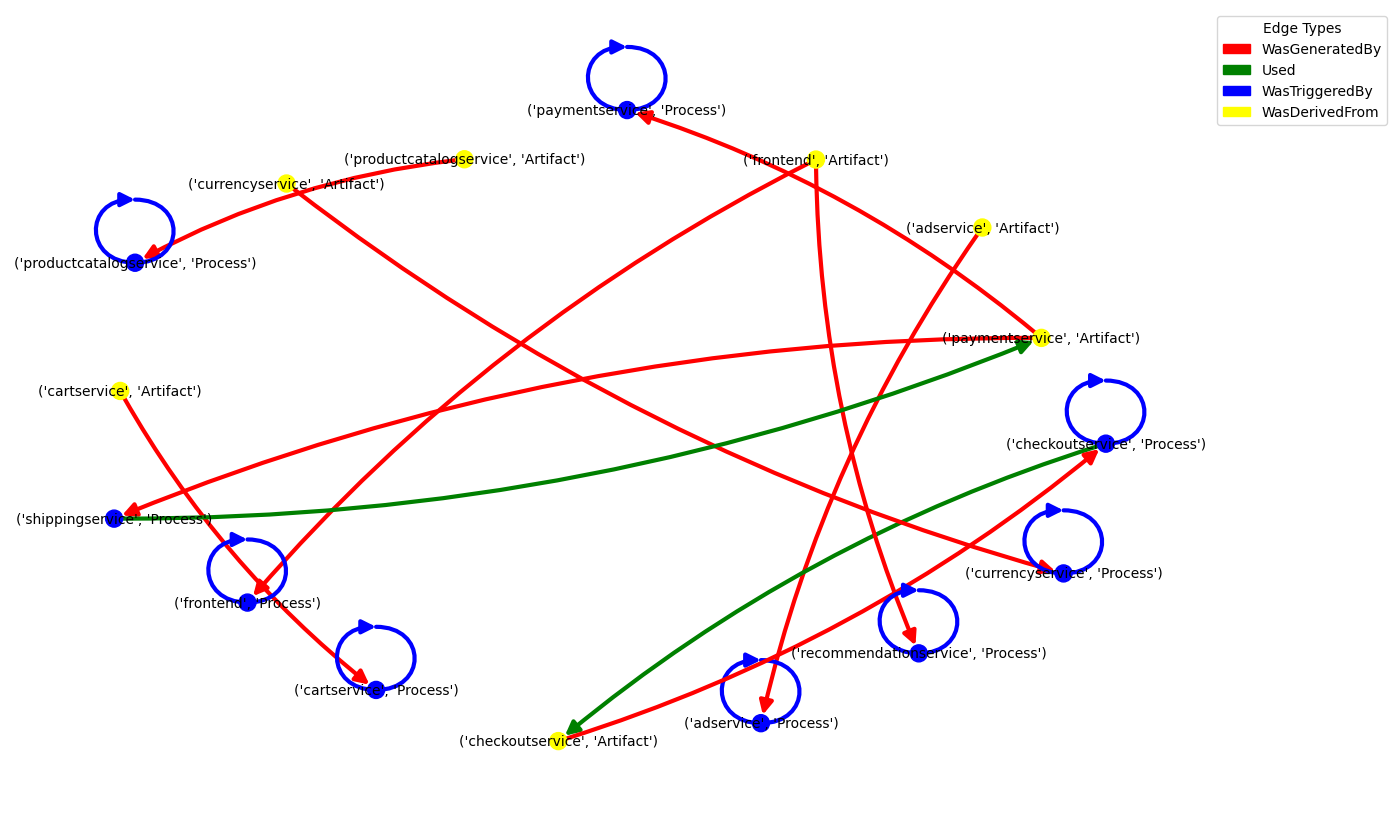

In [253]:
plt.figure(figsize=(12,8))
nx.draw(G, pos, with_labels=True, node_size=150, font_size=10, width=3,
        node_color=[nodes_color_map[node] for node in G.nodes()], 
        edge_color=[edges_color_map[edge] for edge in G.edges()],
        arrows=True, arrowsize=20,
        connectionstyle='arc3, rad=0.1')

legend_patches = [mpatches.Patch(color=color, label=label) for label, color in edges_colors_dict.items()]
plt.legend(handles=legend_patches, title='Edge Types', loc='upper left', bbox_to_anchor=(1, 1))

# Display the graph with the legend
#
plt.savefig('prov_graph.png', bbox_inches="tight", pad_inches=1)
plt.show()

# Attack Graph Example

In [254]:
# Extract from app_process_df and app_artifact_df only the rows of 'frontend' and 'recommendation' services
frontend_process_df = app_process_df[app_process_df['svc'] == 'frontend']
frontend_artifact_df = app_artifact_df[app_artifact_df['svc'] == 'frontend']
recommendation_process_df = app_process_df[app_process_df['svc'] == 'recommendationservice']
recommendation_artifact_df = tgid_app_artifact_df[tgid_app_artifact_df['svc'] == 'recommendationservice']

In [255]:
frontend_artifact_df

id      type path         subtype  \
96    be892937315bea0644510e695d37ac30  Artifact  NaN  network socket   
97    5a7a49b0a1c2096d4e6e896d35f9194d  Artifact  NaN  network socket   
98    80a3b6046c1aa2dda29b76dc32d1e4fa  Artifact  NaN  network socket   
99    cf367aec66d57a49adcb74b784437e1f  Artifact  NaN  network socket   
154   e7026795986d1db96f7ca019fe9aca94  Artifact  NaN  network socket   
...                                ...       ...  ...             ...   
2612  6158494b504be4c0d1c6531364647cbb  Artifact  NaN  network socket   
2636  48108c38dec99d5ecc061fea3039076a  Artifact  NaN  network socket   
2637  3755bde2467599dfa823ec65cb26788d  Artifact  NaN  network socket   
2639  afcfa21812d2f719e81ab88ad8db4765  Artifact  NaN  network socket   
2685  44593fa4d9a1562de7a6c9d5cc888d70  Artifact  NaN  network socket   

     permissions epoch   source version  \
96           NaN     0  syscall       0   
97           NaN     0  syscall       0   
98           NaN     0  syscall       0   
99           NaN     0  syscall       0   
154          NaN     0  syscall       0   
...          ...   ...      ...     ...   
2612         NaN     0  syscall       0   
2636         NaN     0  syscall       0   
2637         NaN     0  syscall       0   
2639         NaN     0  syscall       0   
2685         NaN     0  syscall       0   

                                local address remote port protocol  \
96                                  127.0.0.1        8080      tcp   
97    0000:0000:0000:0000:0000:0000:0000:0000       46636      tcp   
98                                  127.0.0.1        8080      tcp   
99    0000:0000:0000:0000:0000:0000:0000:0000       46642      tcp   
154   0000:0000:0000:0000:0000:0000:0000:0000       46658      tcp   
...                                       ...         ...      ...   
2612  0000:0000:0000:0000:0000:0000:0000:0000       58512      tcp   
2636                                127.0.0.1        8080      tcp   
2637  0000:0000:0000:0000:0000:0000:0000:0000       58522      tcp   
2639  0000:0000:0000:0000:0000:0000:0000:0000       35062      tcp   
2685  0000:0000:0000:0000:0000:0000:0000:0000       35064      tcp   

                               remote address local port net namespace  \
96                                    0.0.0.0      46636    4026532231   
97    0000:0000:0000:0000:0000:FFFF:7F00:0001       8080            -1   
98                                    0.0.0.0      46642    4026532231   
99    0000:0000:0000:0000:0000:FFFF:7F00:0001       8080            -1   
154   0000:0000:0000:0000:0000:FFFF:7F00:0001       8080            -1   
...                                       ...        ...           ...   
2612  0000:0000:0000:0000:0000:FFFF:7F00:0001       8080            -1   
2636                                  0.0.0.0      58522    4026532694   
2637  0000:0000:0000:0000:0000:FFFF:7F00:0001       8080            -1   
2639  0000:0000:0000:0000:0000:FFFF:AC1F:1EE3       8080    4026532830   
2685  0000:0000:0000:0000:0000:FFFF:AC1F:1EE3       8080    4026532830   

     memory address size tgid read fd write fd       svc  
96              NaN  NaN  NaN     NaN      NaN  frontend  
97              NaN  NaN  NaN     NaN      NaN  frontend  
98              NaN  NaN  NaN     NaN      NaN  frontend  
99              NaN  NaN  NaN     NaN      NaN  frontend  
154             NaN  NaN  NaN     NaN      NaN  frontend  
...             ...  ...  ...     ...      ...       ...  
2612            NaN  NaN  NaN     NaN      NaN  frontend  
2636            NaN  NaN  NaN     NaN      NaN  frontend  
2637            NaN  NaN  NaN     NaN      NaN  frontend  
2639            NaN  NaN  NaN     NaN      NaN  frontend  
2685            NaN  NaN  NaN     NaN      NaN  frontend  

[61 rows x 20 columns]

In [256]:
frontend_process_df

id     type   gid  euid  \
4    0ef366a12c22d68dcc35e410ab69719e  Process  1000  1000   
5    3f921fd1ce1cc790417d2071cc0a3c34  Process  1000  1000   
6    e6103611b0969dad371a1d6e665772e7  Process  1000  1000   
7    ff8a80868c60e4a5a1503a31124cd340  Process  1000  1000   
9    b6acb3e5c8618efc89e85cd9e2ee9823  Process  1000  1000   
..                                ...      ...   ...   ...   
574  aa7be1482265e492307635da452f7b9c  Process  1000  1000   
575  b5b8ec131e3acac550fe39041a7484e0  Process  1000  1000   
576  3d35c5e45fcb786b986f6da17039d06f  Process  1000  1000   
577  3a147b8c7f12441918150d7faefb41a3  Process  1000  1000   
578  8c9563ea507ad18d66d60bf2789cd371  Process  1000  1000   

    children pid namespace   pid seen time   source net namespace  \
4                       -1  1711       NaN  syscall            -1   
5               4026532688  1723       NaN  syscall    4026532231   
6               4026532688  1724       NaN  syscall    4026532231   
7               4026532688  1725       NaN  syscall    4026532231   
9               4026532688  1726       NaN  syscall    4026532231   
..                     ...   ...       ...      ...           ...   
574             4026532688  3488       NaN  syscall    4026532231   
575             4026532688  3489       NaN  syscall    4026532231   
576             4026532688  3490       NaN  syscall    4026532231   
577             4026532688  3491       NaN  syscall    4026532231   
578             4026532688  3492       NaN  syscall    4026532231   

    ipc namespace  ...   uid  egid                     exe mount namespace  \
4              -1  ...  1000  1000  /bin/grpc_health_probe              -1   
5      4026532657  ...  1000  1000  /bin/grpc_health_probe      4026532687   
6      4026532657  ...  1000  1000  /bin/grpc_health_probe      4026532687   
7      4026532657  ...  1000  1000  /bin/grpc_health_probe      4026532687   
9      4026532657  ...  1000  1000  /bin/grpc_health_probe      4026532687   
..            ...  ...   ...   ...                     ...             ...   
574    4026532657  ...  1000  1000  /bin/grpc_health_probe      4026532687   
575    4026532657  ...  1000  1000  /bin/grpc_health_probe      4026532687   
576    4026532657  ...  1000  1000  /bin/grpc_health_probe      4026532687   
577    4026532657  ...  1000  1000  /bin/grpc_health_probe      4026532687   
578    4026532657  ...  1000  1000  /bin/grpc_health_probe      4026532687   

                name user namespace      start time  \
4    grpc_health_pro             -1  1702119793.592   
5    grpc_health_pro     4026531837  1702119793.596   
6    grpc_health_pro     4026531837  1702119793.596   
7    grpc_health_pro     4026531837  1702119793.596   
9    grpc_health_pro     4026531837  1702119793.604   
..               ...            ...             ...   
574  grpc_health_pro     4026531837  1702119823.620   
575  grpc_health_pro     4026531837  1702119823.620   
576  grpc_health_pro     4026531837  1702119823.640   
577  grpc_health_pro     4026531837  1702119823.640   
578  grpc_health_pro     4026531837  1702119823.648   

                           command line ns pid       svc  
4    /bin/grpc_health_probe -addr=:8080    NaN  frontend  
5    /bin/grpc_health_probe -addr=:8080   2489  frontend  
6    /bin/grpc_health_probe -addr=:8080   2490  frontend  
7    /bin/grpc_health_probe -addr=:8080   2491  frontend  
9    /bin/grpc_health_probe -addr=:8080   2492  frontend  
..                                  ...    ...       ...  
574  /bin/grpc_health_probe -addr=:8080   2643  frontend  
575  /bin/grpc_health_probe -addr=:8080   2644  frontend  
576  /bin/grpc_health_probe -addr=:8080   2645  frontend  
577  /bin/grpc_health_probe -addr=:8080   2646  frontend  
578  /bin/grpc_health_probe -addr=:8080   2647  frontend  

[88 rows x 23 columns]

In [257]:
recommendation_process_df

id     type   gid  euid  \
23   4419a07dc8f7d1cf3bbd5e1eb0d842aa  Process  1000  1000   
25   02d7ce6333a0b3806b3891432134a908  Process  1000  1000   
26   a708cec856d38a1c55cc1bb21f56e745  Process  1000  1000   
27   31f2ee457455785dcd386f5565fcf713  Process  1000  1000   
29   7938335375279b25f1ce8933e195a8e0  Process  1000  1000   
..                                ...      ...   ...   ...   
600  3d0f1dcc743b20256124890425f29662  Process  1000  1000   
601  fa244af18699aad93cfd55ee723d0642  Process  1000  1000   
602  a1a632f950fd2f6f68fcb1679477041d  Process  1000  1000   
603  7fca268b8fc4f80a5684b91cf8d85e6a  Process  1000  1000   
604  6ac0bca0da91a3bc074f89287bf79352  Process  1000  1000   

    children pid namespace   pid seen time   source net namespace  \
23                      -1  1765       NaN  syscall            -1   
25              4026533065  1786       NaN  syscall    4026532694   
26              4026533065  1787       NaN  syscall    4026532694   
27              4026533065  1788       NaN  syscall    4026532694   
29              4026533065  1789       NaN  syscall    4026532694   
..                     ...   ...       ...      ...           ...   
600             4026533065  3555       NaN  syscall    4026532694   
601             4026533065  3556       NaN  syscall    4026532694   
602             4026533065  3557       NaN  syscall    4026532694   
603             4026533065  3558       NaN  syscall    4026532694   
604             4026533065  3559       NaN  syscall    4026532694   

    ipc namespace  ...   uid  egid                     exe mount namespace  \
23             -1  ...  1000  1000  /bin/grpc_health_probe              -1   
25     4026533040  ...  1000  1000  /bin/grpc_health_probe      4026533064   
26     4026533040  ...  1000  1000  /bin/grpc_health_probe      4026533064   
27     4026533040  ...  1000  1000  /bin/grpc_health_probe      4026533064   
29     4026533040  ...  1000  1000  /bin/grpc_health_probe      4026533064   
..            ...  ...   ...   ...                     ...             ...   
600    4026533040  ...  1000  1000  /bin/grpc_health_probe      4026533064   
601    4026533040  ...  1000  1000  /bin/grpc_health_probe      4026533064   
602    4026533040  ...  1000  1000  /bin/grpc_health_probe      4026533064   
603    4026533040  ...  1000  1000  /bin/grpc_health_probe      4026533064   
604    4026533040  ...  1000  1000  /bin/grpc_health_probe      4026533064   

                name user namespace      start time  \
23   grpc_health_pro             -1  1702119793.860   
25   grpc_health_pro     4026531837  1702119793.892   
26   grpc_health_pro     4026531837  1702119793.892   
27   grpc_health_pro     4026531837  1702119793.892   
29   grpc_health_pro     4026531837  1702119793.896   
..               ...            ...             ...   
600  grpc_health_pro     4026531837  1702119823.948   
601  grpc_health_pro     4026531837  1702119823.948   
602  grpc_health_pro     4026531837  1702119823.952   
603  grpc_health_pro     4026531837  1702119823.952   
604  grpc_health_pro     4026531837  1702119823.952   

                           command line ns pid                    svc  
23   /bin/grpc_health_probe -addr=:8080    NaN  recommendationservice  
25   /bin/grpc_health_probe -addr=:8080   2468  recommendationservice  
26   /bin/grpc_health_probe -addr=:8080   2469  recommendationservice  
27   /bin/grpc_health_probe -addr=:8080   2470  recommendationservice  
29   /bin/grpc_health_probe -addr=:8080   2471  recommendationservice  
..                                  ...    ...                    ...  
600  /bin/grpc_health_probe -addr=:8080   2627  recommendationservice  
601  /bin/grpc_health_probe -addr=:8080   2628  recommendationservice  
602  /bin/grpc_health_probe -addr=:8080   2629  recommendationservice  
603  /bin/grpc_health_probe -addr=:8080   2630  recommendationservice  
604  /bin/grpc_health_probe -addr=:8080   2631  recommendationservice  

In [258]:
# Filter only_app_edges to only 'wasGeneratedBy' edges from_svc frontend to_svc recommendation
frontend_recommendation_edges_df = only_app_edges_df[(only_app_edges_df['svc_from'] == 'frontend') & (only_app_edges_df['svc_to'] == 'recommendationservice') & (only_app_edges_df['type'] == 'WasGeneratedBy')]
frontend_recommendation_edges_df

from                                to  \
1905   f6afa0dc808e7927692a2a402dd37e1b  7938335375279b25f1ce8933e195a8e0   
1921   5ac5d0a9cea066d03b805a8a1e419e54  556ddab74e5a9f1e44127c1703370a39   
12369  00ab8b8c0d3e4e6aeab4db0e22ea64eb  9d6ce1c31020887d13d883361025c2ee   
12899  d71481aa09b2bfca828d6c345107b07c  36a7ab0bbe5a69e71553a956d92162ca   
20323  b66f7fabda58b5d9a660dde2c632a858  39241435479947f185592bbecbc28b80   
20334  08685322b23cb3b656e56d0752fc0718  b4a487ce6f2981f508f4e9c329f88b97   
24051  f2c00679e2a14cc76e0d9e0f969abfad  bb6de3275d9c9e18d626f45aec4849a8   
33205  d0a89b0dfc5f7be1031d6a01ffda1834  c0e46873eb2e14900a0a357490175c7b   
33218  4d255ae86ee754eabe0a683ddba9da98  8920251470c87404641170b35a220c14   
36607  08382f5e7de87c4a7685b9e87e7305cd  51d5486ce45b3035018692b9bbab7ed8   
36651  48108c38dec99d5ecc061fea3039076a  c03b2128e473d4df15969ead098a6e1f   

                 type event id flags   source            time operation  \
1905   WasGeneratedBy     2424   NaN  syscall  1702119793.940   connect   
1921   WasGeneratedBy     2445   NaN  syscall  1702119793.952   connect   
12369  WasGeneratedBy    17597   NaN  syscall  1702119804.180   connect   
12899  WasGeneratedBy    18186   NaN  syscall  1702119804.268   connect   
20323  WasGeneratedBy    28648   NaN  syscall  1702119809.544   connect   
20334  WasGeneratedBy    28666   NaN  syscall  1702119809.548   connect   
24051  WasGeneratedBy    34614   NaN  syscall  1702119814.004   connect   
33205  WasGeneratedBy    47433   NaN  syscall  1702119818.984   connect   
33218  WasGeneratedBy    47466   NaN  syscall  1702119819.040   connect   
36607  WasGeneratedBy    53113   NaN  syscall  1702119823.900   connect   
36651  WasGeneratedBy    53166   NaN  syscall  1702119823.952   connect   

      protection advice  svc_from                 svc_to  
1905         NaN    NaN  frontend  recommendationservice  
1921         NaN    NaN  frontend  recommendationservice  
12369        NaN    NaN  frontend  recommendationservice  
12899        NaN    NaN  frontend  recommendationservice  
20323        NaN    NaN  frontend  recommendationservice  
20334        NaN    NaN  frontend  recommendationservice  
24051        NaN    NaN  frontend  recommendationservice  
33205        NaN    NaN  frontend  recommendationservice  
33218        NaN    NaN  frontend  recommendationservice  
36607        NaN    NaN  frontend  recommendationservice  
36651        NaN    NaN  frontend  recommendationservice

In [259]:
# Filter only_app_edges to only 'wasGeneratedBy' edges from_svc frontend to_svc frontend
frontend_frontend_edges_df = only_app_edges_df[(only_app_edges_df['svc_from'] == 'frontend') & (only_app_edges_df['svc_to'] == 'frontend') & (only_app_edges_df['type'] == 'WasGeneratedBy')]
frontend_frontend_edges_df

from                                to  \
919    9154e1fe447110ceac41673360bce4a7  0ef366a12c22d68dcc35e410ab69719e   
920    3188e84116ec3dec720b426708d995b9  0ef366a12c22d68dcc35e410ab69719e   
921    2cf03ed16c7bffbd199edfee2d2a61a4  0ef366a12c22d68dcc35e410ab69719e   
922    4284b3f03d8fa9c20037b8bbe38b3329  0ef366a12c22d68dcc35e410ab69719e   
923    50be0f5b01f2561f7210c25484bc3838  0ef366a12c22d68dcc35e410ab69719e   
...                                 ...                               ...   
35115  747c6caab31f7ae7ffbd38b11b5590cc  3328b57511af22f921b906a8f7c6ec12   
35120  ba75273f906d444ebc345b74e9b61338  3328b57511af22f921b906a8f7c6ec12   
35124  9b8369556bccd85e49fab3754d85eb8b  3328b57511af22f921b906a8f7c6ec12   
35128  c5cce8d6c02d473ae31c07808ce2067a  aa7be1482265e492307635da452f7b9c   
35132  6866366082a86d3fb096240ec8e56fac  3328b57511af22f921b906a8f7c6ec12   

                 type event id flags   source            time     operation  \
919    WasGeneratedBy     1310   NaN  syscall  1702119793.596  mmap (write)   
920    WasGeneratedBy     1311   NaN  syscall  1702119793.596  mmap (write)   
921    WasGeneratedBy     1312   NaN  syscall  1702119793.596  mmap (write)   
922    WasGeneratedBy     1313   NaN  syscall  1702119793.596  mmap (write)   
923    WasGeneratedBy     1314   NaN  syscall  1702119793.596  mmap (write)   
...               ...      ...   ...      ...             ...           ...   
35115  WasGeneratedBy    51327   NaN  syscall  1702119823.620  mmap (write)   
35120  WasGeneratedBy    51332   NaN  syscall  1702119823.620  mmap (write)   
35124  WasGeneratedBy    51340   NaN  syscall  1702119823.640  mmap (write)   
35128  WasGeneratedBy    51344   NaN  syscall  1702119823.640       connect   
35132  WasGeneratedBy    51349   NaN  syscall  1702119823.648  mmap (write)   

      protection advice  svc_from    svc_to  
919            3    NaN  frontend  frontend  
920            0    NaN  frontend  frontend  
921            0    NaN  frontend  frontend  
922            0    NaN  frontend  frontend  
923            0    NaN  frontend  frontend  
...          ...    ...       ...       ...  
35115          3    NaN  frontend  frontend  
35120          3    NaN  frontend  frontend  
35124          3    NaN  frontend  frontend  
35128        NaN    NaN  frontend  frontend  
35132          3    NaN  frontend  frontend  

[278 rows x 12 columns]

In [260]:
# Filter only_app_edges to only 'wasTriggeredBy' edges from_svc frontend to_svc frontend
frontend_frontend_trigger_edges_df = only_app_edges_df[(only_app_edges_df['svc_from'] == 'frontend') & (only_app_edges_df['svc_to'] == 'frontend') & (only_app_edges_df['type'] == 'WasTriggeredBy')]
frontend_frontend_trigger_edges_df

from                                to  \
937    3f921fd1ce1cc790417d2071cc0a3c34  0ef366a12c22d68dcc35e410ab69719e   
938    e6103611b0969dad371a1d6e665772e7  0ef366a12c22d68dcc35e410ab69719e   
939    ff8a80868c60e4a5a1503a31124cd340  0ef366a12c22d68dcc35e410ab69719e   
944    b6acb3e5c8618efc89e85cd9e2ee9823  0ef366a12c22d68dcc35e410ab69719e   
952    40c6909e0a13834bd770505624453279  0ef366a12c22d68dcc35e410ab69719e   
...                                 ...                               ...   
35119  b5b8ec131e3acac550fe39041a7484e0  3328b57511af22f921b906a8f7c6ec12   
35123  3d35c5e45fcb786b986f6da17039d06f  3328b57511af22f921b906a8f7c6ec12   
35125  3a147b8c7f12441918150d7faefb41a3  3328b57511af22f921b906a8f7c6ec12   
35133  8c9563ea507ad18d66d60bf2789cd371  3328b57511af22f921b906a8f7c6ec12   
35134  3328b57511af22f921b906a8f7c6ec12  3328b57511af22f921b906a8f7c6ec12   

                 type event id  \
937    WasTriggeredBy     1328   
938    WasTriggeredBy     1329   
939    WasTriggeredBy     1330   
944    WasTriggeredBy     1340   
952    WasTriggeredBy     1351   
...               ...      ...   
35119  WasTriggeredBy    51331   
35123  WasTriggeredBy    51339   
35125  WasTriggeredBy    51341   
35133  WasTriggeredBy    51350   
35134  WasTriggeredBy    51351   

                                                   flags   source  \
937    CLONE_SIGHAND|CLONE_SETTLS|CLONE_SYSVSEM|CLONE...  syscall   
938    CLONE_SIGHAND|CLONE_SETTLS|CLONE_SYSVSEM|CLONE...  syscall   
939    CLONE_SIGHAND|CLONE_SETTLS|CLONE_SYSVSEM|CLONE...  syscall   
944    CLONE_SIGHAND|CLONE_SETTLS|CLONE_SYSVSEM|CLONE...  syscall   
952    CLONE_SIGHAND|CLONE_SETTLS|CLONE_SYSVSEM|CLONE...  syscall   
...                                                  ...      ...   
35119  CLONE_SIGHAND|CLONE_SETTLS|CLONE_SYSVSEM|CLONE...  syscall   
35123  CLONE_SIGHAND|CLONE_SETTLS|CLONE_SYSVSEM|CLONE...  syscall   
35125  CLONE_SIGHAND|CLONE_SETTLS|CLONE_SYSVSEM|CLONE...  syscall   
35133  CLONE_SIGHAND|CLONE_SETTLS|CLONE_SYSVSEM|CLONE...  syscall   
35134                                                NaN  syscall   

                 time operation protection advice  svc_from    svc_to  
937    1702119793.596     clone        NaN    NaN  frontend  frontend  
938    1702119793.596     clone        NaN    NaN  frontend  frontend  
939    1702119793.596     clone        NaN    NaN  frontend  frontend  
944    1702119793.604     clone        NaN    NaN  frontend  frontend  
952    1702119793.640     clone        NaN    NaN  frontend  frontend  
...               ...       ...        ...    ...       ...       ...  
35119  1702119823.620     clone        NaN    NaN  frontend  frontend  
35123  1702119823.640     clone        NaN    NaN  frontend  frontend  
35125  1702119823.640     clone        NaN    NaN  frontend  frontend  
35133  1702119823.648     clone        NaN    NaN  frontend  frontend  
35134  1702119823.648      exit        NaN    NaN  frontend  frontend  

[87 rows x 12 columns]

In [261]:
# Filter only_app_edges to only 'wasTriggeredBy' edges from_svc recommendation to_svc recommendation
recommendation_recommendation_trigger_edges_df = only_app_edges_df[(only_app_edges_df['svc_from'] == 'recommendationservice') & (only_app_edges_df['svc_to'] == 'recommendationservice') & (only_app_edges_df['type'] == 'WasTriggeredBy')]
recommendation_recommendation_trigger_edges_df

from                                to  \
1830   02d7ce6333a0b3806b3891432134a908  4419a07dc8f7d1cf3bbd5e1eb0d842aa   
1831   a708cec856d38a1c55cc1bb21f56e745  4419a07dc8f7d1cf3bbd5e1eb0d842aa   
1832   31f2ee457455785dcd386f5565fcf713  4419a07dc8f7d1cf3bbd5e1eb0d842aa   
1837   7938335375279b25f1ce8933e195a8e0  4419a07dc8f7d1cf3bbd5e1eb0d842aa   
1877   18e3071218d1394dbfb61b1661d0e19f  4419a07dc8f7d1cf3bbd5e1eb0d842aa   
...                                 ...                               ...   
36643  fa244af18699aad93cfd55ee723d0642  ca982e93bb9e6025da3e66671eaaf906   
36645  a1a632f950fd2f6f68fcb1679477041d  ca982e93bb9e6025da3e66671eaaf906   
36648  7fca268b8fc4f80a5684b91cf8d85e6a  ca982e93bb9e6025da3e66671eaaf906   
36653  6ac0bca0da91a3bc074f89287bf79352  ca982e93bb9e6025da3e66671eaaf906   
36655  ca982e93bb9e6025da3e66671eaaf906  ca982e93bb9e6025da3e66671eaaf906   

                 type event id  \
1830   WasTriggeredBy     2338   
1831   WasTriggeredBy     2339   
1832   WasTriggeredBy     2340   
1837   WasTriggeredBy     2350   
1877   WasTriggeredBy     2397   
...               ...      ...   
36643  WasTriggeredBy    53154   
36645  WasTriggeredBy    53159   
36648  WasTriggeredBy    53163   
36653  WasTriggeredBy    53168   
36655  WasTriggeredBy    53170   

                                                   flags   source  \
1830   CLONE_SIGHAND|CLONE_SETTLS|CLONE_SYSVSEM|CLONE...  syscall   
1831   CLONE_SIGHAND|CLONE_SETTLS|CLONE_SYSVSEM|CLONE...  syscall   
1832   CLONE_SIGHAND|CLONE_SETTLS|CLONE_SYSVSEM|CLONE...  syscall   
1837   CLONE_SIGHAND|CLONE_SETTLS|CLONE_SYSVSEM|CLONE...  syscall   
1877   CLONE_SIGHAND|CLONE_SETTLS|CLONE_SYSVSEM|CLONE...  syscall   
...                                                  ...      ...   
36643  CLONE_SIGHAND|CLONE_SETTLS|CLONE_SYSVSEM|CLONE...  syscall   
36645  CLONE_SIGHAND|CLONE_SETTLS|CLONE_SYSVSEM|CLONE...  syscall   
36648  CLONE_SIGHAND|CLONE_SETTLS|CLONE_SYSVSEM|CLONE...  syscall   
36653  CLONE_SIGHAND|CLONE_SETTLS|CLONE_SYSVSEM|CLONE...  syscall   
36655                                                NaN  syscall   

                 time operation protection advice               svc_from  \
1830   1702119793.892     clone        NaN    NaN  recommendationservice   
1831   1702119793.892     clone        NaN    NaN  recommendationservice   
1832   1702119793.892     clone        NaN    NaN  recommendationservice   
1837   1702119793.896     clone        NaN    NaN  recommendationservice   
1877   1702119793.900     clone        NaN    NaN  recommendationservice   
...               ...       ...        ...    ...                    ...   
36643  1702119823.948     clone        NaN    NaN  recommendationservice   
36645  1702119823.952     clone        NaN    NaN  recommendationservice   
36648  1702119823.952     clone        NaN    NaN  recommendationservice   
36653  1702119823.952     clone        NaN    NaN  recommendationservice   
36655  1702119823.956      exit        NaN    NaN  recommendationservice   

                      svc_to  
1830   recommendationservice  
1831   recommendationservice  
1832   recommendationservice  
1837   recommendationservice  
1877   recommendationservice  
...                      ...  
36643  recommendationservice  
36645  recommendationservice  
36648  recommendationservice  
36653  recommendationservice  
36655  recommendationservice  

[88 rows x 12 columns]

In [262]:
artifacts=pd.read_csv('app_artifact.csv')
artifacts

Unnamed: 0                                id      type  path  \
0             48  a41db92088a31a823a23ed48145dd661  Artifact   NaN   
1             49  a2f50c6b069415c603efdac935d00de4  Artifact   NaN   
2             96  be892937315bea0644510e695d37ac30  Artifact   NaN   
3             97  5a7a49b0a1c2096d4e6e896d35f9194d  Artifact   NaN   
4             98  80a3b6046c1aa2dda29b76dc32d1e4fa  Artifact   NaN   
...          ...                               ...       ...   ...   
1573        2754  e42c94e07eeb67b22db5bfe04871a556  Artifact   NaN   
1574        2755  b73dc1bfd3dbf8baf9df86abb1edd701  Artifact   NaN   
1575        2756  e632a6b0731ba7453465352ffa5fcf15  Artifact   NaN   
1576        2757  3590db22532593fa2136e450a85658f3  Artifact   NaN   
1577        2758  c2d9426e2cdd5a172638ac72381b1048  Artifact   NaN   

             subtype  permissions  epoch   source  version  \
0     network socket          NaN    0.0  syscall        0   
1     network socket          NaN    0.0  syscall        0   
2     network socket          NaN    0.0  syscall        0   
3     network socket          NaN    0.0  syscall        0   
4     network socket          NaN    0.0  syscall        0   
...              ...          ...    ...      ...      ...   
1573          memory          NaN    NaN  syscall        0   
1574          memory          NaN    NaN  syscall        0   
1575          memory          NaN    NaN  syscall        0   
1576          memory          NaN    NaN  syscall        0   
1577          memory          NaN    NaN  syscall        0   

                                local address  ...  protocol  \
0                                     0.0.0.0  ...       tcp   
1                                     0.0.0.0  ...       tcp   
2                                   127.0.0.1  ...       tcp   
3     0000:0000:0000:0000:0000:0000:0000:0000  ...       tcp   
4                                   127.0.0.1  ...       tcp   
...                                       ...  ...       ...   
1573                                      NaN  ...       NaN   
1574                                      NaN  ...       NaN   
1575                                      NaN  ...       NaN   
1576                                      NaN  ...       NaN   
1577                                      NaN  ...       NaN   

                               remote address local port  net namespace  \
0                               172.31.30.227     6379.0  -1.000000e+00   
1                               172.31.30.227     6379.0  -1.000000e+00   
2                                     0.0.0.0    46636.0   4.026532e+09   
3     0000:0000:0000:0000:0000:FFFF:7F00:0001     8080.0  -1.000000e+00   
4                                     0.0.0.0    46642.0   4.026532e+09   
...                                       ...        ...            ...   
1573                                      NaN        NaN            NaN   
1574                                      NaN        NaN            NaN   
1575                                      NaN        NaN            NaN   
1576                                      NaN        NaN            NaN   
1577                                      NaN        NaN            NaN   

      memory address   size    tgid  read fd  write fd             svc  
0                NaN    NaN     NaN      NaN       NaN      redis-cart  
1                NaN    NaN     NaN      NaN       NaN      redis-cart  
2                NaN    NaN     NaN      NaN       NaN        frontend  
3                NaN    NaN     NaN      NaN       NaN        frontend  
4                NaN    NaN     NaN      NaN       NaN        frontend  
...              ...    ...     ...      ...       ...             ...  
1573    7fe433f69000  10000  3657.0      NaN       NaN  paymentservice  
1574    7fe433f59000  10000  3657.0      NaN       NaN  paymentservice  
1575    7fe433f19000  40000  3657.0      NaN       NaN  paymentservice  
1576    7fe433ed9000

In [263]:
processes=pd.read_csv('app_process.csv')
processes

Unnamed: 0                                id     type   gid  euid  \
0             4  0ef366a12c22d68dcc35e410ab69719e  Process  1000  1000   
1             5  3f921fd1ce1cc790417d2071cc0a3c34  Process  1000  1000   
2             6  e6103611b0969dad371a1d6e665772e7  Process  1000  1000   
3             7  ff8a80868c60e4a5a1503a31124cd340  Process  1000  1000   
4             9  b6acb3e5c8618efc89e85cd9e2ee9823  Process  1000  1000   
..          ...                               ...      ...   ...   ...   
491         637  124d026d2a64c4b2c67947a310bb3e68  Process  1000  1000   
492         638  09f4ab5b14d6f9f2af1ad6fcda6c7623  Process  1000  1000   
493         639  c31db7322a8b70395140d140667700d6  Process  1000  1000   
494         640  5ebe4fceb72860e7470d44db5eaa655a  Process  1000  1000   
495         641  29569b52a8ab611e1dfc28ccb0ecb21a  Process  1000  1000   

     children pid namespace     pid  seen time   source  net namespace  ...  \
0             -1.000000e+00  1711.0        NaN  syscall  -1.000000e+00  ...   
1              4.026533e+09  1723.0        NaN  syscall   4.026532e+09  ...   
2              4.026533e+09  1724.0        NaN  syscall   4.026532e+09  ...   
3              4.026533e+09  1725.0        NaN  syscall   4.026532e+09  ...   
4              4.026533e+09  1726.0        NaN  syscall   4.026532e+09  ...   
..                      ...     ...        ...      ...            ...  ...   
491            4.026533e+09  3665.0        NaN  syscall   4.026532e+09  ...   
492            4.026533e+09  3666.0        NaN  syscall   4.026532e+09  ...   
493            4.026533e+09  3667.0        NaN  syscall   4.026532e+09  ...   
494            4.026533e+09  3668.0        NaN  syscall   4.026532e+09  ...   
495            4.026533e+09  3669.0        NaN  syscall   4.026532e+09  ...   

      uid  egid                     exe mount namespace             name  \
0    1000  1000  /bin/grpc_health_probe   -1.000000e+00  grpc_health_pro   
1    1000  1000  /bin/grpc_health_probe    4.026533e+09  grpc_health_pro   
2    1000  1000  /bin/grpc_health_probe    4.026533e+09  grpc_health_pro   
3    1000  1000  /bin/grpc_health_probe    4.026533e+09  grpc_health_pro   
4    1000  1000  /bin/grpc_health_probe    4.026533e+09  grpc_health_pro   
..    ...   ...                     ...             ...              ...   
491  1000  1000  /bin/grpc_health_probe    4.026533e+09  grpc_health_pro   
492  1000  1000  /bin/grpc_health_probe    4.026533e+09  grpc_health_pro   
493  1000  1000  /bin/grpc_health_probe    4.026533e+09  grpc_health_pro   
494  1000  1000  /bin/grpc_health_probe    4.026533e+09  grpc_health_pro   
495  1000  1000  /bin/grpc_health_probe    4.026533e+09  grpc_health_pro   

     user namespace    start time                         command line  \
0     -1.000000e+00  1.702120e+09   /bin/grpc_health_probe -addr=:8080   
1      4.026532e+09  1.702120e+09   /bin/grpc_health_probe -addr=:8080   
2      4.026532e+09  1.702120e+09   /bin/grpc_health_probe -addr=:8080   
3      4.026532e+09  1.702120e+09   /bin/grpc_health_probe -addr=:8080   
4      4.026532e+09  1.702120e+09   /bin/grpc_health_probe -addr=:8080   
..              ...           ...                                  ...   
491    4.026532e+09  1.702120e+09  /bin/grpc_health_probe -addr=:50051   
492    4.026532e+09  1.702120e+09  /bin/grpc_health_probe -addr=:50051   
493    4.026532e+09  1.702120e+09  /bin/grpc_health_probe -addr=:50051   
494    4.026532e+09  1.702120e+09  /bin/grpc_health_probe -addr=:50051   
495    4.026532e+09  1.702120e+09  /bin/grpc_health_probe -addr=:50051   

     ns pid             svc  
0       NaN        frontend  
1    2489.0        frontend  
2    2490.0        frontend  
3    2491.0        frontend  
4    2492.0        frontend  
..      ...             ...  
491  1375.0  paymentservice  
492  1376.0  paymentservice  
493  1377.0  paymentservice  
494  1378.0  paymentservice  
495  1379.0  paymentservice  

[496

In [264]:
edges=pd.read_csv('app_edges.csv')
# edges

In [265]:
import numpy as np
import random
def remove_half_memory_artifacts(artifacts_df, edges_df):
    # Filter memory artifacts
    memory_artifacts = artifacts_df[artifacts_df['subtype'] == 'memory']

    # Group by service and randomly select about half to remove
    to_remove = pd.DataFrame()
    for service, group in memory_artifacts.groupby('svc'):
        half_count = len(group) // 4
        half_count=half_count*3
        remove_ids = group.sample(n=half_count).index
        to_remove = pd.concat([to_remove, artifacts_df.loc[remove_ids]])

    # Update artifacts dataframe by removing selected artifacts
    updated_artifacts_df = artifacts_df.drop(to_remove.index)

    # Update edges dataframe
    removed_ids = set(to_remove['id'])
    updated_edges_df = edges_df[~edges_df['from'].isin(removed_ids) & ~edges_df['to'].isin(removed_ids)]

    return updated_artifacts_df, updated_edges_df
df_artifacts, df_edges = artifacts.copy(deep=True), edges.copy(deep=True)
artifacts, edges= remove_half_memory_artifacts(artifacts,edges)
artifacts

Unnamed: 0                                id      type  path  \
0             48  a41db92088a31a823a23ed48145dd661  Artifact   NaN   
1             49  a2f50c6b069415c603efdac935d00de4  Artifact   NaN   
2             96  be892937315bea0644510e695d37ac30  Artifact   NaN   
3             97  5a7a49b0a1c2096d4e6e896d35f9194d  Artifact   NaN   
4             98  80a3b6046c1aa2dda29b76dc32d1e4fa  Artifact   NaN   
...          ...                               ...       ...   ...   
1561        2742  eea582e98582eef691d2b0a2d208c3e3  Artifact   NaN   
1566        2747  3893608617f829259a04893e65915e5e  Artifact   NaN   
1568        2749  51dd9a7444a45d7de2a8c9e43a4e1495  Artifact   NaN   
1575        2756  e632a6b0731ba7453465352ffa5fcf15  Artifact   NaN   
1576        2757  3590db22532593fa2136e450a85658f3  Artifact   NaN   

             subtype  permissions  epoch   source  version  \
0     network socket          NaN    0.0  syscall        0   
1     network socket          NaN    0.0  syscall        0   
2     network socket          NaN    0.0  syscall        0   
3     network socket          NaN    0.0  syscall        0   
4     network socket          NaN    0.0  syscall        0   
...              ...          ...    ...      ...      ...   
1561          memory          NaN    NaN  syscall        0   
1566          memory          NaN    NaN  syscall        0   
1568          memory          NaN    NaN  syscall        0   
1575          memory          NaN    NaN  syscall        0   
1576          memory          NaN    NaN  syscall        0   

                                local address  ...  protocol  \
0                                     0.0.0.0  ...       tcp   
1                                     0.0.0.0  ...       tcp   
2                                   127.0.0.1  ...       tcp   
3     0000:0000:0000:0000:0000:0000:0000:0000  ...       tcp   
4                                   127.0.0.1  ...       tcp   
...                                       ...  ...       ...   
1561                                      NaN  ...       NaN   
1566                                      NaN  ...       NaN   
1568                                      NaN  ...       NaN   
1575                                      NaN  ...       NaN   
1576                                      NaN  ...       NaN   

                               remote address local port  net namespace  \
0                               172.31.30.227     6379.0  -1.000000e+00   
1                               172.31.30.227     6379.0  -1.000000e+00   
2                                     0.0.0.0    46636.0   4.026532e+09   
3     0000:0000:0000:0000:0000:FFFF:7F00:0001     8080.0  -1.000000e+00   
4                                     0.0.0.0    46642.0   4.026532e+09   
...                                       ...        ...            ...   
1561                                      NaN        NaN            NaN   
1566                                      NaN        NaN            NaN   
1568                                      NaN        NaN            NaN   
1575                                      NaN        NaN            NaN   
1576                                      NaN        NaN            NaN   

      memory address     size    tgid  read fd  write fd             svc  
0                NaN      NaN     NaN      NaN       NaN      redis-cart  
1                NaN      NaN     NaN      NaN       NaN      redis-cart  
2                NaN      NaN     NaN      NaN       NaN        frontend  
3                NaN      NaN     NaN      NaN       NaN        frontend  
4                NaN      NaN     NaN      NaN       NaN        frontend  
...              ...      ...     ...      ...       ...             ...  
1561    7fe45628a000  4000000  3657.0      NaN       NaN  paymentservice  
1566      c000000000   400000  3657.0      NaN       NaN  paymentservice  
1568    7fe45ab0a000     1000  3657.0      NaN       NaN  paymentservice  


In [266]:
edges

Unnamed: 0                              from  \
0            458  bf568478eb1e54952760f72d50144a4e   
1            459  bf568478eb1e54952760f72d50144a4e   
2            460  a41db92088a31a823a23ed48145dd661   
3            461  a2f50c6b069415c603efdac935d00de4   
4            915  0ef366a12c22d68dcc35e410ab69719e   
...          ...                               ...   
2545       39053  29569b52a8ab611e1dfc28ccb0ecb21a   
2546       39054  58fec781896a518ed3adf046ed9e8548   
2547       39055  9cf27ca975bc259abdaf366fb69ab287   
2548       39058  4b0a0f495e2585697f7da7b211a2ef60   
2549       39060  cd9b49dcd834bd4771719cbffbf5370e   

                                    to            type  event id  \
0     a41db92088a31a823a23ed48145dd661            Used       841   
1     a2f50c6b069415c603efdac935d00de4            Used       842   
2     bf568478eb1e54952760f72d50144a4e  WasGeneratedBy       843   
3     bf568478eb1e54952760f72d50144a4e  WasGeneratedBy       846   
4     413b8704b3209061ce63aaa13a274964  WasTriggeredBy      1307   
...                                ...             ...       ...   
2545  4b0a0f495e2585697f7da7b211a2ef60  WasTriggeredBy     56570   
2546  c31db7322a8b70395140d140667700d6  WasGeneratedBy     56571   
2547  cd9b49dcd834bd4771719cbffbf5370e            Used     56572   
2548  4b0a0f495e2585697f7da7b211a2ef60  WasTriggeredBy     56575   
2549  9cf27ca975bc259abdaf366fb69ab287  WasGeneratedBy     56577   

                                                  flags   source  \
0                                                   NaN  syscall   
1                                                   NaN  syscall   
2                                                   NaN  syscall   
3                                                   NaN  syscall   
4                                                   NaN  syscall   
...                                                 ...      ...   
2545  CLONE_SIGHAND|CLONE_SETTLS|CLONE_SYSVSEM|CLONE...  syscall   
2546                                                NaN  syscall   
2547                                                NaN  syscall   
2548                                                NaN  syscall   
2549                                                NaN  syscall   

              time operation  protection  advice  
0     1.702120e+09    accept         NaN     NaN  
1     1.702120e+09    accept         NaN     NaN  
2     1.702120e+09     close         NaN     NaN  
3     1.702120e+09     close         NaN     NaN  
4     1.702120e+09    execve         NaN     NaN  
...            ...       ...         ...     ...  
2545  1.702120e+09     clone         NaN     NaN  
2546  1.702120e+09   connect         NaN     NaN  
2547  1.702120e+09    accept         NaN     NaN  
2548  1.702120e+09      exit         NaN     NaN  
2549  1.702120e+09     close         NaN     NaN  

[1506 rows x 11 columns]

In [267]:
df_artifacts

Unnamed: 0                                id      type  path  \
0             48  a41db92088a31a823a23ed48145dd661  Artifact   NaN   
1             49  a2f50c6b069415c603efdac935d00de4  Artifact   NaN   
2             96  be892937315bea0644510e695d37ac30  Artifact   NaN   
3             97  5a7a49b0a1c2096d4e6e896d35f9194d  Artifact   NaN   
4             98  80a3b6046c1aa2dda29b76dc32d1e4fa  Artifact   NaN   
...          ...                               ...       ...   ...   
1573        2754  e42c94e07eeb67b22db5bfe04871a556  Artifact   NaN   
1574        2755  b73dc1bfd3dbf8baf9df86abb1edd701  Artifact   NaN   
1575        2756  e632a6b0731ba7453465352ffa5fcf15  Artifact   NaN   
1576        2757  3590db22532593fa2136e450a85658f3  Artifact   NaN   
1577        2758  c2d9426e2cdd5a172638ac72381b1048  Artifact   NaN   

             subtype  permissions  epoch   source  version  \
0     network socket          NaN    0.0  syscall        0   
1     network socket          NaN    0.0  syscall        0   
2     network socket          NaN    0.0  syscall        0   
3     network socket          NaN    0.0  syscall        0   
4     network socket          NaN    0.0  syscall        0   
...              ...          ...    ...      ...      ...   
1573          memory          NaN    NaN  syscall        0   
1574          memory          NaN    NaN  syscall        0   
1575          memory          NaN    NaN  syscall        0   
1576          memory          NaN    NaN  syscall        0   
1577          memory          NaN    NaN  syscall        0   

                                local address  ...  protocol  \
0                                     0.0.0.0  ...       tcp   
1                                     0.0.0.0  ...       tcp   
2                                   127.0.0.1  ...       tcp   
3     0000:0000:0000:0000:0000:0000:0000:0000  ...       tcp   
4                                   127.0.0.1  ...       tcp   
...                                       ...  ...       ...   
1573                                      NaN  ...       NaN   
1574                                      NaN  ...       NaN   
1575                                      NaN  ...       NaN   
1576                                      NaN  ...       NaN   
1577                                      NaN  ...       NaN   

                               remote address local port  net namespace  \
0                               172.31.30.227     6379.0  -1.000000e+00   
1                               172.31.30.227     6379.0  -1.000000e+00   
2                                     0.0.0.0    46636.0   4.026532e+09   
3     0000:0000:0000:0000:0000:FFFF:7F00:0001     8080.0  -1.000000e+00   
4                                     0.0.0.0    46642.0   4.026532e+09   
...                                       ...        ...            ...   
1573                                      NaN        NaN            NaN   
1574                                      NaN        NaN            NaN   
1575                                      NaN        NaN            NaN   
1576                                      NaN        NaN            NaN   
1577                                      NaN        NaN            NaN   

      memory address   size    tgid  read fd  write fd             svc  
0                NaN    NaN     NaN      NaN       NaN      redis-cart  
1                NaN    NaN     NaN      NaN       NaN      redis-cart  
2                NaN    NaN     NaN      NaN       NaN        frontend  
3                NaN    NaN     NaN      NaN       NaN        frontend  
4                NaN    NaN     NaN      NaN       NaN        frontend  
...              ...    ...     ...      ...       ...             ...  
1573    7fe433f69000  10000  3657.0      NaN       NaN  paymentservice  
1574    7fe433f59000  10000  3657.0      NaN       NaN  paymentservice  
1575    7fe433f19000  40000  3657.0      NaN       NaN  paymentservice  
1576    7fe433ed9000

In [268]:
artifacts

Unnamed: 0                                id      type  path  \
0             48  a41db92088a31a823a23ed48145dd661  Artifact   NaN   
1             49  a2f50c6b069415c603efdac935d00de4  Artifact   NaN   
2             96  be892937315bea0644510e695d37ac30  Artifact   NaN   
3             97  5a7a49b0a1c2096d4e6e896d35f9194d  Artifact   NaN   
4             98  80a3b6046c1aa2dda29b76dc32d1e4fa  Artifact   NaN   
...          ...                               ...       ...   ...   
1561        2742  eea582e98582eef691d2b0a2d208c3e3  Artifact   NaN   
1566        2747  3893608617f829259a04893e65915e5e  Artifact   NaN   
1568        2749  51dd9a7444a45d7de2a8c9e43a4e1495  Artifact   NaN   
1575        2756  e632a6b0731ba7453465352ffa5fcf15  Artifact   NaN   
1576        2757  3590db22532593fa2136e450a85658f3  Artifact   NaN   

             subtype  permissions  epoch   source  version  \
0     network socket          NaN    0.0  syscall        0   
1     network socket          NaN    0.0  syscall        0   
2     network socket          NaN    0.0  syscall        0   
3     network socket          NaN    0.0  syscall        0   
4     network socket          NaN    0.0  syscall        0   
...              ...          ...    ...      ...      ...   
1561          memory          NaN    NaN  syscall        0   
1566          memory          NaN    NaN  syscall        0   
1568          memory          NaN    NaN  syscall        0   
1575          memory          NaN    NaN  syscall        0   
1576          memory          NaN    NaN  syscall        0   

                                local address  ...  protocol  \
0                                     0.0.0.0  ...       tcp   
1                                     0.0.0.0  ...       tcp   
2                                   127.0.0.1  ...       tcp   
3     0000:0000:0000:0000:0000:0000:0000:0000  ...       tcp   
4                                   127.0.0.1  ...       tcp   
...                                       ...  ...       ...   
1561                                      NaN  ...       NaN   
1566                                      NaN  ...       NaN   
1568                                      NaN  ...       NaN   
1575                                      NaN  ...       NaN   
1576                                      NaN  ...       NaN   

                               remote address local port  net namespace  \
0                               172.31.30.227     6379.0  -1.000000e+00   
1                               172.31.30.227     6379.0  -1.000000e+00   
2                                     0.0.0.0    46636.0   4.026532e+09   
3     0000:0000:0000:0000:0000:FFFF:7F00:0001     8080.0  -1.000000e+00   
4                                     0.0.0.0    46642.0   4.026532e+09   
...                                       ...        ...            ...   
1561                                      NaN        NaN            NaN   
1566                                      NaN        NaN            NaN   
1568                                      NaN        NaN            NaN   
1575                                      NaN        NaN            NaN   
1576                                      NaN        NaN            NaN   

      memory address     size    tgid  read fd  write fd             svc  
0                NaN      NaN     NaN      NaN       NaN      redis-cart  
1                NaN      NaN     NaN      NaN       NaN      redis-cart  
2                NaN      NaN     NaN      NaN       NaN        frontend  
3                NaN      NaN     NaN      NaN       NaN        frontend  
4                NaN      NaN     NaN      NaN       NaN        frontend  
...              ...      ...     ...      ...       ...             ...  
1561    7fe45628a000  4000000  3657.0      NaN       NaN  paymentservice  
1566      c000000000   400000  3657.0      NaN       NaN  paymentservice  
1568    7fe45ab0a000     1000  3657.0      NaN       NaN  paymentservice  


In [269]:
def create_large_provenance_graph_with_services(artifacts_df, processes_df, edges_df, name='prov_graph_full'):
    # Create a directed graph
    G = nx.DiGraph()

    # Assuming 'service' is the column that indicates the service for each artifact and process
    service_column = 'svc'  # Replace with your actual column name

    # Generate a color palette for services
    services = set(artifacts_df[service_column]).union(set(processes_df[service_column]))
    color_palette = plt.get_cmap('tab20')(range(len(services)))
    service_colors = dict(zip(services, color_palette))

    # Add nodes for artifacts and processes
    for _, row in artifacts_df.iterrows():
        G.add_node(row['id'], type='Artifact', color=service_colors[row[service_column]])

    for _, row in processes_df.iterrows():
        G.add_node(row['id'], type='Process', color=service_colors[row[service_column]])

    # Add edges without specific colors
    for _, row in edges_df.iterrows():
        if row['from'] in G and row['to'] in G:
            G.add_edge(row['from'], row['to'])

    # Use a simple layout for large graph
    pos = nx.random_layout(G)

    # Draw the graph
    plt.figure(figsize=(15, 15))
    for node_type in ['Artifact', 'Process']:
        nx.draw_networkx_nodes(
            G, pos,
            nodelist=[n for n, d in G.nodes(data=True) if d['type'] == node_type],
            node_color=[G.nodes[n]['color'] for n in G.nodes if G.nodes[n]['type'] == node_type],
            node_size=100,
            node_shape='s' if node_type == 'Artifact' else 'o'
        )
    nx.draw_networkx_edges(G, pos, width=0.5, edge_color='grey')  # Generic color for edges

    # Create legend for services
    service_legends = [plt.Line2D([0], [0], marker='s', color='w', label='Artifact (' + service + ')', markersize=10, markerfacecolor=color)
                       for service, color in service_colors.items()]
    process_legends = [plt.Line2D([0], [0], marker='o', color='w', label='Process (' + service + ')', markersize=10, markerfacecolor=color)
                       for service, color in service_colors.items()]
    plt.legend(handles=service_legends + process_legends, loc='upper left', bbox_to_anchor=(1, 1), title="Services & Types")

    plt.title("Large Provenance Graph Visualization with Services")
    plt.axis('off')
    plt.savefig(f'{name}.png', bbox_inches="tight", pad_inches=1)
    plt.show()

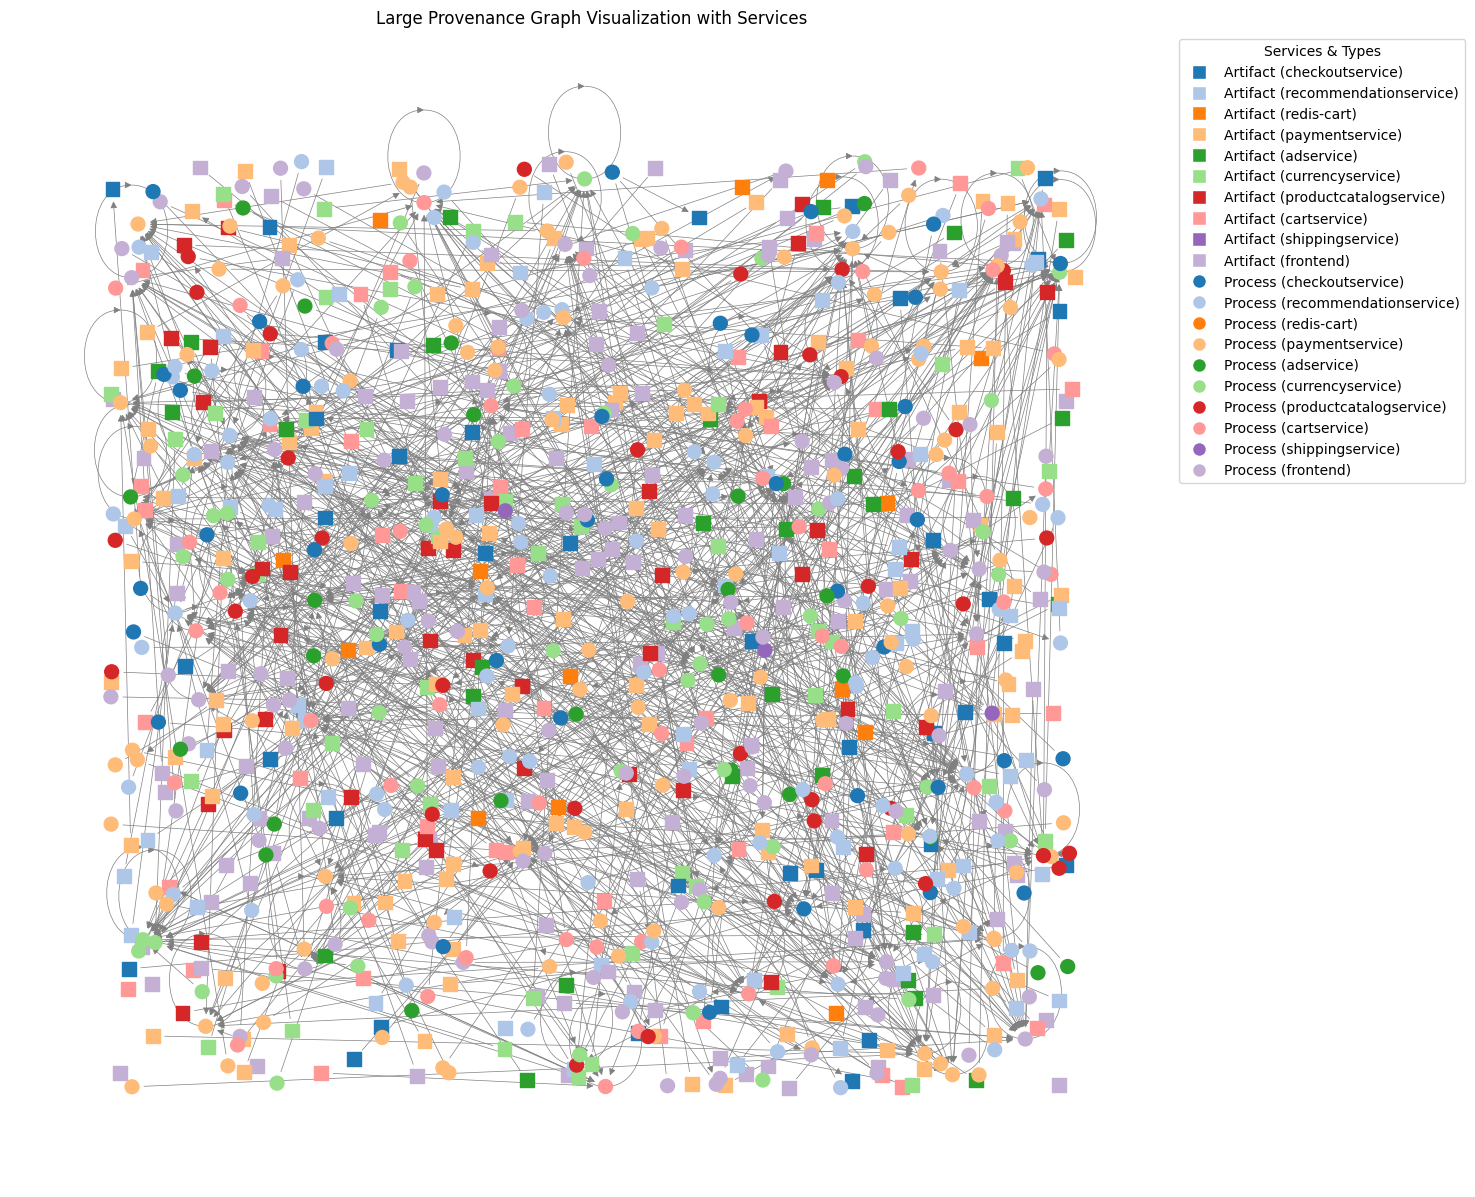

In [270]:
create_large_provenance_graph_with_services(artifacts, processes, edges)

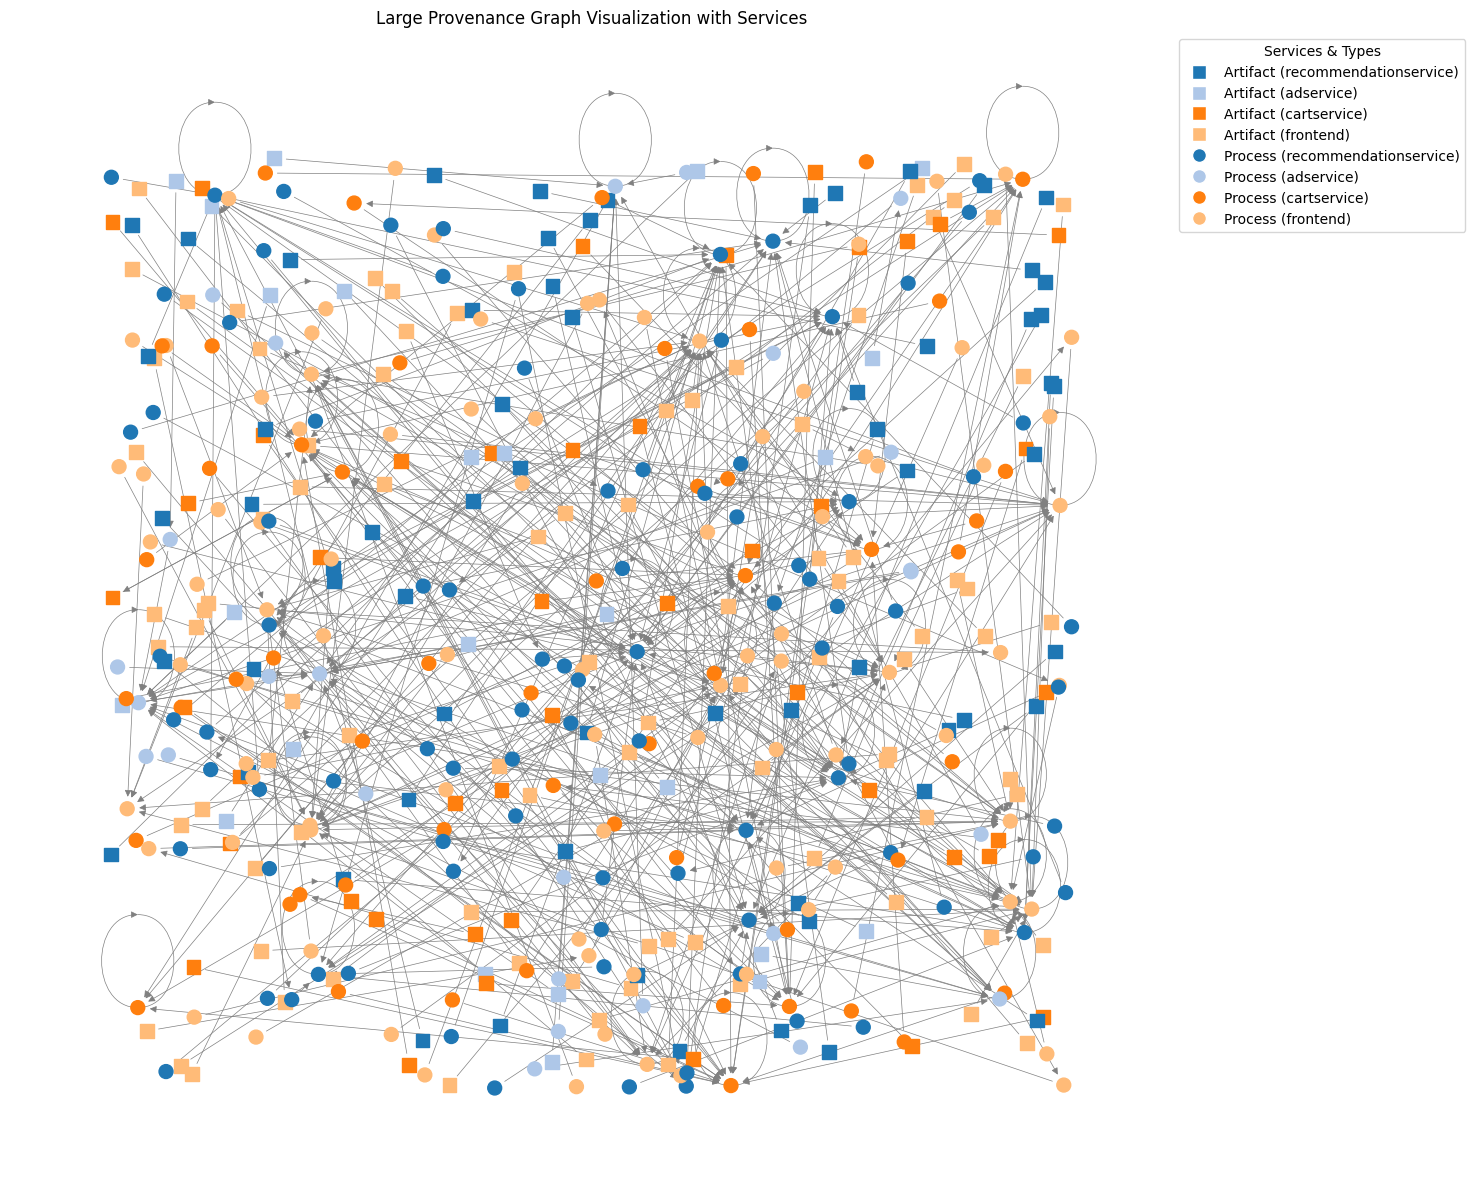

In [271]:
def filter_dataframes_by_services(artifacts_df, processes_df, edges_df, svc_list):
    # Filter artifacts and processes by the provided service list
    filtered_artifacts = artifacts_df[artifacts_df['svc'].isin(svc_list)]
    filtered_processes = processes_df[processes_df['svc'].isin(svc_list)]

    # Get the IDs of the remaining artifacts and processes
    valid_ids = set(filtered_artifacts['id']).union(set(filtered_processes['id']))

    # Filter edges to include only those that connect to the remaining artifacts and processes
    filtered_edges = edges_df[edges_df['from'].isin(valid_ids) & edges_df['to'].isin(valid_ids)]

    # Update valid_ids to include only those nodes that are part of the filtered edges
    edge_connected_ids = set(filtered_edges['from']).union(set(filtered_edges['to']))
    valid_ids = valid_ids.intersection(edge_connected_ids)

    # Filter the artifacts and processes again to exclude nodes with no edges
    filtered_artifacts = filtered_artifacts[filtered_artifacts['id'].isin(valid_ids)]
    filtered_processes = filtered_processes[filtered_processes['id'].isin(valid_ids)]

    return filtered_artifacts, filtered_processes, filtered_edges

svc_list=['frontend', 'recommendationservice', 'adservice','cartservice']
artifacts_new, processes_new, edges_new=filter_dataframes_by_services(artifacts, processes, edges, svc_list)
create_large_provenance_graph_with_services(artifacts_new, processes_new, edges_new, name='prov_graph_alert')

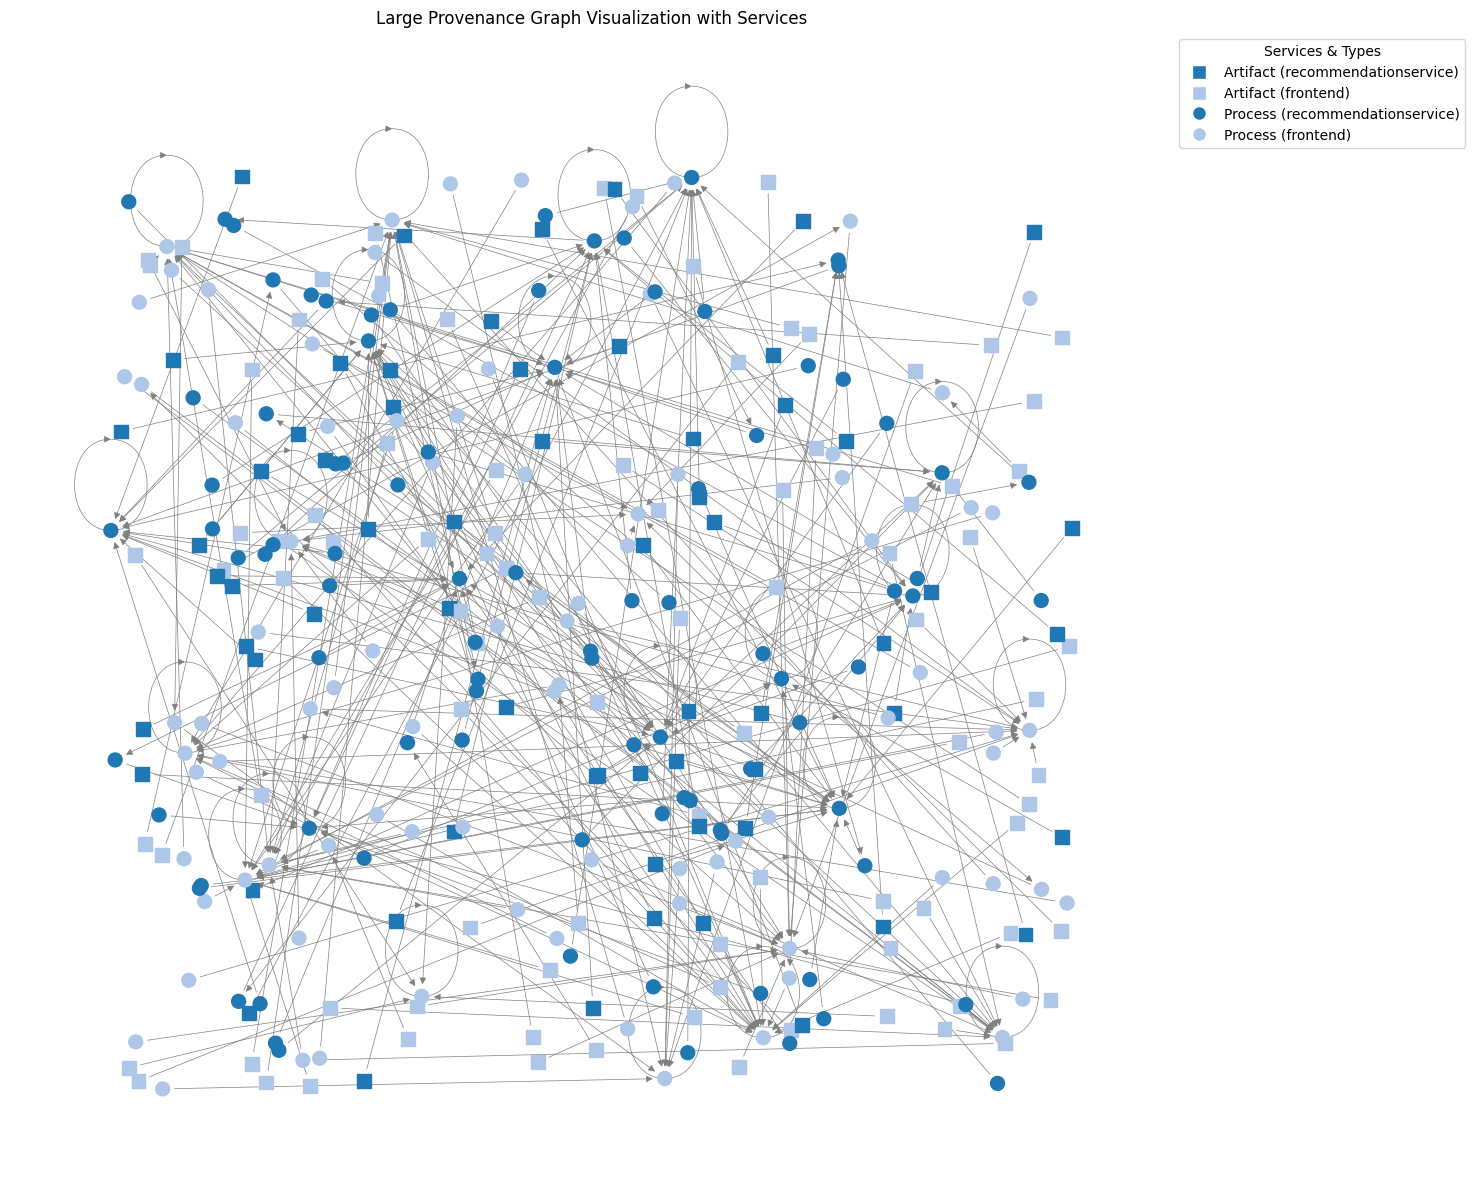

In [272]:
svc_list=['frontend', 'recommendationservice']
artifacts_ag, processes_ag, edges_ag=filter_dataframes_by_services(artifacts_new, processes_new, edges_new, svc_list)
create_large_provenance_graph_with_services(artifacts_ag, processes_ag, edges_ag, name='prov_graph_ag')

In [273]:
artifacts_ag


Unnamed: 0                                id      type  path  \
2             96  be892937315bea0644510e695d37ac30  Artifact   NaN   
4             98  80a3b6046c1aa2dda29b76dc32d1e4fa  Artifact   NaN   
9            174  f6afa0dc808e7927692a2a402dd37e1b  Artifact   NaN   
10           177  5ac5d0a9cea066d03b805a8a1e419e54  Artifact   NaN   
34           654  773c68c3b89710892a4783d58c60923e  Artifact   NaN   
...          ...                               ...       ...   ...   
1460        2617  f4f06a12d7ef877d3d7217b4c03ce550  Artifact   NaN   
1463        2620  1e3f62903d49c5a4cb26fd77e07a514b  Artifact   NaN   
1468        2625  f2394422312ad6d4614ea6c6f77e5a68  Artifact   NaN   
1475        2632  0172b13d5c3919c4851e59322d8426b9  Artifact   NaN   
1479        2638  64215b18061c67f12b5135dce8eaee5a  Artifact   NaN   

             subtype  permissions  epoch   source  version local address  ...  \
2     network socket          NaN    0.0  syscall        0     127.0.0.1  ...   
4     network socket          NaN    0.0  syscall        0     127.0.0.1  ...   
9     network socket          NaN    0.0  syscall        0     127.0.0.1  ...   
10    network socket          NaN    0.0  syscall        0     127.0.0.1  ...   
34    network socket          NaN    0.0  syscall        0     127.0.0.1  ...   
...              ...          ...    ...      ...      ...           ...  ...   
1460          memory          NaN    NaN  syscall        0           NaN  ...   
1463          memory          NaN    NaN  syscall        0           NaN  ...   
1468          memory          NaN    NaN  syscall        0           NaN  ...   
1475          memory          NaN    NaN  syscall        0           NaN  ...   
1479          memory          NaN    NaN  syscall        0           NaN  ...   

      protocol remote address local port  net namespace  memory address  \
2          tcp        0.0.0.0    46636.0   4.026532e+09             NaN   
4          tcp        0.0.0.0    46642.0   4.026532e+09             NaN   
9          tcp        0.0.0.0    46658.0   4.026533e+09             NaN   
10         tcp        0.0.0.0    46664.0   4.026533e+09             NaN   
34         tcp        0.0.0.0    46678.0   4.026532e+09             NaN   
...        ...            ...        ...            ...             ...   
1460       NaN            NaN        NaN            NaN    7f636e6ed000   
1463       NaN            NaN        NaN            NaN    7f6369ded000   
1468       NaN            NaN        NaN            NaN      c000000000   
1475       NaN            NaN        NaN            NaN    7f6347acc000   
1479       NaN            NaN        NaN            NaN    7f63479fc000   

         size    tgid  read fd  write fd                    svc  
2         NaN     NaN      NaN       NaN               frontend  
4         NaN     NaN      NaN       NaN               frontend  
9         NaN     NaN      NaN       NaN               frontend  
10        NaN     NaN      NaN       NaN               frontend  
34        NaN     NaN      NaN       NaN               frontend  
...       ...     ...      ...       ...                    ...  
1460    20000  3544.0      NaN       NaN  recommendationservice  
1463  4000000  3544.0      NaN       NaN  recommendationservice  
1468   400000  3544.0      NaN       NaN  recommendationservice  
1475    10000  3544.0      NaN       NaN  recommendationservice  
1479    40000  3544.0      NaN       NaN  recommendationservice  

[155 rows x 21 columns]

In [274]:
processes_ag


Unnamed: 0                                id     type   gid  euid  \
0             4  0ef366a12c22d68dcc35e410ab69719e  Process  1000  1000   
1             5  3f921fd1ce1cc790417d2071cc0a3c34  Process  1000  1000   
2             6  e6103611b0969dad371a1d6e665772e7  Process  1000  1000   
3             7  ff8a80868c60e4a5a1503a31124cd340  Process  1000  1000   
4             9  b6acb3e5c8618efc89e85cd9e2ee9823  Process  1000  1000   
..          ...                               ...      ...   ...   ...   
460         600  3d0f1dcc743b20256124890425f29662  Process  1000  1000   
461         601  fa244af18699aad93cfd55ee723d0642  Process  1000  1000   
462         602  a1a632f950fd2f6f68fcb1679477041d  Process  1000  1000   
463         603  7fca268b8fc4f80a5684b91cf8d85e6a  Process  1000  1000   
464         604  6ac0bca0da91a3bc074f89287bf79352  Process  1000  1000   

     children pid namespace     pid  seen time   source  net namespace  ...  \
0             -1.000000e+00  1711.0        NaN  syscall  -1.000000e+00  ...   
1              4.026533e+09  1723.0        NaN  syscall   4.026532e+09  ...   
2              4.026533e+09  1724.0        NaN  syscall   4.026532e+09  ...   
3              4.026533e+09  1725.0        NaN  syscall   4.026532e+09  ...   
4              4.026533e+09  1726.0        NaN  syscall   4.026532e+09  ...   
..                      ...     ...        ...      ...            ...  ...   
460            4.026533e+09  3555.0        NaN  syscall   4.026533e+09  ...   
461            4.026533e+09  3556.0        NaN  syscall   4.026533e+09  ...   
462            4.026533e+09  3557.0        NaN  syscall   4.026533e+09  ...   
463            4.026533e+09  3558.0        NaN  syscall   4.026533e+09  ...   
464            4.026533e+09  3559.0        NaN  syscall   4.026533e+09  ...   

      uid  egid                     exe mount namespace             name  \
0    1000  1000  /bin/grpc_health_probe   -1.000000e+00  grpc_health_pro   
1    1000  1000  /bin/grpc_health_probe    4.026533e+09  grpc_health_pro   
2    1000  1000  /bin/grpc_health_probe    4.026533e+09  grpc_health_pro   
3    1000  1000  /bin/grpc_health_probe    4.026533e+09  grpc_health_pro   
4    1000  1000  /bin/grpc_health_probe    4.026533e+09  grpc_health_pro   
..    ...   ...                     ...             ...              ...   
460  1000  1000  /bin/grpc_health_probe    4.026533e+09  grpc_health_pro   
461  1000  1000  /bin/grpc_health_probe    4.026533e+09  grpc_health_pro   
462  1000  1000  /bin/grpc_health_probe    4.026533e+09  grpc_health_pro   
463  1000  1000  /bin/grpc_health_probe    4.026533e+09  grpc_health_pro   
464  1000  1000  /bin/grpc_health_probe    4.026533e+09  grpc_health_pro   

     user namespace    start time                        command line  ns pid  \
0     -1.000000e+00  1.702120e+09  /bin/grpc_health_probe -addr=:8080     NaN   
1      4.026532e+09  1.702120e+09  /bin/grpc_health_probe -addr=:8080  2489.0   
2      4.026532e+09  1.702120e+09  /bin/grpc_health_probe -addr=:8080  2490.0   
3      4.026532e+09  1.702120e+09  /bin/grpc_health_probe -addr=:8080  2491.0   
4      4.026532e+09  1.702120e+09  /bin/grpc_health_probe -addr=:8080  2492.0   
..              ...           ...                                 ...     ...   
460    4.026532e+09  1.702120e+09  /bin/grpc_health_probe -addr=:8080  2627.0   
461    4.026532e+09  1.702120e+09  /bin/grpc_health_probe -addr=:8080  2628.0   
462    4.026532e+09  1.702120e+09  /bin/grpc_health_probe -addr=:8080  2629.0   
463    4.026532e+09  1.702120e+09  /bin/grpc_health_probe -addr=:8080  2630.0   
464    4.026532e+09  1.702120e+09  /bin/grpc_health_probe -addr=:8080  2631.0   

                       svc  
0                 frontend  
1                 frontend  
2                 frontend  
3                 frontend  
4                 frontend  
..                     ...  
460  recommendationservice  
461  recommendationservice  
462  recommendations

In [275]:
edges_ag

Unnamed: 0                              from  \
8            919  9154e1fe447110ceac41673360bce4a7   
10           921  2cf03ed16c7bffbd199edfee2d2a61a4   
12           923  50be0f5b01f2561f7210c25484bc3838   
17           928  c1164a52a433cafdf8aa419b3dad29e7   
25           936  f375917f68a9f27b6c798ddc32db25e2   
...          ...                               ...   
2372       36648  7fca268b8fc4f80a5684b91cf8d85e6a   
2375       36651  48108c38dec99d5ecc061fea3039076a   
2377       36653  6ac0bca0da91a3bc074f89287bf79352   
2378       36654  64215b18061c67f12b5135dce8eaee5a   
2379       36655  ca982e93bb9e6025da3e66671eaaf906   

                                    to            type  event id  \
8     0ef366a12c22d68dcc35e410ab69719e  WasGeneratedBy      1310   
10    0ef366a12c22d68dcc35e410ab69719e  WasGeneratedBy      1312   
12    0ef366a12c22d68dcc35e410ab69719e  WasGeneratedBy      1314   
17    0ef366a12c22d68dcc35e410ab69719e  WasGeneratedBy      1319   
25    0ef366a12c22d68dcc35e410ab69719e  WasGeneratedBy      1327   
...                                ...             ...       ...   
2372  ca982e93bb9e6025da3e66671eaaf906  WasTriggeredBy     53163   
2375  c03b2128e473d4df15969ead098a6e1f  WasGeneratedBy     53166   
2377  ca982e93bb9e6025da3e66671eaaf906  WasTriggeredBy     53168   
2378  ca982e93bb9e6025da3e66671eaaf906  WasGeneratedBy     53169   
2379  ca982e93bb9e6025da3e66671eaaf906  WasTriggeredBy     53170   

                                                  flags   source  \
8                                                   NaN  syscall   
10                                                  NaN  syscall   
12                                                  NaN  syscall   
17                                                  NaN  syscall   
25                                                  NaN  syscall   
...                                                 ...      ...   
2372  CLONE_SIGHAND|CLONE_SETTLS|CLONE_SYSVSEM|CLONE...  syscall   
2375                                                NaN  syscall   
2377  CLONE_SIGHAND|CLONE_SETTLS|CLONE_SYSVSEM|CLONE...  syscall   
2378                                                NaN  syscall   
2379                                                NaN  syscall   

              time     operation  protection  advice  
8     1.702120e+09  mmap (write)         3.0     NaN  
10    1.702120e+09  mmap (write)         0.0     NaN  
12    1.702120e+09  mmap (write)         0.0     NaN  
17    1.702120e+09  mmap (write)         3.0     NaN  
25    1.702120e+09  mmap (write)         3.0     NaN  
...            ...           ...         ...     ...  
2372  1.702120e+09         clone         NaN     NaN  
2375  1.702120e+09       connect         NaN     NaN  
2377  1.702120e+09         clone         NaN     NaN  
2378  1.702120e+09  mmap (write)         3.0     NaN  
2379  1.702120e+09          exit         NaN     NaN  

[330 rows x 11 columns]

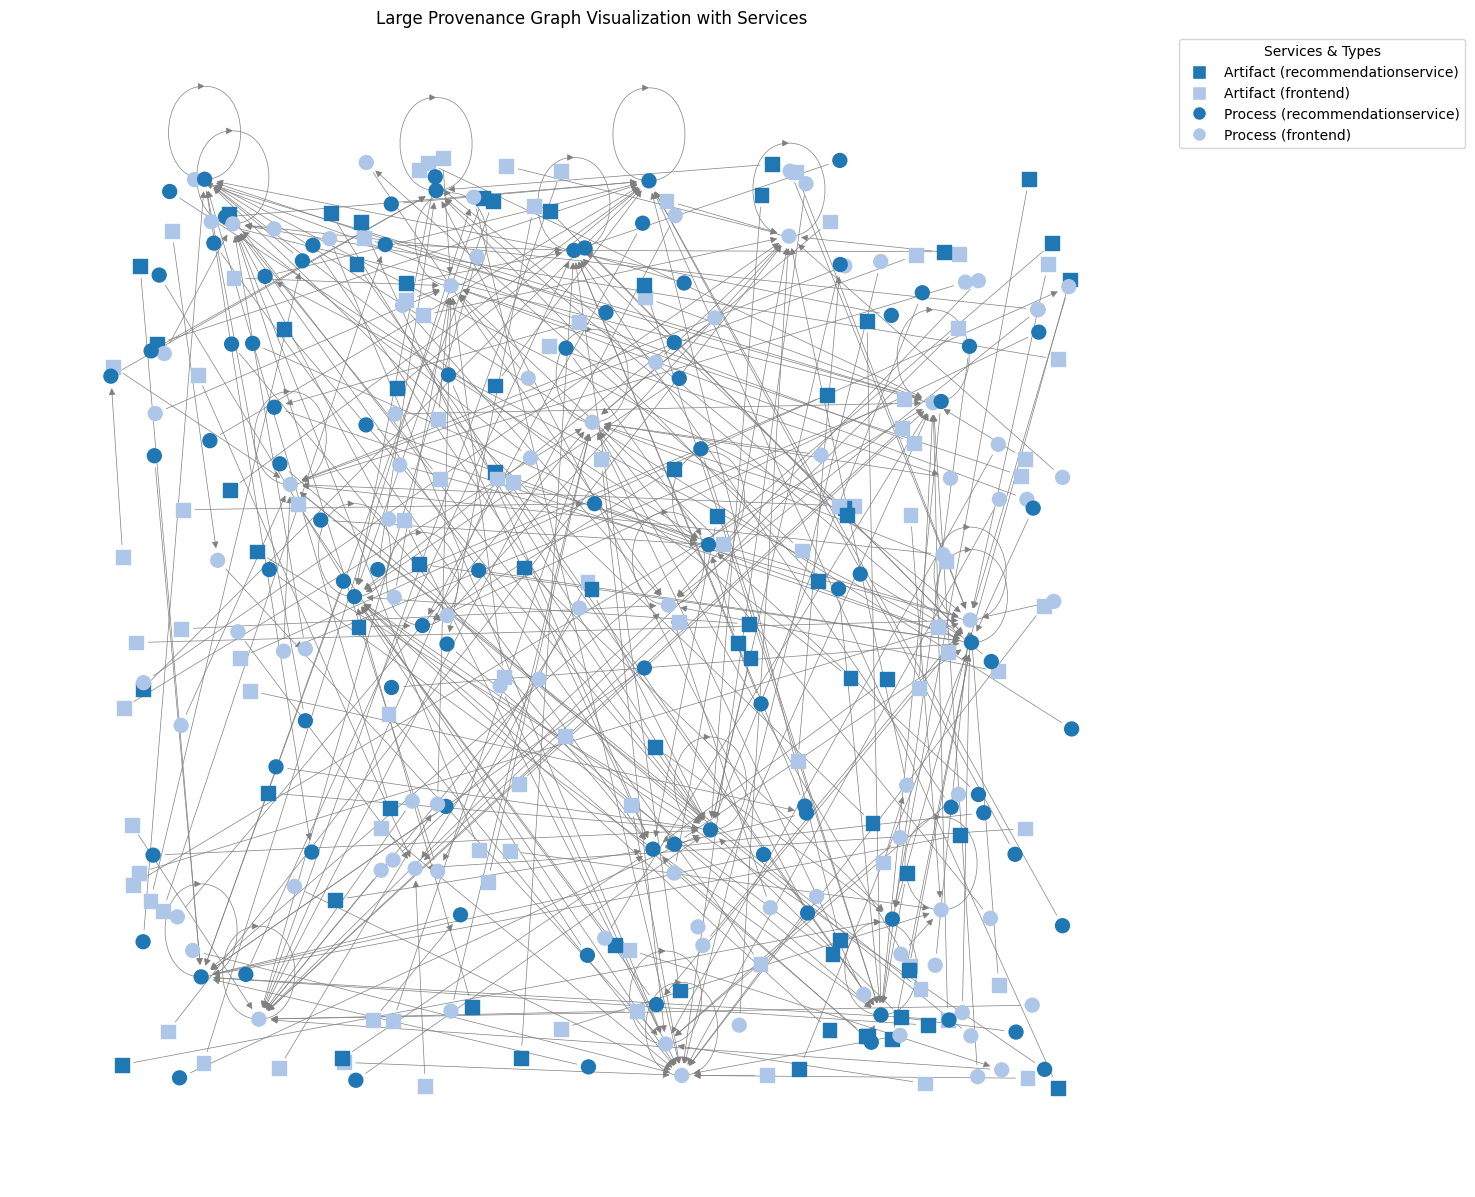

In [276]:
create_large_provenance_graph_with_services(artifacts_ag, processes_ag, edges_ag, name='prov_graph_ag')

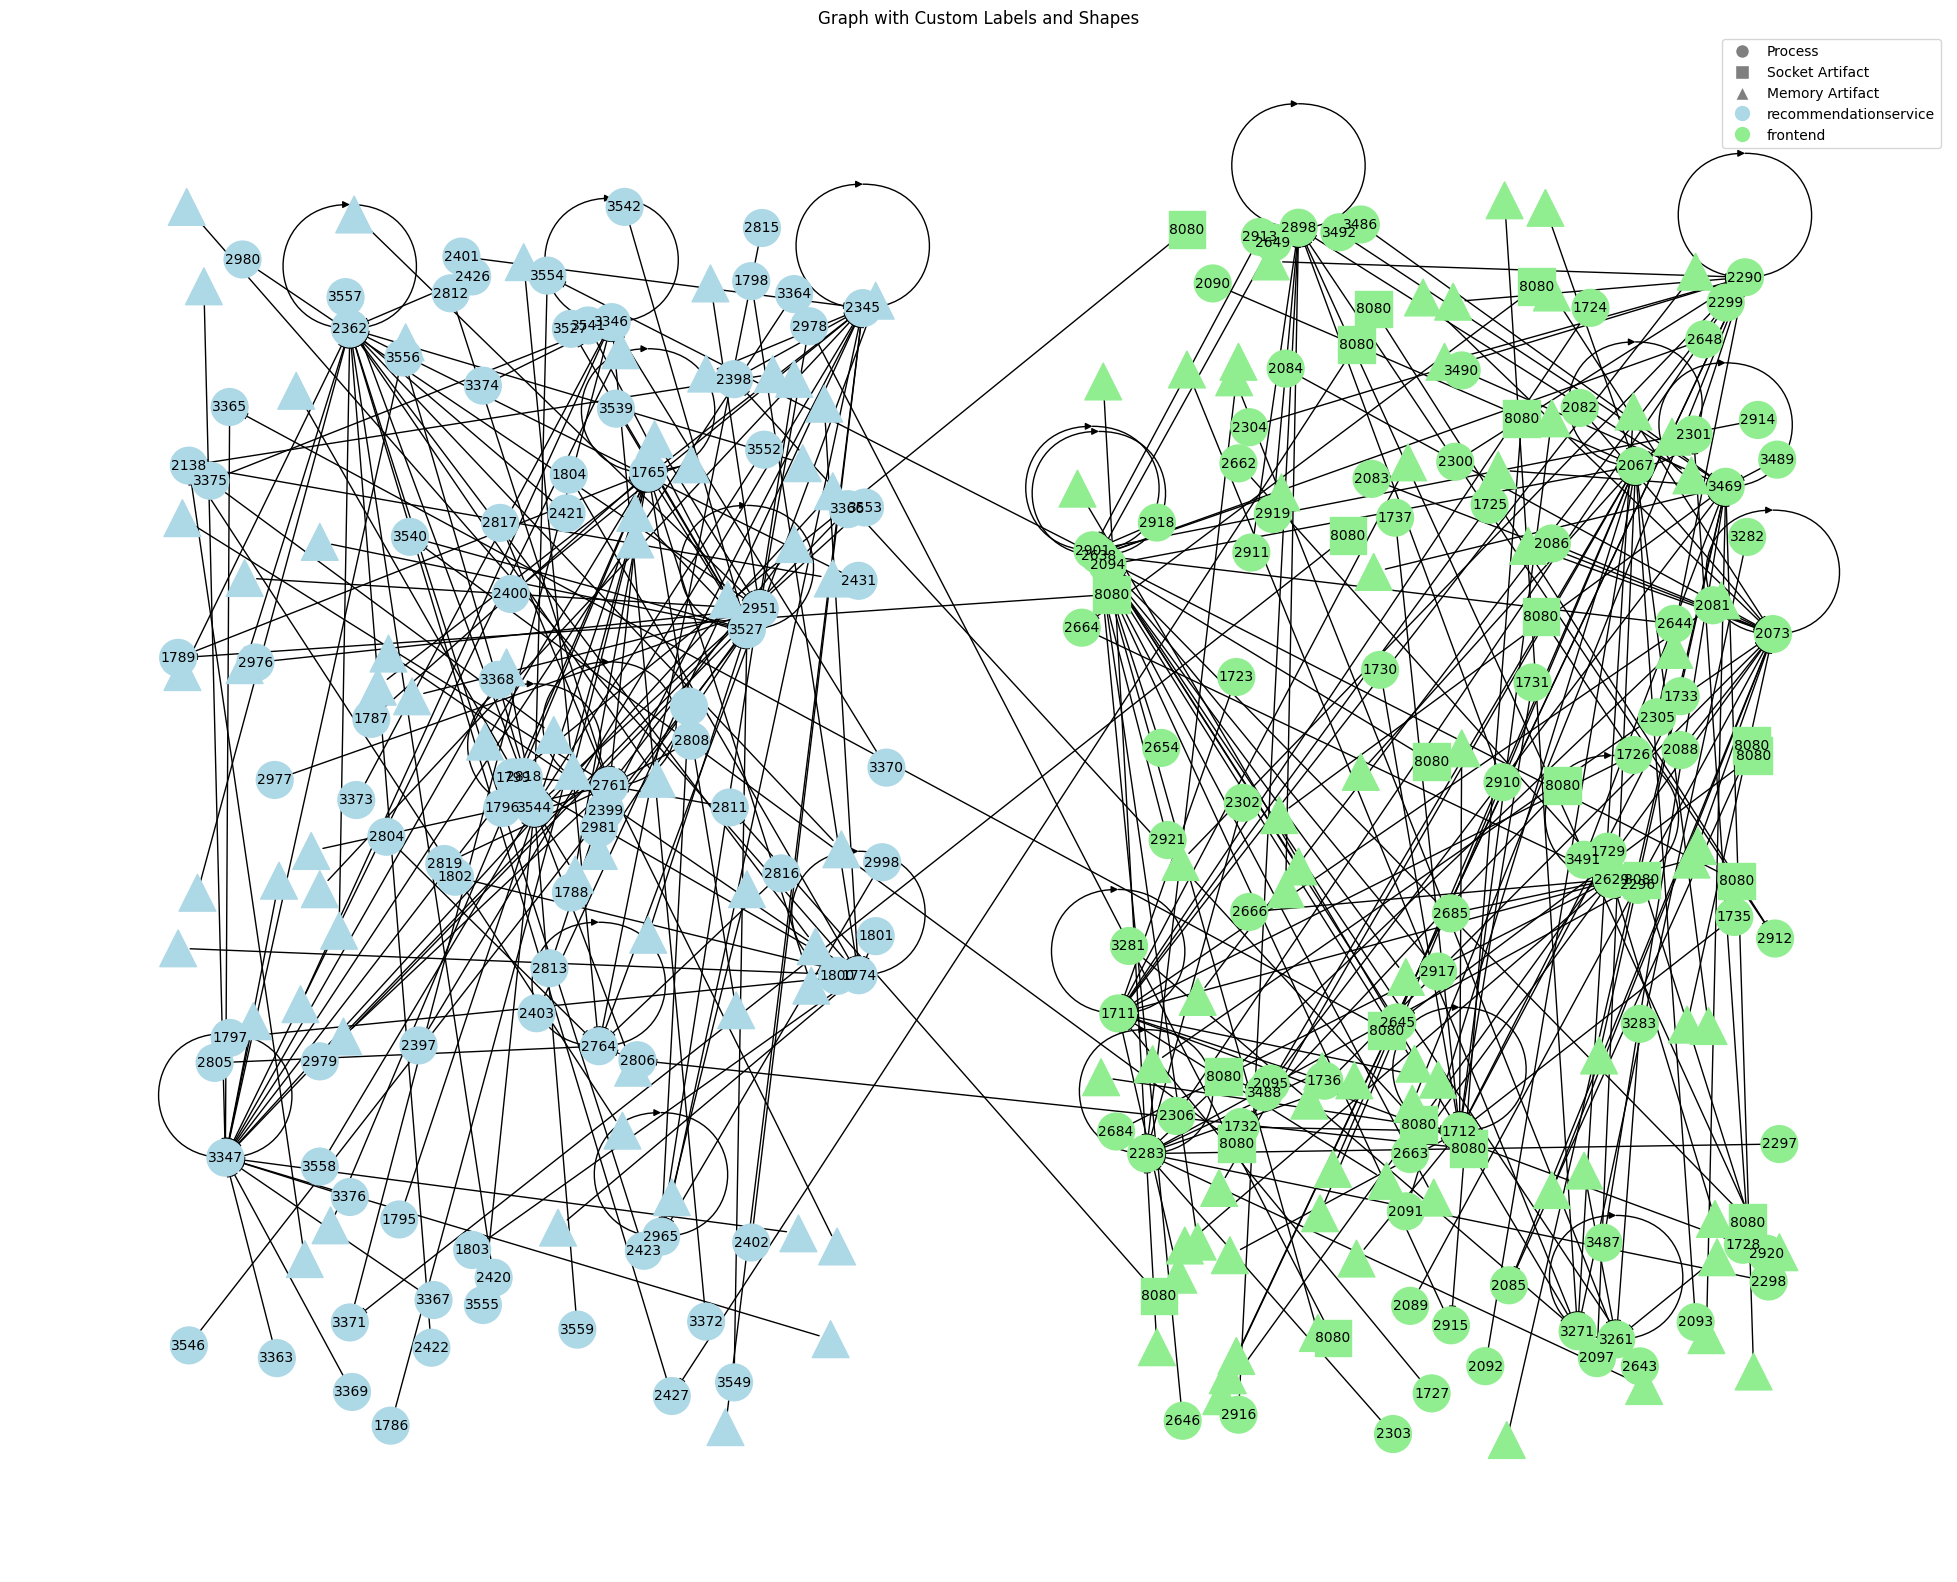

In [277]:
def draw_graph_with_custom_labels_and_shapes(artifacts_df, processes_df, edges_df, name='prov_graph_custom'):
    G = nx.DiGraph()

    # Assuming relevant columns in the dataframe
    service_column = 'svc'
    artifact_subtype_column = 'subtype'
    artifact_local_port_column = 'remote port'
    process_pid_column = 'pid'

    # Generate a color palette for services
    services = list(set(artifacts_df[service_column]).union(set(processes_df[service_column])))
    if len(services) != 2:
        raise ValueError("The function is designed for exactly two services.")

    color_map = {services[0]: 'lightblue', services[1]: 'lightgreen'}

    # Add nodes and define labels
    labels = {}
    for _, row in artifacts_df.iterrows():
        G.add_node(row['id'], type='Artifact', subtype=row[artifact_subtype_column], svc=row[service_column])
        if row[artifact_subtype_column] == 'network socket':
            labels[row['id']] = str(int(row[artifact_local_port_column])) if not np.isnan(row[artifact_local_port_column]) else ''

    for _, row in processes_df.iterrows():
        G.add_node(row['id'], type='Process', svc=row[service_column])
        labels[row['id']] = str(int(row[process_pid_column])) if not np.isnan(row[process_pid_column]) else ''

    # Add edges
    for _, row in edges_df.iterrows():
        if row['from'] in G and row['to'] in G:
            G.add_edge(row['from'], row['to'])

    # Define positions
    pos = {}
    for node in G.nodes(data=True):
        service = node[1]['svc']
        x_range = np.linspace(-0.9, -0.1, len(G.nodes)) if service == services[0] else np.linspace(0.1, 0.9, len(G.nodes))
        x = random.choice(x_range)
        y = random.uniform(-1, 1)
        pos[node[0]] = (x, y)

    # Draw the graph
    plt.figure(figsize=(25, 20))
    # Draw nodes with different shapes
    for ntype, shape in [('Process', 'o')]:
        nodes = [n for n, d in G.nodes(data=True) if d['type'] == ntype]
        nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_size=700,
                               node_color=[color_map[G.nodes[n]['svc']] for n in nodes], node_shape=shape)

    for subtype, shape in [('network socket', 's'), ('memory', '^')]:
        nodes = [n for n, d in G.nodes(data=True) if d['type'] == 'Artifact' and d['subtype'] == subtype]
        nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_size=700,
                               node_color=[color_map[G.nodes[n]['svc']] for n in nodes], node_shape=shape)

    # Draw edges
    nx.draw_networkx_edges(G, pos, edge_color='black', width=1)
    # Draw labels
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=10)

    # Add legend for node types, subtypes, and services
    process_patch = plt.Line2D([0], [0], marker='o', color='w', label='Process', markersize=10, markerfacecolor='gray', linestyle='None')
    socket_patch = plt.Line2D([0], [0], marker='s', color='w', label='Socket Artifact', markersize=10, markerfacecolor='gray', linestyle='None')
    memory_patch = plt.Line2D([0], [0], marker='^', color='w', label='Memory Artifact', markersize=10, markerfacecolor='gray', linestyle='None')
    service_patches = [plt.Line2D([0], [0], marker='o', color=color_map[svc], label=svc, markersize=10, markerfacecolor=color_map[svc], linestyle='None') for svc in services]
    plt.legend(handles=[process_patch, socket_patch, memory_patch] + service_patches)

    plt.title("Graph with Custom Labels and Shapes")
    plt.axis('off')
    plt.savefig(f'{name}.png', bbox_inches="tight", pad_inches=1)
    plt.show()



draw_graph_with_custom_labels_and_shapes(artifacts_ag, processes_ag, edges_ag)

Number of target artifacts (frontend with port 8080): 22
Node 5ac5d0a9cea066d03b805a8a1e419e54: Ancestors - 0, Descendants - 2
Node f6afa0dc808e7927692a2a402dd37e1b: Ancestors - 0, Descendants - 2
Node 1a04b02e87116c33b2f35f5ede3d0854: Ancestors - 0, Descendants - 2
Node 13a6c254dbe0512b29325e74b1050d85: Ancestors - 0, Descendants - 2
Node 00ab8b8c0d3e4e6aeab4db0e22ea64eb: Ancestors - 0, Descendants - 2
Node 80a3b6046c1aa2dda29b76dc32d1e4fa: Ancestors - 0, Descendants - 2
Node a1bc2d49b45e0cac5f84ae79142976cd: Ancestors - 0, Descendants - 2
Node 08382f5e7de87c4a7685b9e87e7305cd: Ancestors - 0, Descendants - 3
Node c5cce8d6c02d473ae31c07808ce2067a: Ancestors - 0, Descendants - 2
Node f2c00679e2a14cc76e0d9e0f969abfad: Ancestors - 0, Descendants - 2
Node 134a1b10855bf64a72ff0d402379c5bb: Ancestors - 0, Descendants - 2
Node 48108c38dec99d5ecc061fea3039076a: Ancestors - 0, Descendants - 2
Node be892937315bea0644510e695d37ac30: Ancestors - 0, Descendants - 2
Node 7522067028a70dc8f441db683f3c

KeyboardInterrupt: 

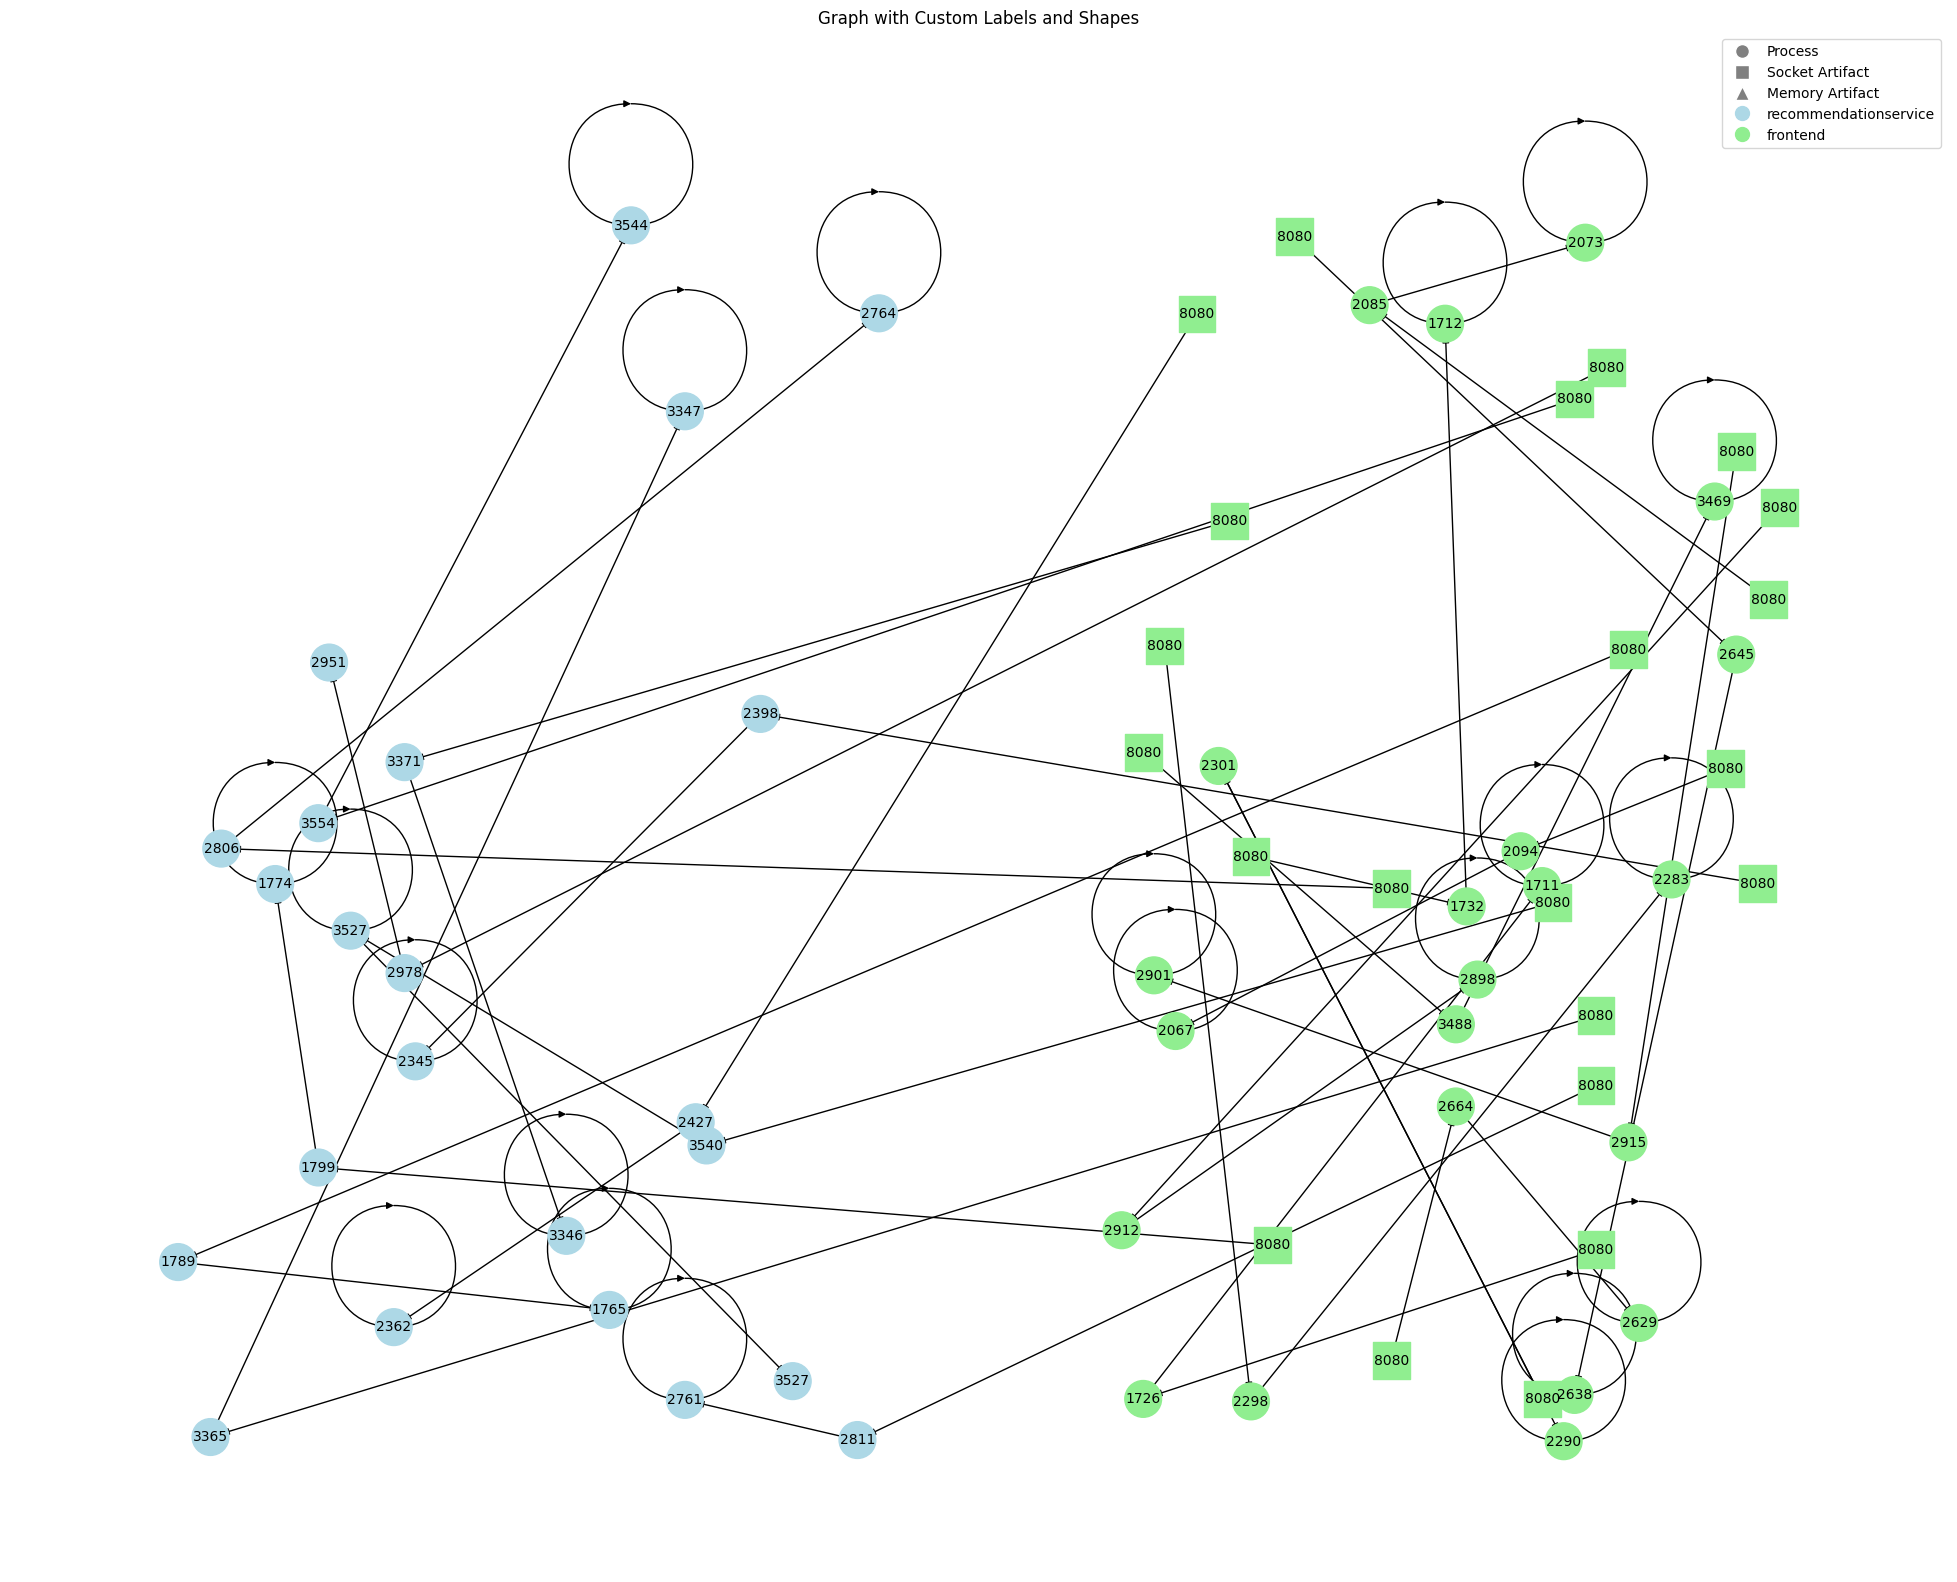

In [278]:
def filter_frontend_to_port_8080(artifacts_df, processes_df, edges_df):
    # Identify frontend artifacts with remote port 8080
    target_artifacts = artifacts_df[(artifacts_df['svc'] == 'frontend') & (artifacts_df['remote port'] == 8080.0)]
    target_ids = set(target_artifacts['id'])

    print(f"Number of target artifacts (frontend with port 8080): {len(target_ids)}")

    # Create a graph
    G = nx.DiGraph()

    # Add nodes for all artifacts and processes
    for _, row in artifacts_df.iterrows():
        G.add_node(row['id'], type='Artifact', svc=row['svc'])
    for _, row in processes_df.iterrows():
        G.add_node(row['id'], type='Process', svc=row['svc'])

    # Add edges
    for _, row in edges_df.iterrows():
        G.add_edge(row['from'], row['to'])

    # Find all nodes connected to the target nodes
    connected_nodes = set()
    for node in target_ids:
        ancestors = nx.ancestors(G, node)
        descendants = nx.descendants(G, node)
        connected_nodes.update(ancestors)
        connected_nodes.update(descendants)
        connected_nodes.add(node)

        print(f"Node {node}: Ancestors - {len(ancestors)}, Descendants - {len(descendants)}")

    print(f"Total connected nodes: {len(connected_nodes)}")

    # Filter artifacts and processes DataFrames
    filtered_artifacts = artifacts_df[artifacts_df['id'].isin(connected_nodes)]
    filtered_processes = processes_df[processes_df['id'].isin(connected_nodes)]

    # Filter edges DataFrame
    filtered_edges = edges_df[edges_df['from'].isin(connected_nodes) | edges_df['to'].isin(connected_nodes)]

    return filtered_artifacts, filtered_processes, filtered_edges


filtered_artifacts_df, filtered_processes_df, filtered_edges_df = filter_frontend_to_port_8080(artifacts_ag, processes_ag, edges_ag)
print(len(filtered_artifacts_df), len(filtered_processes_df), len(filtered_edges_df))
draw_graph_with_custom_labels_and_shapes(filtered_artifacts_df, filtered_processes_df, filtered_edges_df, name='prov_graph_filtered')

In [ ]:
def filter_frontend_to_port_8080_second_degree(artifacts_df, processes_df, edges_df):
    # Identify frontend artifacts with remote port 8080
    target_artifacts = artifacts_df[(artifacts_df['svc'] == 'frontend') & (artifacts_df['remote port'] == 8080.0)]
    target_ids = set(target_artifacts['id'])

    print(f"Number of target artifacts (frontend with port 8080): {len(target_ids)}")

    # Create a graph
    G = nx.DiGraph()

    # Add nodes for all artifacts and processes
    for _, row in artifacts_df.iterrows():
        G.add_node(row['id'], type='Artifact', svc=row['svc'])
    for _, row in processes_df.iterrows():
        G.add_node(row['id'], type='Process', svc=row['svc'])

    # Add edges
    for _, row in edges_df.iterrows():
        G.add_edge(row['from'], row['to'])

    # Find all nodes within a path length of 2 degrees from the target nodes
    connected_nodes = set()
    for target_node in target_ids:
        # Perform a breadth-first search up to a depth of 2
        bfs_nodes = nx.single_source_shortest_path_length(G, target_node, cutoff=2)
        connected_nodes.update(bfs_nodes.keys())

    print(f"Total connected nodes within 2 degrees: {len(connected_nodes)}")

    # Filter artifacts and processes DataFrames
    filtered_artifacts = artifacts_df[artifacts_df['id'].isin(connected_nodes)]
    filtered_processes = processes_df[processes_df['id'].isin(connected_nodes)]

    # Filter edges DataFrame
    filtered_edges = edges_df[edges_df['from'].isin(connected_nodes) | edges_df['to'].isin(connected_nodes)]

    return filtered_artifacts, filtered_processes, filtered_edges


filtered_artifacts_df2, filtered_processes_df2, filtered_edges_df2 = filter_frontend_to_port_8080_second_degree(artifacts_ag, processes_ag, edges_ag)
print(len(filtered_artifacts_df2), len(filtered_processes_df2), len(filtered_edges_df2))
draw_graph_with_custom_labels_and_shapes(filtered_artifacts_df2, filtered_processes_df2, filtered_edges_df2, name='prov_graph_filtered2')

In [ ]:
def aggregate_port_8080_and_filter(artifacts_df, processes_df, edges_df):
    # Create a graph
    G = nx.DiGraph()

    # Add nodes for all artifacts and processes
    for _, row in artifacts_df.iterrows():
        G.add_node(row['id'], type='Artifact', svc=row['svc'], remote_port=row.get('remote port'))

    for _, row in processes_df.iterrows():
        G.add_node(row['id'], type='Process', svc=row['svc'])

    # Add edges with additional attributes
    edge_attrs = edges_df.set_index(['from', 'to']).to_dict('index')
    for (source, target), attrs in edge_attrs.items():
        G.add_edge(source, target, **attrs)

    # Identify frontend artifacts with remote port 8080
    frontend_8080_nodes = artifacts_df[(artifacts_df['svc'] == 'frontend') & (artifacts_df['remote port'] == 8080.0)]

    if not frontend_8080_nodes.empty:
        # Select one row to represent the aggregated node
        aggregated_row_data = frontend_8080_nodes.iloc[0].copy()
        aggregated_node_id = 'aggregated_8080_node'
        aggregated_row_data['id'] = aggregated_node_id

        # Redirect edges to the aggregated node and remove old nodes
        for node in frontend_8080_nodes['id']:
            # Redirect edges and preserve attributes
            for pred, _, data in G.in_edges(node, data=True):
                G.add_edge(pred, aggregated_node_id, **data)
            for _, succ, data in G.out_edges(node, data=True):
                G.add_edge(aggregated_node_id, succ, **data)
            # Remove the old node
            G.remove_node(node)

        # Update artifacts DataFrame
        filtered_artifacts = artifacts_df[~artifacts_df['id'].isin(frontend_8080_nodes['id'])]
        updated_artifacts_df = pd.concat([filtered_artifacts, aggregated_row_data.to_frame().T], ignore_index=True)

        # Reconstruct edges DataFrame with attributes
        updated_edges_df = pd.DataFrame([(u, v, d) for u, v, d in G.edges(data=True)], columns=['from', 'to', 'attributes'])
        updated_edges_df = updated_edges_df.join(updated_edges_df['attributes'].apply(pd.Series)).drop('attributes', axis=1)

        return updated_artifacts_df, processes_df, updated_edges_df
    else:
        return artifacts_df, processes_df, edges_df

aggra_artifacts_df, aggra_processes_df, aggra_edges_df = aggregate_port_8080_and_filter(filtered_artifacts_df2, filtered_processes_df2, filtered_edges_df2)
print(len(aggra_artifacts_df), len(aggra_processes_df), len(aggra_edges_df))
draw_graph_with_custom_labels_and_shapes(aggra_artifacts_df, aggra_processes_df, aggra_edges_df, name='prov_graph_filtered_aggra')

In [ ]:
aggra_edges_df.columns

In [ ]:
filtered_edges_df2.columns

In [ ]:
def draw_graph_with_custom_labels_and_shapes_colored_edge(artifacts_df, processes_df, edges_df, name='prov_graph_custom'):
    G = nx.DiGraph()

    # Generate a color palette for services
    service_column = 'svc'
    services = list(set(artifacts_df[service_column].unique()).union(set(processes_df[service_column].unique())))
    color_map = {services[0]: 'lightblue', services[1]: 'lightgreen'}

    # Edge color mapping
    edge_colors_dict = {
        'WasGeneratedBy': 'red',
        'Used': 'green',
        'WasTriggeredBy': 'blue',
        'WasDerivedFrom': 'yellow'
    }

    # Add nodes and define labels
    labels = {}
    for _, row in artifacts_df.iterrows():
        G.add_node(row['id'], type='Artifact', svc=row[service_column])
        labels[row['id']] = int(row.get('remote port', ''))

    for _, row in processes_df.iterrows():
        G.add_node(row['id'], type='Process', svc=row[service_column])
        labels[row['id']] = int(row.get('pid', ''))

    # Add edges and store edge colors
    edge_colors = []
    for _, row in edges_df.iterrows():
        if row['from'] in G and row['to'] in G:
            G.add_edge(row['from'], row['to'])
            edge_type = row.get('type', 'default')
            edge_colors.append(edge_colors_dict.get(edge_type, 'black'))

    # Define positions
    pos = {}
    service_nodes = {svc: [n for n in G.nodes if G.nodes[n]['svc'] == svc] for svc in services}
    for svc, nodes in service_nodes.items():
        grid_size = int(np.ceil(np.sqrt(len(nodes))))
        grid_positions = [(x, y) for y in range(grid_size) for x in range(grid_size)]
        if svc == services[0]:
            grid_positions = [(x - grid_size, y) for x, y in grid_positions]  # Shift to the left
        else:
            grid_positions = [(x + 1, y) for x, y in grid_positions]          # Shift to the right
        pos.update({n: pos for n, pos in zip(nodes, grid_positions)})

    # Draw the graph
    plt.figure(figsize=(10, 8))
    for node_type, shape in [('Artifact', 's'), ('Process', 'o')]:
        nodes = [n for n, d in G.nodes(data=True) if d['type'] == node_type]
        node_colors = [color_map.get(G.nodes[n]['svc'], 'gray') for n in nodes]
        nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_size=1000, node_color=node_colors, node_shape=shape)

    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=1)
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=10)

    plt.title("Graph with Custom Labels and Shapes")
    plt.axis('off')
    plt.savefig(f'{name}.png', bbox_inches="tight", pad_inches=1)
    plt.show()

    # Create a separate figure for the legend
    fig_legend = plt.figure(figsize=(8, 3))
    artifact_patch = plt.Line2D([0], [0], marker='s', color='w', label='Artifact', markersize=10, markerfacecolor='gray', linestyle='None')
    process_patch = plt.Line2D([0], [0], marker='o', color='w', label='Process', markersize=10, markerfacecolor='gray', linestyle='None')
    service_patches = [plt.Line2D([0], [0], marker='o', color=color_map[svc], label=svc, markersize=10, markerfacecolor=color_map[svc], linestyle='None') for svc in services]
    edge_type_patches = [plt.Line2D([0], [0], color=edge_colors_dict[edge_type], lw=2, label=edge_type) for edge_type in edge_colors_dict.keys()]
    plt.legend(handles=[artifact_patch, process_patch] + service_patches + edge_type_patches, loc='center', ncol=2)
    plt.axis('off')
    fig_legend.savefig(f'{name}_legend.png', bbox_inches="tight", pad_inches=1)
    plt.show()


# draw_graph_with_custom_labels_and_shapes_colored_edge(aggra_artifacts_df, aggra_processes_df, aggra_edges_df, name='prov_graph_filtered_aggra2')

In [ ]:
def filter_specific_processes(artifacts_df, processes_df, edges_df, keep_process_ids):
    # Convert keep_process_ids to a set for faster lookup
    keep_process_ids_set = set(keep_process_ids)

    # Filter processes DataFrame
    filtered_processes_df = processes_df[processes_df['pid'].isin(keep_process_ids_set)]

    # Get the IDs of the remaining processes
    valid_process_ids = set(filtered_processes_df['id'])

    # Filter edges DataFrame to include only edges connected to the remaining processes
    filtered_edges_df = edges_df[edges_df['from'].isin(valid_process_ids) | edges_df['to'].isin(valid_process_ids)]

    return artifacts_df, filtered_processes_df, filtered_edges_df
keep_process_ids = [2345, 2398, 2806, 3540, 3527, 11711, 1726, 2094]
aggra_artifacts_df_alert, aggra_processes_df_alert, aggra_edges_df_alert = filter_specific_processes(aggra_artifacts_df, aggra_processes_df, aggra_edges_df, keep_process_ids)
draw_graph_with_custom_labels_and_shapes_colored_edge(aggra_artifacts_df_alert, aggra_processes_df_alert, aggra_edges_df_alert, name='prov_graph_filtered_aggra2')